In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('C:\\Users\\user\\PycharmProjects\\pipeGEM')
from pipeGEM.plotting.heatmap import plot_clustermap
from pipeGEM.plotting.scatter import plot_embedding, plot_PCA

In [36]:
fpath = Path("../data/mg_TPMs.tsv")
fpath_2 = Path("../data/mg_t_TPMs.tsv")
# df = pd.read_csv(fpath, sep='\t', index_col=0)

In [49]:
labels = pd.read_excel("../data/all_info/labels.xlsx", sheet_name="20220203")

In [48]:
labels.to_csv("../data/all_info/labels.csv", sep='\t', index=False)

In [46]:
df.columns

Index(['C002A', 'C003A', 'C004A', 'C005A', 'C006A', 'C007A', 'C008A', 'C009A',
       'C010A', 'C011A', 'C012A', 'R001A', 'R002A', 'R003A', 'R004A', 'R005A',
       'R006A', 'R007A', 'R008A', 'R009A', 'R010A', 'R011A', 'R012A', 'R013A',
       'R014A', 'R015A', 'R016A', 'R016A.1', 'R017A', 'R018A', 'R019A',
       'R020A', 'R021A', 'R022A', 'R023A', 'R024A', 'R025A', 'R026A', 'R027A',
       'R028A', 'R029A', 'R030A', 'R031A', 'R032A', 'R033A', 'R034A', 'R035A',
       'R036A', 'R037A', 'R038A', 'R039A', 'R040A', 'R041A', 'R043A', 'R044A',
       'R045A', 'R046A', 'R047A', 'R048A', 'R049A', 'R050A', 'R053A', 'R054A'],
      dtype='object')

In [39]:
gb = labels.groupby("group")["sample"].apply(lambda x: list(x))
groups = {f"G{i+1}": [g + "A" for g in gs] for i, gs in enumerate(gb)}
groups["G3"].append("R016A.1")

gb_b = labels.groupby("batch")["sample"].apply(lambda x: list(x))
batches = {f"B{i+1}": [g + "A" for g in gs] for i, gs in enumerate(gb_b)}
batches["B3"].append("R016A.1")

In [40]:
df = pd.read_csv(fpath, sep='\t', index_col=0)
# df2 = pd.read_csv(fpath_2, sep='\t', index_col=0)
tot_df = pd.concat([df, df2], axis=0)

In [41]:
df = df[df.T.std() > 1]
df = np.log2(df + 1)

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\results\2022Feb\EDA\TPM_clustermap_batch.png


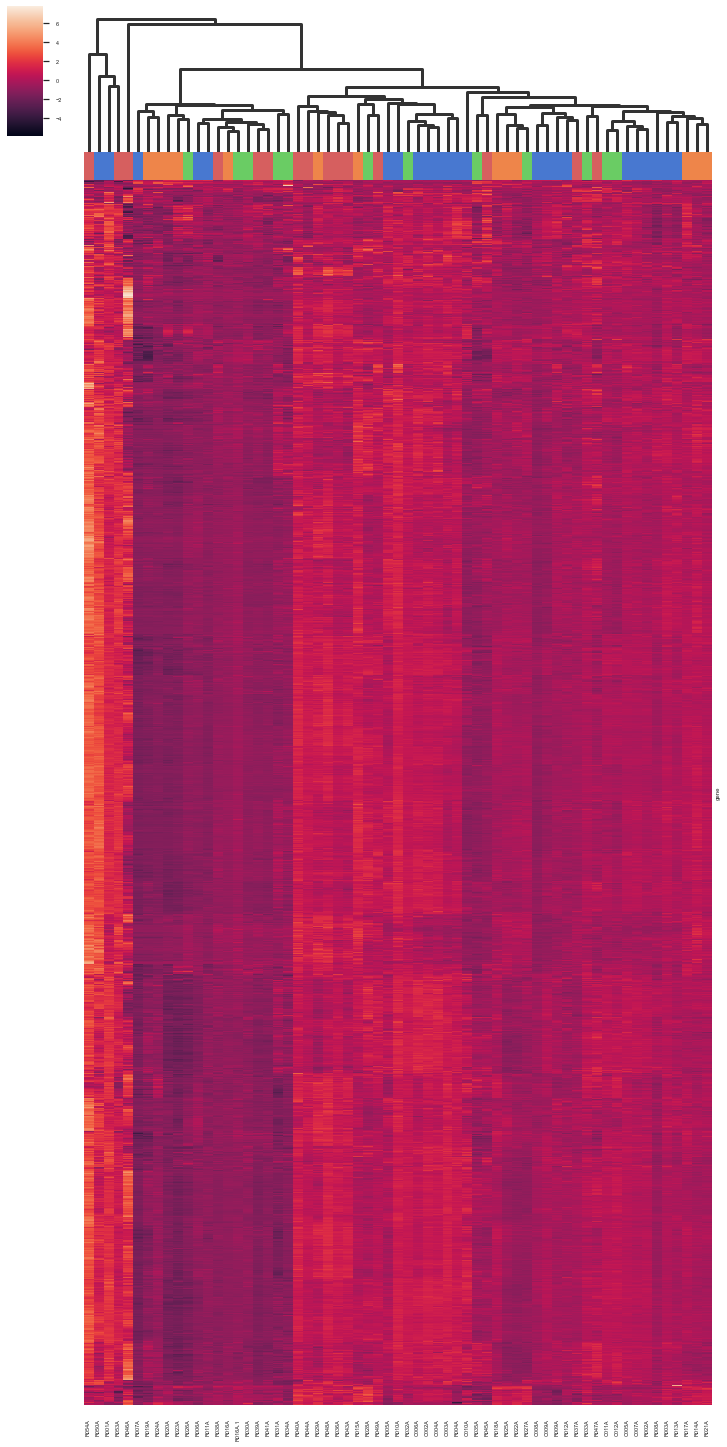

{'g': <seaborn.matrix.ClusterGrid at 0x2708515a4a8>}

In [43]:
sns.set(font_scale=0.5)
plot_clustermap(df, {sample_name: grp_name for grp_name, samples in batches.items() for sample_name in samples}, 
                group_list=list(batches.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022Feb/EDA/TPM_clustermap_batch.png"), prefix="", dpi=600
               )

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\results\2022Feb\EDA\TPM_clustermap_group.png


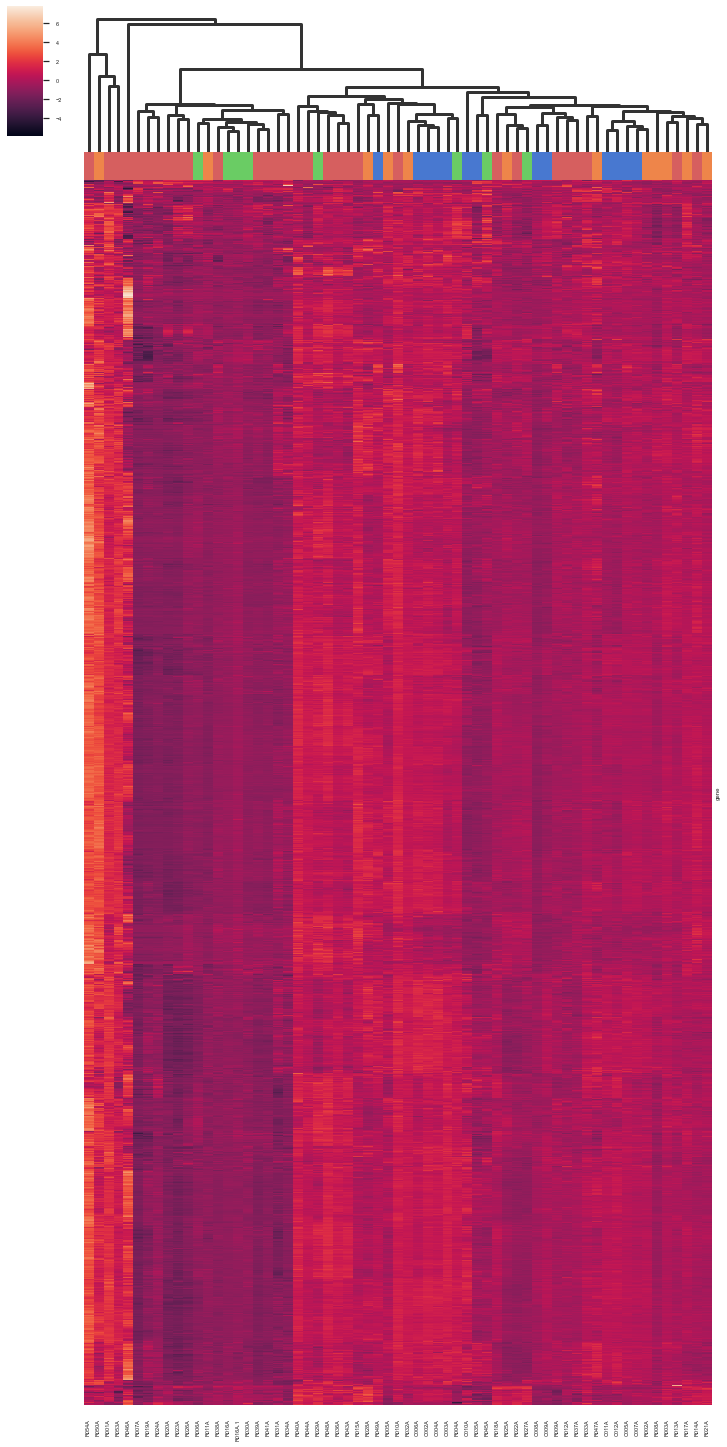

{'g': <seaborn.matrix.ClusterGrid at 0x270860430f0>}

In [44]:
sns.set(font_scale=0.5)
plot_clustermap(df, {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022Feb/EDA/TPM_clustermap_group.png"), prefix="", dpi=600
               )

## dim reduction

In [16]:
df = pd.read_csv(fpath, sep='\t', index_col=0)

In [17]:
def transform_func(x):
    return np.log2(x + 1)

saving  ../results/2022Feb/EDA/TSNE.png


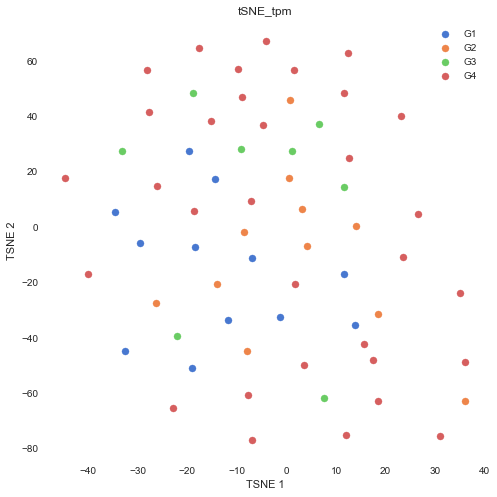

saving  ../results/2022Feb/EDA/UMAP.png


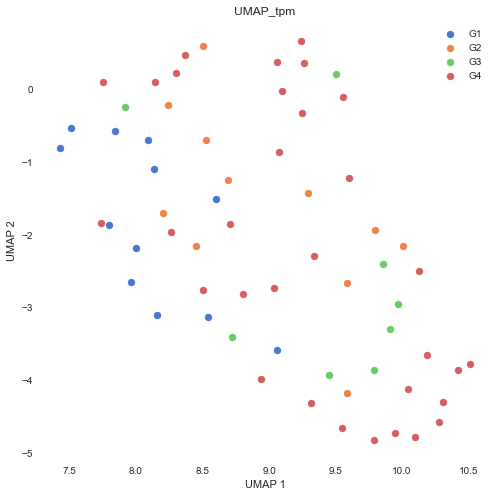

saving  ../results/2022Feb/EDA/PCA.png


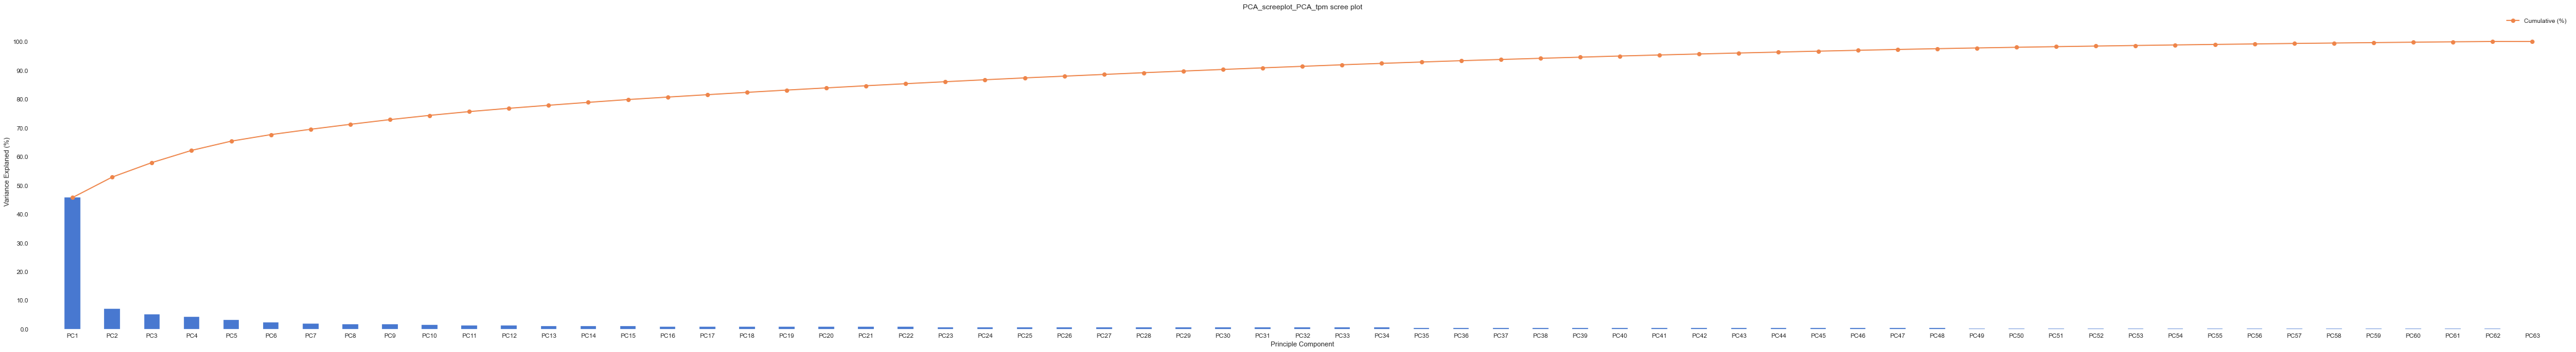

saving  ../results/2022Feb/EDA/PCA.png


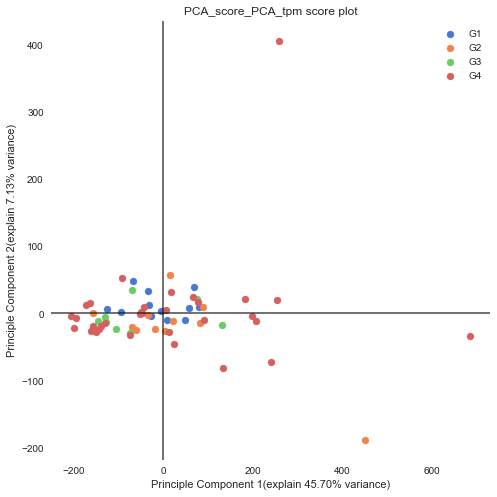

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R043A,R044A,R045A,R046A,R047A,R048A,R049A,R050A,R053A,R054A
PC1,8.047056e+01,6.796080e+01,5.685067e+01,-5.430231e+00,4.755361e+01,-2.752267e+01,-1.257458e+02,-9.595257e+01,-6.765376e+01,-3.341290e+01,...,7.713961e+01,9.126915e+01,-6.989478e+01,2.580832e+02,1.542436e+01,1.826132e+02,8.834972e+00,4.514098e+02,2.396451e+02,6.872682e+02
PC2,9.483297e+00,3.958366e+01,8.122590e+00,3.056869e+00,-9.042538e+00,-4.317374e+00,6.611019e+00,1.470647e+00,4.803855e+01,1.312280e+01,...,1.679873e+01,-9.733667e+00,3.530389e+01,4.061340e+02,5.672672e+01,2.124961e+01,-1.021128e+01,-1.879401e+02,-7.193711e+01,-3.423614e+01
PC3,-6.716093e+01,-4.353574e+01,-5.348011e+01,-2.065534e+01,-5.145410e+01,-1.581167e+01,1.375553e+01,-3.762829e+00,-1.819469e+01,-2.534165e+01,...,-1.088962e+01,-1.098984e+01,4.574053e+00,1.589040e+01,-1.833859e+01,-3.080045e+00,-4.233007e+01,-7.093551e+01,-9.381884e+00,3.030283e+02
PC4,-4.989195e+01,-7.270032e+01,-4.457222e+01,-2.950045e+01,-2.954493e+01,-1.902237e+01,-1.524042e+01,-2.331246e+01,-6.583413e+01,-2.904309e+01,...,-2.617104e+01,-2.637469e+00,-1.185176e+01,1.788588e+02,-2.535940e+01,-3.238447e+01,-1.016824e+01,2.188484e+02,3.602711e+01,-9.577104e+01
PC5,-2.677613e+01,7.252524e+00,-1.951076e+01,-1.109002e+01,-3.357465e+01,-1.397624e+01,2.595744e+00,-3.569265e+00,5.286308e+00,3.492526e+00,...,9.776705e+01,4.494364e+01,-3.469948e+01,-1.364205e+01,-5.173569e+01,1.302344e+02,1.314020e+01,1.205498e+01,-9.468271e+01,-3.977236e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC59,2.267305e-01,-1.284903e+00,-1.079093e+00,-8.454138e-01,-2.138547e-01,-1.236666e+00,4.408446e+01,-1.238875e+01,-9.404389e+00,-9.174657e-01,...,2.907983e-01,1.739463e-01,2.851476e+00,-3.046728e-01,3.624377e-01,-5.849362e-01,8.178094e-01,4.153732e-01,2.406840e-01,-1.031090e-01
PC60,2.967765e-01,1.282679e+00,5.529453e-01,4.760564e-01,1.088534e-01,1.406049e+00,-3.297370e+01,1.208702e+01,9.015117e-01,9.035898e-01,...,-8.115495e-01,-6.896469e-01,2.667471e+00,-2.865876e-01,5.945819e-01,1.952799e-01,9.966763e-01,-4.290657e-03,1.096009e-01,-1.381167e-01
PC61,-2.864399e-02,5.419372e-01,1.257901e-01,1.858019e-01,-1.808259e-01,-4.115010e-01,-2.005822e+01,7.312197e+00,-5.741596e+00,1.063260e+00,...,1.136265e+00,-1.720513e-01,1.359741e+00,-3.480898e-01,-2.998345e-01,-1.606327e-01,4.632419e-01,4.306683e-01,4.221593e-01,4.408672e-02
PC62,-3.270902e-01,2.293372e-01,-2.241208e-01,-7.214539e-01,-6.480844e-01,-1.089733e+00,-1.112022e+01,-4.626635e+00,-2.059151e+00,-1.139950e-01,...,6.875176e-01,8.702583e-01,-4.894685e-01,2.400493e-01,-4.432346e-01,-9.178921e-02,1.203206e+00,-2.340570e-02,1.369261e-01,2.451700e-01


In [20]:
sns.set(font_scale=0.8)
plt.style.use("seaborn")
plot_embedding(df, groups=groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/TSNE.png", dpi=450)

plot_embedding(df, groups=groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/UMAP.png", dpi=450)

plot_PCA(df, groups=groups, title="PCA_tpm",
         transform_func=transform_func,
         file_name="../results/2022Feb/EDA/PCA.png", dpi=450)

saving  ../results/EDA/TSNE_b.png


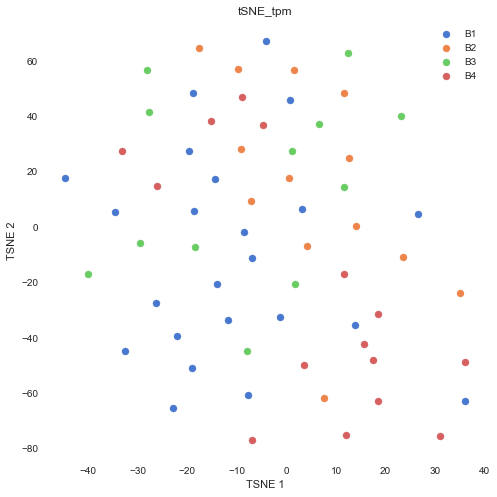

saving  ../results/EDA/UMAP_b.png


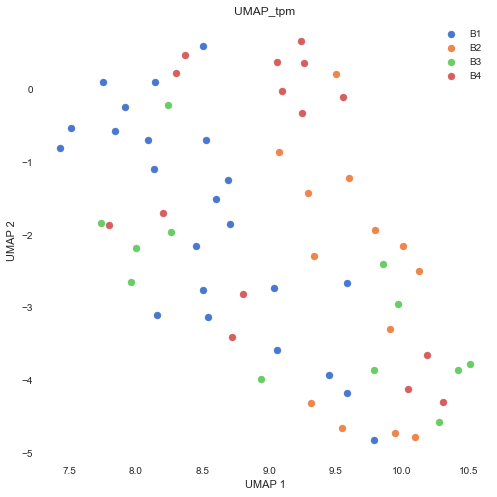

saving  ../results/EDA/PCA_b.png


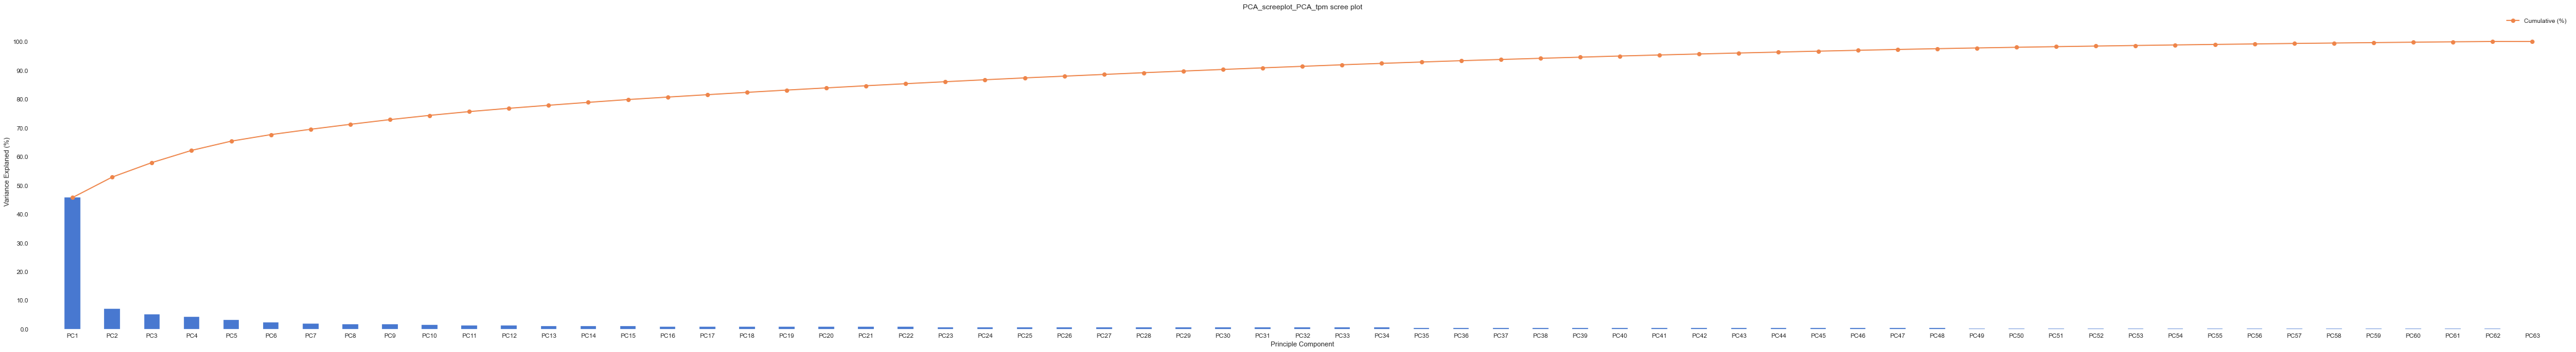

saving  ../results/EDA/PCA_b.png


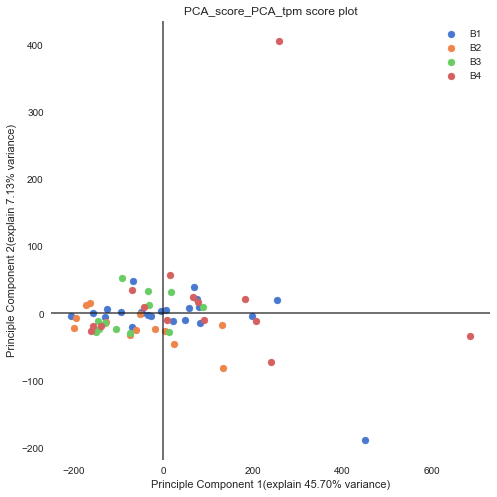

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R043A,R044A,R045A,R046A,R047A,R048A,R049A,R050A,R053A,R054A
PC1,8.047056e+01,6.796080e+01,5.685067e+01,-5.430231e+00,4.755361e+01,-2.752267e+01,-1.257458e+02,-9.595257e+01,-6.765376e+01,-3.341290e+01,...,7.713961e+01,9.126915e+01,-6.989478e+01,2.580832e+02,1.542436e+01,1.826132e+02,8.834972e+00,4.514098e+02,2.396451e+02,6.872682e+02
PC2,9.483297e+00,3.958366e+01,8.122590e+00,3.056869e+00,-9.042538e+00,-4.317374e+00,6.611019e+00,1.470647e+00,4.803855e+01,1.312280e+01,...,1.679873e+01,-9.733667e+00,3.530389e+01,4.061340e+02,5.672672e+01,2.124961e+01,-1.021128e+01,-1.879401e+02,-7.193711e+01,-3.423614e+01
PC3,-6.716093e+01,-4.353574e+01,-5.348011e+01,-2.065534e+01,-5.145410e+01,-1.581167e+01,1.375553e+01,-3.762829e+00,-1.819469e+01,-2.534165e+01,...,-1.088962e+01,-1.098984e+01,4.574053e+00,1.589040e+01,-1.833859e+01,-3.080045e+00,-4.233007e+01,-7.093551e+01,-9.381884e+00,3.030283e+02
PC4,-4.989195e+01,-7.270032e+01,-4.457222e+01,-2.950045e+01,-2.954493e+01,-1.902237e+01,-1.524042e+01,-2.331246e+01,-6.583413e+01,-2.904309e+01,...,-2.617104e+01,-2.637469e+00,-1.185176e+01,1.788588e+02,-2.535940e+01,-3.238447e+01,-1.016824e+01,2.188484e+02,3.602711e+01,-9.577104e+01
PC5,-2.677613e+01,7.252524e+00,-1.951076e+01,-1.109002e+01,-3.357465e+01,-1.397624e+01,2.595744e+00,-3.569265e+00,5.286308e+00,3.492526e+00,...,9.776705e+01,4.494364e+01,-3.469948e+01,-1.364205e+01,-5.173569e+01,1.302344e+02,1.314020e+01,1.205498e+01,-9.468271e+01,-3.977236e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC59,2.267305e-01,-1.284903e+00,-1.079093e+00,-8.454138e-01,-2.138547e-01,-1.236666e+00,4.408446e+01,-1.238875e+01,-9.404389e+00,-9.174657e-01,...,2.907983e-01,1.739463e-01,2.851476e+00,-3.046728e-01,3.624377e-01,-5.849362e-01,8.178094e-01,4.153732e-01,2.406840e-01,-1.031090e-01
PC60,2.967765e-01,1.282679e+00,5.529453e-01,4.760564e-01,1.088534e-01,1.406049e+00,-3.297370e+01,1.208702e+01,9.015117e-01,9.035898e-01,...,-8.115495e-01,-6.896469e-01,2.667471e+00,-2.865876e-01,5.945819e-01,1.952799e-01,9.966763e-01,-4.290657e-03,1.096009e-01,-1.381167e-01
PC61,-2.864399e-02,5.419372e-01,1.257901e-01,1.858019e-01,-1.808259e-01,-4.115010e-01,-2.005822e+01,7.312197e+00,-5.741596e+00,1.063260e+00,...,1.136265e+00,-1.720513e-01,1.359741e+00,-3.480898e-01,-2.998345e-01,-1.606327e-01,4.632419e-01,4.306683e-01,4.221593e-01,4.408672e-02
PC62,-3.270902e-01,2.293372e-01,-2.241208e-01,-7.214539e-01,-6.480844e-01,-1.089733e+00,-1.112022e+01,-4.626635e+00,-2.059151e+00,-1.139950e-01,...,6.875176e-01,8.702583e-01,-4.894685e-01,2.400493e-01,-4.432346e-01,-9.178921e-02,1.203206e+00,-2.340570e-02,1.369261e-01,2.451700e-01


In [68]:
sns.set(font_scale=0.8)
plt.style.use("seaborn")
plot_embedding(df, groups=batches, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../results/EDA/TSNE_b.png", dpi=450)

plot_embedding(df, groups=batches, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../results/EDA/UMAP_b.png", dpi=450)

plot_PCA(df, groups=batches, title="PCA_tpm",
         transform_func=transform_func,
         file_name="../results/EDA/PCA_b.png", dpi=450)

saving  ../results/EDA/PCA.png


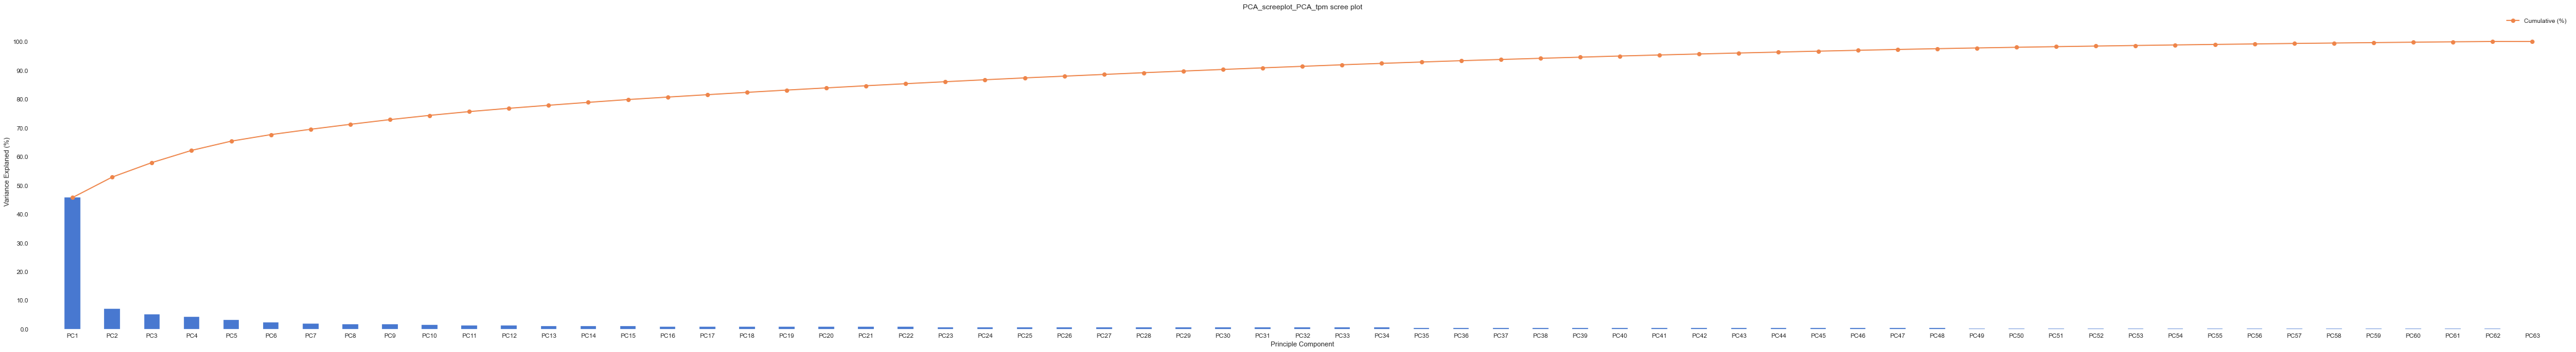

saving  ../results/EDA/PCA.png


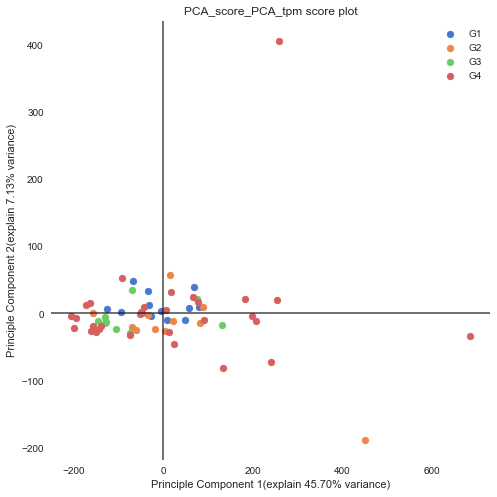

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R043A,R044A,R045A,R046A,R047A,R048A,R049A,R050A,R053A,R054A
PC1,8.047056e+01,6.796080e+01,5.685067e+01,-5.430231e+00,4.755361e+01,-2.752267e+01,-1.257458e+02,-9.595257e+01,-6.765376e+01,-3.341290e+01,...,7.713961e+01,9.126915e+01,-6.989478e+01,2.580832e+02,1.542436e+01,1.826132e+02,8.834972e+00,4.514098e+02,2.396451e+02,6.872682e+02
PC2,9.483297e+00,3.958366e+01,8.122590e+00,3.056869e+00,-9.042538e+00,-4.317374e+00,6.611019e+00,1.470647e+00,4.803855e+01,1.312280e+01,...,1.679873e+01,-9.733667e+00,3.530389e+01,4.061340e+02,5.672672e+01,2.124961e+01,-1.021128e+01,-1.879401e+02,-7.193711e+01,-3.423614e+01
PC3,-6.716093e+01,-4.353574e+01,-5.348011e+01,-2.065534e+01,-5.145410e+01,-1.581167e+01,1.375553e+01,-3.762829e+00,-1.819469e+01,-2.534165e+01,...,-1.088962e+01,-1.098984e+01,4.574053e+00,1.589040e+01,-1.833859e+01,-3.080045e+00,-4.233007e+01,-7.093551e+01,-9.381884e+00,3.030283e+02
PC4,-4.989195e+01,-7.270032e+01,-4.457222e+01,-2.950045e+01,-2.954493e+01,-1.902237e+01,-1.524042e+01,-2.331246e+01,-6.583413e+01,-2.904309e+01,...,-2.617104e+01,-2.637469e+00,-1.185176e+01,1.788588e+02,-2.535940e+01,-3.238447e+01,-1.016824e+01,2.188484e+02,3.602711e+01,-9.577104e+01
PC5,-2.677613e+01,7.252524e+00,-1.951076e+01,-1.109002e+01,-3.357465e+01,-1.397624e+01,2.595744e+00,-3.569265e+00,5.286308e+00,3.492526e+00,...,9.776705e+01,4.494364e+01,-3.469948e+01,-1.364205e+01,-5.173569e+01,1.302344e+02,1.314020e+01,1.205498e+01,-9.468271e+01,-3.977236e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC59,2.267305e-01,-1.284903e+00,-1.079093e+00,-8.454138e-01,-2.138547e-01,-1.236666e+00,4.408446e+01,-1.238875e+01,-9.404389e+00,-9.174657e-01,...,2.907983e-01,1.739463e-01,2.851476e+00,-3.046728e-01,3.624377e-01,-5.849362e-01,8.178094e-01,4.153732e-01,2.406840e-01,-1.031090e-01
PC60,2.967765e-01,1.282679e+00,5.529453e-01,4.760564e-01,1.088534e-01,1.406049e+00,-3.297370e+01,1.208702e+01,9.015117e-01,9.035898e-01,...,-8.115495e-01,-6.896469e-01,2.667471e+00,-2.865876e-01,5.945819e-01,1.952799e-01,9.966763e-01,-4.290657e-03,1.096009e-01,-1.381167e-01
PC61,-2.864399e-02,5.419372e-01,1.257901e-01,1.858019e-01,-1.808259e-01,-4.115010e-01,-2.005822e+01,7.312197e+00,-5.741596e+00,1.063260e+00,...,1.136265e+00,-1.720513e-01,1.359741e+00,-3.480898e-01,-2.998345e-01,-1.606327e-01,4.632419e-01,4.306683e-01,4.221593e-01,4.408672e-02
PC62,-3.270902e-01,2.293372e-01,-2.241208e-01,-7.214539e-01,-6.480844e-01,-1.089733e+00,-1.112022e+01,-4.626635e+00,-2.059151e+00,-1.139950e-01,...,6.875176e-01,8.702583e-01,-4.894685e-01,2.400493e-01,-4.432346e-01,-9.178921e-02,1.203206e+00,-2.340570e-02,1.369261e-01,2.451700e-01


saving  ../results/2022Feb/EDA/G1G2_TSNE.png


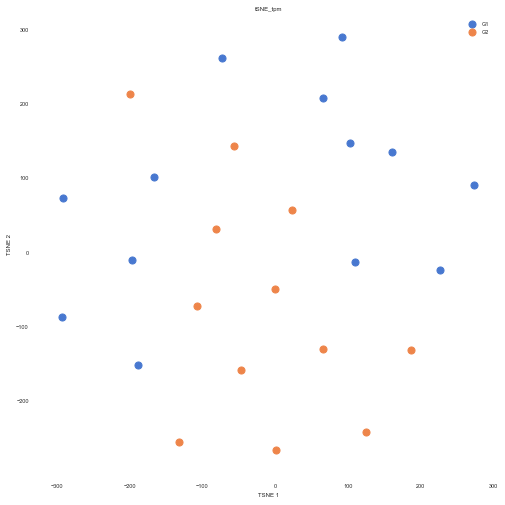

saving  ../results/2022Feb/EDA/G1G2_UMAP.png


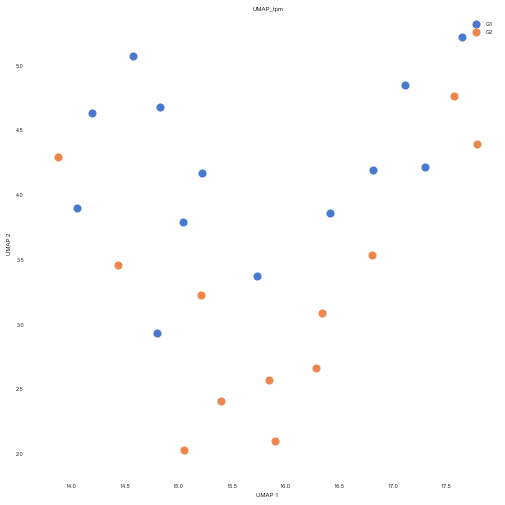

saving  ../results/2022Feb/EDA/G1G2_PCA.png


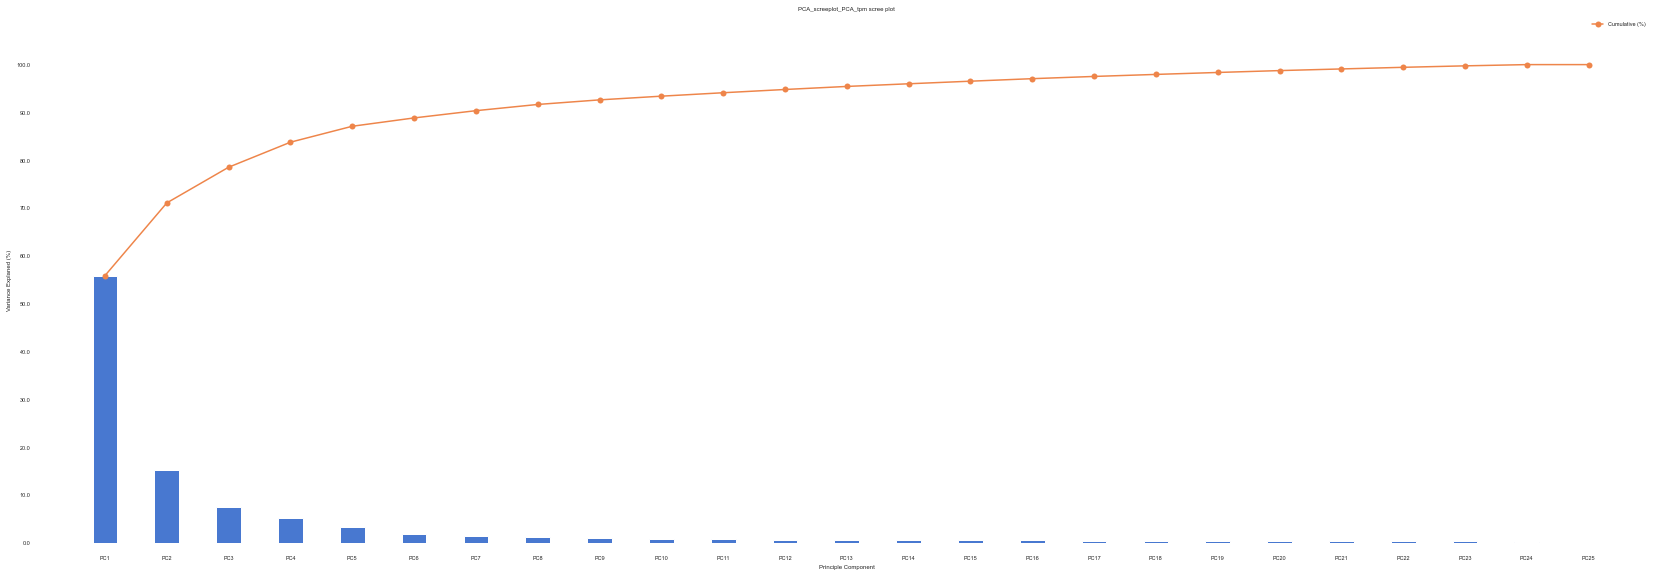

saving  ../results/2022Feb/EDA/G1G2_PCA.png


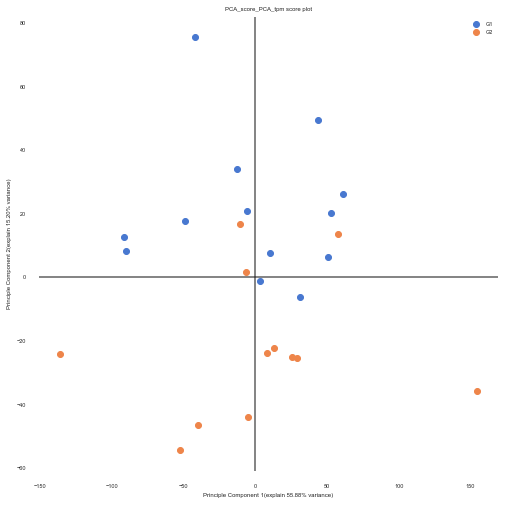

,R035A,R049A,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,...,R005A,R008A,R011A,R017A,R021A,R025A,R028A,R032A,R047A,R050A
PC1,-9.179484e+01,3.101607e+01,6.144084e+01,4.375033e+01,5.303828e+01,1.062811e+01,5.107566e+01,3.176380e+00,-9.036419e+01,-4.921341e+01,...,2.593363e+01,-4.008409e+01,-1.363178e+02,8.140067e+00,-5.216507e+00,-5.260738e+01,2.891523e+01,5.790498e+01,-1.093156e+01,1.548195e+02
PC2,1.271203e+01,-6.235741e+00,2.604301e+01,4.925726e+01,2.003646e+01,7.436970e+00,6.436257e+00,-1.306549e+00,8.093566e+00,1.776684e+01,...,-2.529372e+01,-4.638777e+01,-2.428386e+01,-2.380786e+01,-4.413244e+01,-5.443432e+01,-2.558746e+01,1.344675e+01,1.682948e+01,-3.575965e+01
PC3,5.018734e+01,-6.488545e+00,2.896739e+00,-9.438691e+00,5.663797e+00,1.138444e+00,7.929237e+00,1.651055e+00,-2.050054e+01,-2.019552e+01,...,3.184568e+01,2.020543e+01,-6.807210e+00,-2.591396e+01,-2.701868e+00,-3.331171e+01,-7.395761e+00,7.299853e+00,5.738819e+01,-1.309117e+01
PC4,-1.339925e+01,2.712571e+01,5.330399e+00,-1.778107e+01,1.291625e+01,-1.088705e+00,2.278688e+01,7.771570e+00,-3.432765e+00,6.309301e+00,...,-1.934447e+01,1.947551e+01,-3.142968e+00,-1.440752e+01,4.416014e+00,-2.867053e+01,4.909312e+01,-7.935690e+00,-1.401276e+01,-3.432875e+01
PC5,-2.715126e+01,-1.859106e+01,1.055592e+01,1.846099e+00,8.686423e+00,1.303234e+01,1.191767e+01,1.036664e+01,4.844185e+00,9.485480e+00,...,3.087795e+01,1.239336e+01,2.157974e+01,-6.062361e+00,-1.569752e+01,-1.447237e+01,-1.362952e+01,-1.293138e-01,-1.167932e+01,-7.041691e+00
PC6,-5.495190e+00,-1.238077e+00,4.774478e+00,-7.225644e-01,3.681810e+00,1.008836e-02,-9.387905e-01,-1.034979e+01,-7.658444e+00,-6.611691e+00,...,1.111852e+01,-1.443027e+01,4.858122e+00,1.323221e+01,-6.348143e+00,1.235494e+01,2.536013e+01,-5.884051e-01,1.513749e+01,-1.166562e+01
PC7,-8.449268e+00,2.136278e+00,3.386553e+00,1.216198e+01,8.977151e+00,7.055248e+00,-3.211089e+00,9.232994e-01,-6.887577e+00,-1.599073e+01,...,-7.678692e+00,4.556053e-01,-6.728832e+00,2.657412e+00,8.779738e+00,1.005098e+01,-1.106111e+01,-2.820525e+00,1.674775e+00,-2.207140e+01
PC8,2.542655e+00,-8.303692e+00,-1.645007e-01,2.324458e+00,-2.140089e+00,5.070267e+00,-3.563349e+00,3.184766e+00,2.173720e+00,9.369879e+00,...,2.062551e+01,-6.559815e+00,-1.617531e+01,5.206158e+00,3.303631e-01,6.101264e+00,3.487536e+00,7.456011e+00,-1.250615e+01,-1.586771e+01
PC9,-1.158187e+01,2.201444e+01,-7.923448e-01,-2.816877e+00,-5.161139e+00,8.050586e+00,1.865987e+00,2.925562e+00,2.967215e+00,8.351990e+00,...,1.937768e+00,-2.328942e+00,-1.998052e+00,3.714795e+00,-8.023642e+00,3.817565e+00,-1.187956e+01,-7.915163e+00,1.467688e+01,-2.489764e+00
PC10,-3.243605e+00,6.258250e+00,-7.909912e+00,-9.768637e+00,-5.123274e+00,-6.653741e+00,2.826008e+00,2.377198e+00,-5.265892e+00,-1.008125e+01,...,6.066208e+00,-1.929437e-02,5.598904e+00,1.593390e+01,-2.533266e-02,-1.087971e+01,-6.331888e+00,1.098448e+01,-3.360110e+00,-3.583785e+00


In [52]:
red_df = df.loc[:, groups['G1'] + groups['G2']]
red_groups = {k: v for k, v in groups.items() if k in ["G1", "G2"]}

plot_embedding(red_df, groups=red_groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/G1G2_TSNE.png", dpi=450)

plot_embedding(red_df, groups=red_groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/G1G2_UMAP.png", dpi=450)

plot_PCA(red_df, groups=red_groups, title="PCA_tpm",
         transform_func=transform_func,
         file_name="../results/2022Feb/EDA/G1G2_PCA.png", dpi=450)

In [23]:
labels[labels["sample"] == "R050"]

,sample,sex,extraction date(not all),group,age,seq date,batch
48,R050,F,2019-06-14,2,29.430137,2019-11-08,1


saving  ../results/2022Feb/EDA/G1G2_d50_TSNE.png


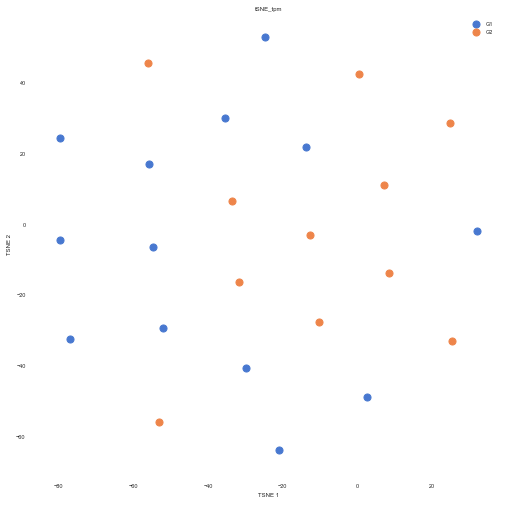

saving  ../results/2022Feb/EDA/G1G2_d50_UMAP.png


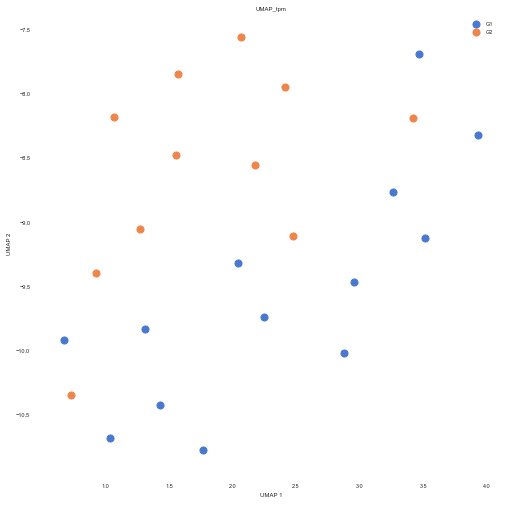

saving  ../results/2022Feb/EDA/G1G2_d50_PCA.png


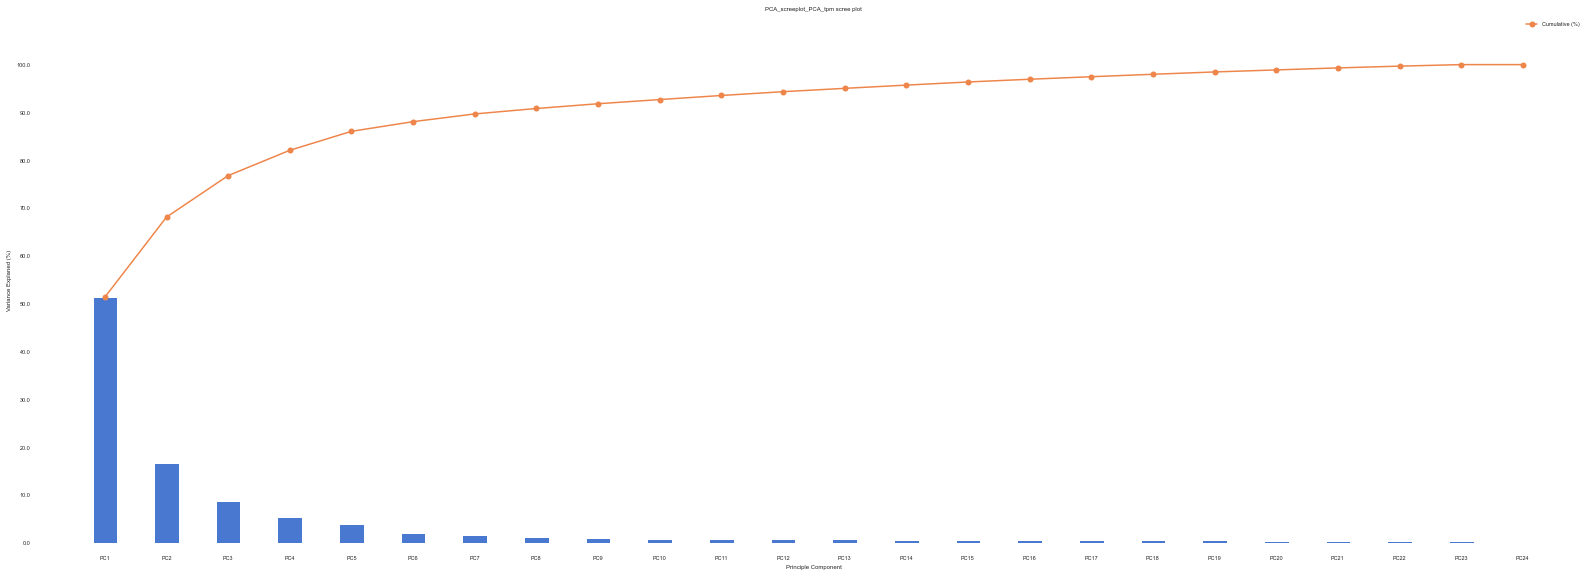

saving  ../results/2022Feb/EDA/G1G2_d50_PCA.png


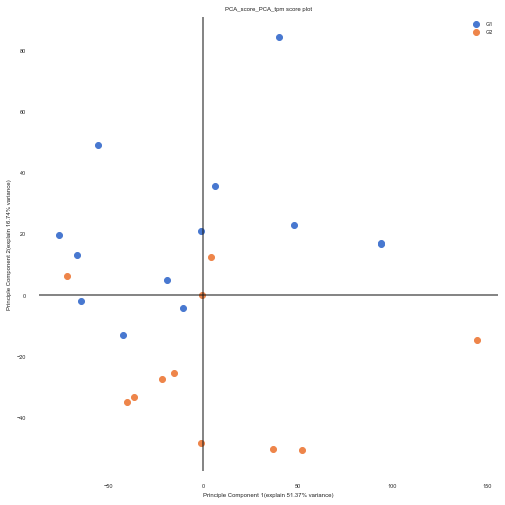

,R035A,R049A,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,...,R003A,R005A,R008A,R011A,R017A,R021A,R025A,R028A,R032A,R047A
PC1,9.399388e+01,-4.221266e+01,-7.589239e+01,-5.577619e+01,-6.649698e+01,-1.890847e+01,-6.430126e+01,-1.069300e+01,9.404139e+01,4.815524e+01,...,-2.147371e+01,-3.623929e+01,3.709269e+01,1.451383e+02,-1.539931e+01,-1.169181e+00,5.228222e+01,-4.011542e+01,-7.169757e+01,4.199547e+00
PC2,1.683901e+01,-1.303962e+01,1.959772e+01,4.897239e+01,1.328159e+01,4.798002e+00,-1.880151e+00,-4.144072e+00,1.699812e+01,2.306070e+01,...,-2.724515e+01,-3.311835e+01,-5.005644e+01,-1.476482e+01,-2.527027e+01,-4.821559e+01,-5.057288e+01,-3.483507e+01,6.403965e+00,1.251620e+01
PC3,5.661089e+01,-1.426750e+01,2.043609e+00,-5.245701e+00,2.996337e+00,1.086006e+00,2.784704e+00,-4.908984e-01,-1.825847e+01,-2.040182e+01,...,5.373548e+00,3.523618e+01,1.576594e+01,-3.781569e+00,-2.710159e+01,-6.991047e+00,-3.142287e+01,-2.002971e+01,7.193671e+00,6.370309e+01
PC4,9.334333e+00,2.562272e+01,-1.690901e+00,-2.446402e+01,6.265320e+00,-7.284782e+00,1.765483e+01,4.456934e+00,6.352971e-01,8.169790e+00,...,-1.458344e+01,-2.931008e+01,1.950558e+01,1.752765e+00,-2.449487e+01,4.247305e-01,-3.821444e+01,4.472511e+01,-1.357645e+01,-2.556760e+00
PC5,2.643992e+01,1.716018e+01,-1.065163e+01,2.672022e+00,-9.825292e+00,-1.208823e+01,-1.531219e+01,-1.189240e+01,-7.302905e+00,-1.279023e+01,...,-4.558605e+00,-2.560440e+01,-1.757877e+01,-2.572057e+01,1.264811e+01,1.759524e+01,2.314971e+01,8.530890e+00,4.873812e+00,1.434090e+01
PC6,-3.409660e+00,-8.715570e-01,3.494532e+00,-6.342893e+00,4.717567e-01,-3.268567e+00,5.648472e-01,-1.092604e+01,-4.652604e+00,-1.669936e+00,...,-9.071457e+00,1.088365e+01,-1.337796e+01,1.024097e+01,1.020243e+01,-9.551155e+00,6.682975e+00,2.877851e+01,-6.240584e-01,1.595333e+01
PC7,7.204468e+00,-7.376728e+00,-2.742084e+00,-4.634938e+00,-8.670618e+00,1.097460e-01,-5.444341e-01,3.628942e+00,6.474162e+00,1.832047e+01,...,-2.094640e+01,2.201647e+01,-4.277318e+00,-1.004295e+01,2.500366e+00,-4.225119e+00,-1.680342e+00,5.399944e+00,9.817507e+00,-1.269720e+01
PC8,-1.243682e+01,2.459740e+01,-1.521609e+00,-4.108233e+00,-6.749617e+00,6.776264e+00,2.930572e+00,3.441118e+00,3.044848e+00,8.473570e+00,...,-8.390946e+00,7.925034e-01,-1.005559e+00,1.527584e-01,3.202930e+00,-7.450954e+00,2.241233e+00,-1.421781e+01,-6.447387e+00,1.584916e+01
PC9,-9.546068e-01,7.434125e+00,-9.148032e+00,-9.979123e+00,-7.274081e+00,-8.936224e+00,4.595323e+00,2.694852e+00,-4.701193e+00,-1.013266e+01,...,-1.267002e+00,4.245311e+00,2.238958e+00,6.989478e+00,1.171323e+01,5.491495e+00,-1.262761e+01,-8.163554e+00,1.665021e+01,-5.014609e+00
PC10,-5.558985e+00,3.820386e+00,-6.077364e+00,-4.970541e+00,-3.820844e+00,-1.386090e+00,-6.891273e+00,-5.355988e+00,5.062832e+00,5.254105e+00,...,4.280140e+00,1.292279e+01,6.309656e-01,-1.407775e+01,-1.199480e+01,1.355452e+01,-6.772900e-01,1.824798e+00,-5.178944e+00,3.199754e+00


In [54]:
red_groups = {k: [vi for vi in v if vi != "R050A"] for k, v in red_groups.items()}
red_df = red_df.loc[:, red_groups['G1'] + red_groups['G2']]

plot_embedding(red_df, groups=red_groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/G1G2_d50_TSNE.png", dpi=450)

plot_embedding(red_df, groups=red_groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/G1G2_d50_UMAP.png", dpi=450)

plot_PCA(red_df, groups=red_groups, title="PCA_tpm",
         transform_func=transform_func,
         file_name="../results/2022Feb/EDA/G1G2_d50_PCA.png", dpi=450)

saving  ../results/2022Feb/EDA/PCA_plus_transc.png


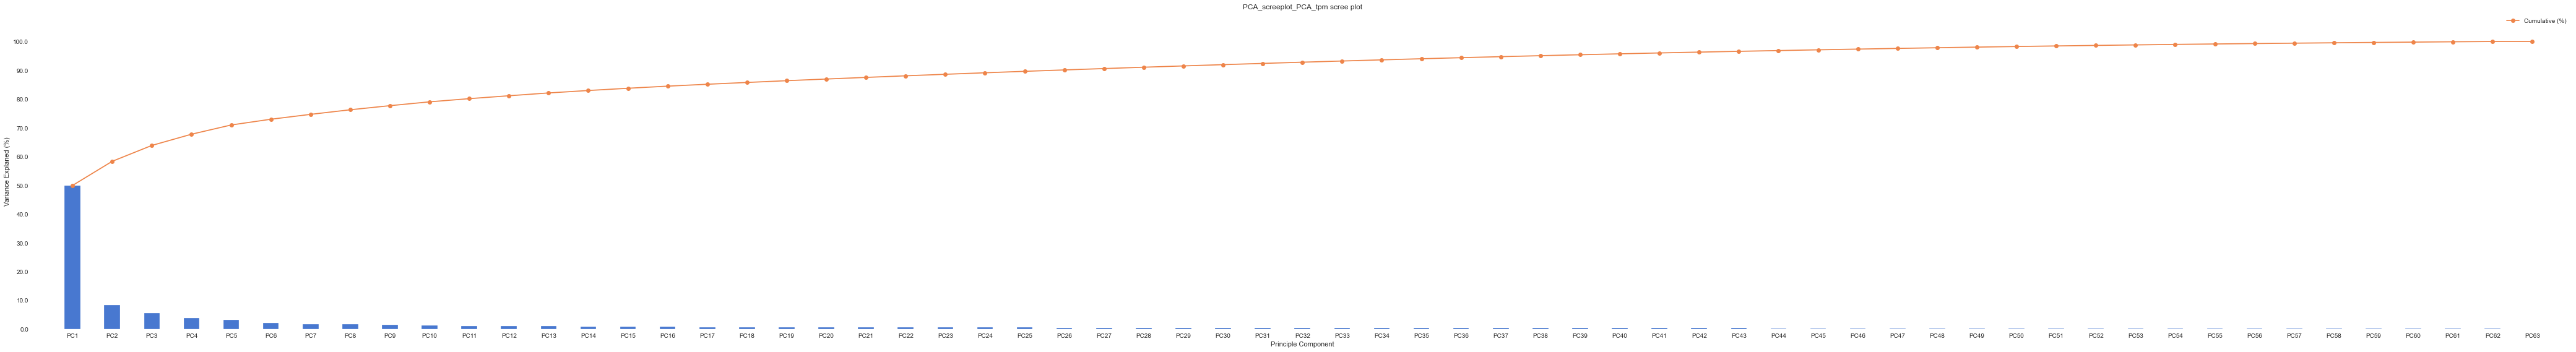

saving  ../results/2022Feb/EDA/PCA_plus_transc.png


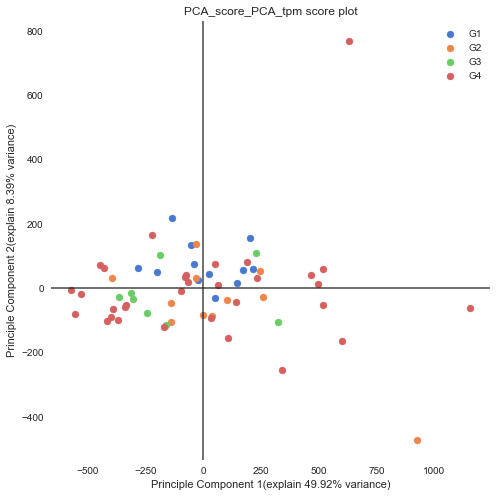

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R043A,R044A,R045A,R046A,R047A,R048A,R049A,R050A,R053A,R054A
PC1,2.172766e+02,2.019672e+02,1.723115e+02,2.459512e+01,1.479597e+02,-2.264538e+01,-2.810156e+02,-2.012590e+02,-1.330369e+02,-4.001822e+01,...,2.340713e+02,1.411217e+02,-1.854388e+02,6.299909e+02,-2.859533e+01,4.683529e+02,5.228729e+01,9.248829e+02,6.008913e+02,1.155943e+03
PC2,5.742825e+01,1.550604e+02,5.608082e+01,4.307154e+01,1.468098e+01,2.527711e+01,6.204875e+01,4.789055e+01,2.179263e+02,7.377017e+01,...,3.171808e+01,-4.521627e+01,1.029242e+02,7.684861e+02,1.365796e+02,4.118160e+01,-3.112758e+01,-4.721819e+02,-1.649364e+02,-6.220371e+01
PC3,-1.898059e+02,-1.696995e+02,-1.743286e+02,-1.030372e+02,-1.676647e+02,-9.373501e+01,-4.361135e+01,-9.441973e+01,-1.729373e+02,-1.131835e+02,...,1.889672e+01,4.585871e+01,-1.924104e+01,4.812558e+02,-4.067810e+01,5.785374e+01,-9.245744e+01,1.668896e+02,-9.462007e+00,2.557461e+02
PC4,-3.831046e+01,8.815313e+01,-3.241057e+01,1.025905e+01,-7.148772e+01,-9.631691e+00,5.230524e+01,2.667794e+01,1.042448e+02,1.310967e+01,...,1.480485e+02,4.845031e+01,-1.176173e+01,-3.089319e+02,-2.865190e+01,2.036624e+02,-5.282616e+01,-1.942228e+02,-1.221828e+02,4.019592e+02
PC5,1.175116e+00,-2.860714e+01,6.862621e-02,7.330398e+00,2.013910e+01,7.257782e+00,-8.877736e+00,-1.092287e+01,-1.687441e+01,-3.856216e+01,...,-1.807679e+02,-5.687646e+01,9.489886e+01,-6.678982e+01,1.148167e+02,-1.954481e+02,-6.271904e+01,-7.543517e+01,1.503997e+02,3.819709e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC59,6.662359e-01,-4.048716e+00,-2.050076e+00,-1.679663e+00,-4.278716e-01,-5.496904e+00,7.998284e+01,-3.324383e+01,-1.574973e+00,-3.859123e+00,...,-1.092753e+00,1.217643e+00,-2.017104e+00,3.187857e-02,4.139505e-01,-1.057855e+00,-1.748473e+00,5.098752e-01,-3.338994e-01,-6.884276e-02
PC60,4.226202e-01,2.428723e-01,-8.079002e-01,4.031101e-01,-6.069672e-01,2.546550e+00,-4.366554e+01,3.225338e+01,-4.075816e+00,1.634142e-01,...,-9.829424e-01,-3.200689e+00,7.485143e+00,-9.329598e-01,1.724595e+00,3.937778e-01,8.773914e-01,3.251287e-01,2.325989e-01,-8.514817e-01
PC61,7.112561e-01,-1.286979e+00,8.889635e-02,-6.428655e-02,1.425754e+00,2.762180e+00,3.464755e+01,-6.866782e+00,1.125380e+01,9.331268e-02,...,-4.509711e+00,-2.014305e+00,-1.334225e+00,4.229544e-01,2.267284e+00,-3.488131e-01,2.623659e-01,-1.301505e+00,-5.268978e-01,-5.450074e-01
PC62,-1.040557e+00,1.317551e+00,-2.948782e-01,-2.186510e+00,-1.632536e+00,-2.011455e+00,-2.525545e+01,-1.053823e+01,-1.537132e+00,-1.514735e-01,...,1.461282e+00,2.569101e+00,-2.111021e+00,6.174220e-01,-1.863652e+00,-5.151132e-01,3.289602e+00,-4.208119e-01,5.892916e-01,8.300763e-01


In [28]:
sns.set(font_scale=0.8)
plt.style.use("seaborn")
plot_embedding(tot_df, groups=groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/TSNE_plus_transc.png", sheet_file_name="../results/2022Feb/EDA/tsne.csv", dpi=450)

plot_embedding(tot_df, groups=groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/UMAP_plus_transc.png", sheet_file_name="../results/2022Feb/EDA/umap.csv", dpi=450)

plot_PCA(tot_df, groups=groups, title="PCA_tpm",
         transform_func=transform_func, sheet_file_name="../results/2022Feb/EDA/pca.csv",
         file_name="../results/2022Feb/EDA/PCA_plus_transc.png", dpi=450)

In [55]:
red_groups = {k: [vi for vi in v if vi not in ["R031A","R040A","R050A", "R046A", "R054A", "R053A"]] for k, v in groups.items()}  # remove the predicted outliers
red_df = df.loc[:, red_groups['G1'] + red_groups['G2'] + red_groups['G3'] + red_groups['G4']]

In [56]:
red_df

,R035A,R049A,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,...,R033A,R034A,R036A,R037A,R038A,R039A,R041A,R043A,R044A,R048A
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,1.061880,1.203928,1.930582,2.824035,1.218422,0.684775,1.339787,1.279150,0.650357,1.349637,...,1.680729,0.146298,1.044156,1.673036,0.117936,0.752519,0.537470,1.070561,0.644823,0.907452
ENSG00000227232.5,1.783892,1.829586,2.303757,2.399846,2.368539,2.089942,2.286269,1.761889,1.330048,1.591229,...,1.938711,1.171553,1.987703,1.536436,0.738949,0.583794,0.655310,2.066416,2.283548,2.481785
ENSG00000278267.1,3.016181,3.110816,3.588013,3.489581,3.509404,3.390094,3.653576,3.114125,2.272483,2.880002,...,2.421269,2.097304,2.471723,2.588877,0.910055,0.700695,0.675908,2.806681,3.509430,3.576341
ENSG00000233750.3,0.945702,1.458524,1.574775,0.981868,1.666384,1.145332,2.574450,1.122447,0.401540,0.887583,...,1.540394,1.031720,1.444990,0.694964,0.661127,0.505730,0.318045,0.553119,1.054168,0.563167
ENSG00000268903.1,4.245480,4.941200,5.509401,4.115358,5.418962,4.305810,6.141504,4.577223,3.004656,4.508777,...,4.434528,4.476997,4.923520,2.993214,2.758970,2.111188,2.217302,2.859284,3.683797,2.954522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000252155.1,0.890496,0.000000,1.836356,2.423038,0.000000,0.000000,0.000000,0.000000,0.929540,0.987947,...,0.000000,0.000000,0.000000,1.465745,0.738153,0.000000,0.707361,2.199902,2.410300,0.000000
ENSG00000067048.15,0.469163,0.003451,1.460837,1.440734,0.002488,0.001862,0.000000,0.000000,0.657109,0.851662,...,0.000587,0.000000,0.000923,0.891030,0.608757,0.000599,0.652747,1.708086,1.770444,0.000000
ENSG00000198692.8,0.692386,0.000541,1.188224,0.996355,0.000000,0.000000,0.000000,0.000000,0.451553,0.669558,...,0.001102,0.000000,0.000000,0.697703,0.652107,0.000000,0.809783,1.451631,1.331459,0.000691


saving  ../results/2022Feb/EDA/TSNE.png


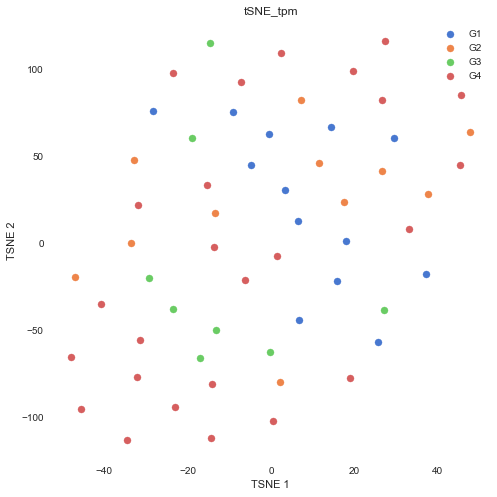

saving  ../results/2022Feb/EDA/UMAP.png


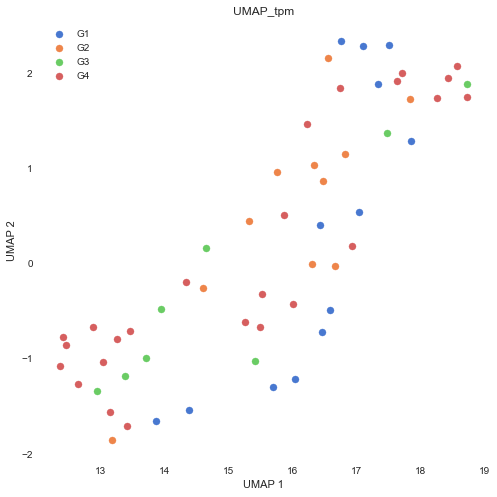

saving  ../results/2022Feb/EDA/PCA_plus_transc.png


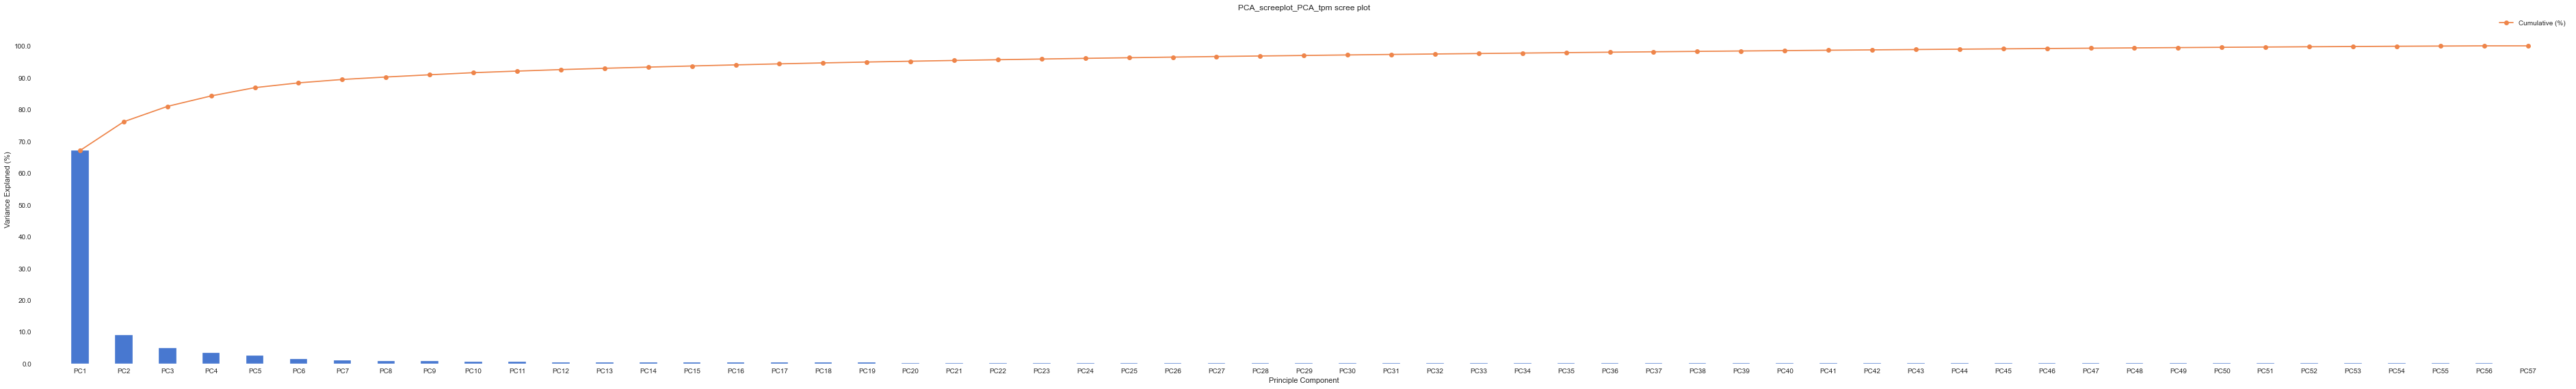

saving  ../results/2022Feb/EDA/PCA_plus_transc.png


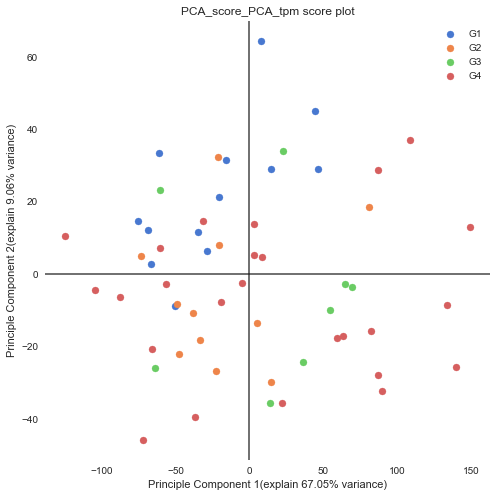

,R035A,R049A,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,...,R033A,R034A,R036A,R037A,R038A,R039A,R041A,R043A,R044A,R048A
PC1,4.417162e+01,-5.040859e+01,-7.513227e+01,-6.135506e+01,-6.834944e+01,-3.491750e+01,-6.634096e+01,-2.854625e+01,4.657212e+01,1.488696e+01,...,-3.165814e+01,6.323953e+01,-6.055092e+01,3.458314e+00,5.958340e+01,8.677309e+01,8.243301e+01,-5.633674e+01,-6.599343e+01,-8.761173e+01
PC2,4.485485e+01,-8.846615e+00,1.460272e+01,3.332311e+01,1.209412e+01,1.146240e+01,2.576406e+00,6.171101e+00,2.883086e+01,2.877733e+01,...,1.452868e+01,-1.727660e+01,7.124261e+00,5.170580e+00,-1.792480e+01,-2.793193e+01,-1.586001e+01,-2.956571e+00,-2.070957e+01,-6.443099e+00
PC3,-1.716823e+01,-4.334647e+00,-5.986570e+00,1.760441e+01,-9.426802e+00,-4.284313e+00,-1.792080e+01,-8.084393e+00,1.612480e+01,1.116786e+01,...,-7.724890e+00,-2.209035e+01,2.344695e+01,5.594883e+00,-3.832211e+00,-2.028758e+00,1.095606e+01,3.681128e+01,8.524541e+00,3.358052e+01
PC4,-1.106417e+01,2.471586e+01,8.547083e+00,-4.671832e-01,1.291338e+01,3.130646e+00,1.783902e+01,1.060156e+01,1.289368e+01,2.020045e+01,...,-8.661156e+00,1.116662e+00,-2.771537e+00,-1.939064e+01,1.279681e+01,1.431685e+01,1.332512e+01,-1.232404e+01,-6.806954e+00,-2.175009e+01
PC5,-2.729535e+01,-9.079249e+00,1.101622e+01,7.120985e+00,6.057332e+00,1.152604e+01,7.395181e+00,4.738538e+00,5.417931e+00,1.618050e+01,...,-3.332335e+00,1.116572e+01,-1.050155e+01,-5.711402e+00,-4.978805e+00,1.173713e+01,1.620533e+00,-1.530218e+01,-2.435943e+01,-1.638912e+01
PC6,1.126387e+01,7.897953e+00,-3.388007e+00,-6.376424e+00,-4.600640e+00,-6.416564e+00,-3.442879e+00,-9.169463e+00,-1.090961e+01,-6.298666e+00,...,1.733751e+01,1.497011e+01,3.837171e+00,1.535965e-01,-2.833099e+00,8.128938e+00,-1.278527e+00,4.247532e+00,-5.765679e+00,-6.571921e-01
PC7,-5.300358e+00,5.514239e+00,-2.285946e+00,-5.348000e+00,4.231381e+00,1.279177e+00,6.377608e+00,7.372185e-01,-1.636490e+00,-2.372369e+00,...,-1.056026e+01,3.650477e+01,1.532939e+01,1.660745e+00,-2.253065e+00,-6.332234e+00,-1.573341e+00,1.271189e+01,1.137667e-01,9.651683e+00
PC8,-3.104055e+00,-6.510290e+00,1.523752e+00,-2.547130e+00,3.616694e+00,-1.034208e-02,9.882692e-01,-1.033142e+00,5.433017e-01,-4.793885e+00,...,1.583910e+01,3.589709e+00,-1.565429e+00,9.788924e+00,-5.426317e+00,-8.157578e+00,-9.912911e+00,-7.547338e+00,-9.654434e+00,-8.521677e+00
PC9,2.923239e+00,-2.373928e+00,-1.261904e+00,-2.514520e+00,-5.352268e+00,-3.465151e+00,1.761585e-01,6.163178e+00,2.158045e+00,2.452692e+00,...,7.134409e+00,6.744585e+00,4.761751e+00,1.673290e+01,-2.573698e+00,1.950803e+00,6.953825e+00,4.539613e+00,-3.523601e+00,2.032313e+00
PC10,1.976703e+00,-8.929315e+00,-2.800123e+00,-4.444594e+00,-5.542892e+00,-8.596197e+00,-3.982493e+00,-4.401069e+00,2.983060e+00,2.268763e+00,...,-3.806839e+00,4.185901e+00,2.155317e+00,6.332697e+00,-1.025555e+01,6.333326e-01,1.880012e+00,-1.377510e+00,-2.271857e+00,1.180177e+00


In [57]:
sns.set(font_scale=0.8)
plt.style.use("seaborn")
plot_embedding(red_df, groups=red_groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/TSNE.png", sheet_file_name="../results/2022Feb/EDA/tsne.csv", dpi=450)

plot_embedding(red_df, groups=red_groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../results/2022Feb/EDA/UMAP.png", sheet_file_name="../results/2022Feb/EDA/umap.csv", dpi=450)

plot_PCA(red_df, groups=red_groups, title="PCA_tpm",
         transform_func=transform_func, sheet_file_name="../results/2022Feb/EDA/pca.csv",
         file_name="../results/2022Feb/EDA/PCA_plus_transc.png", dpi=450)

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\axisgrid.py:392 RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


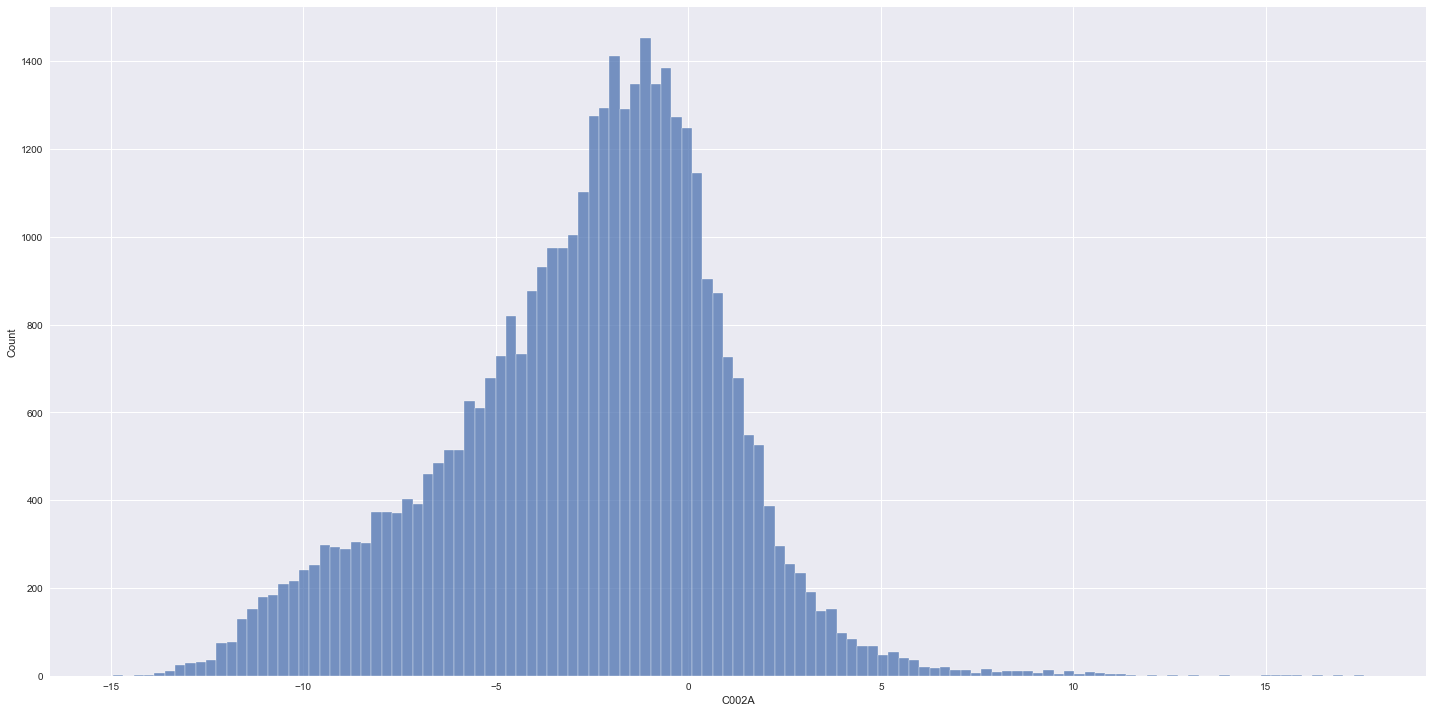

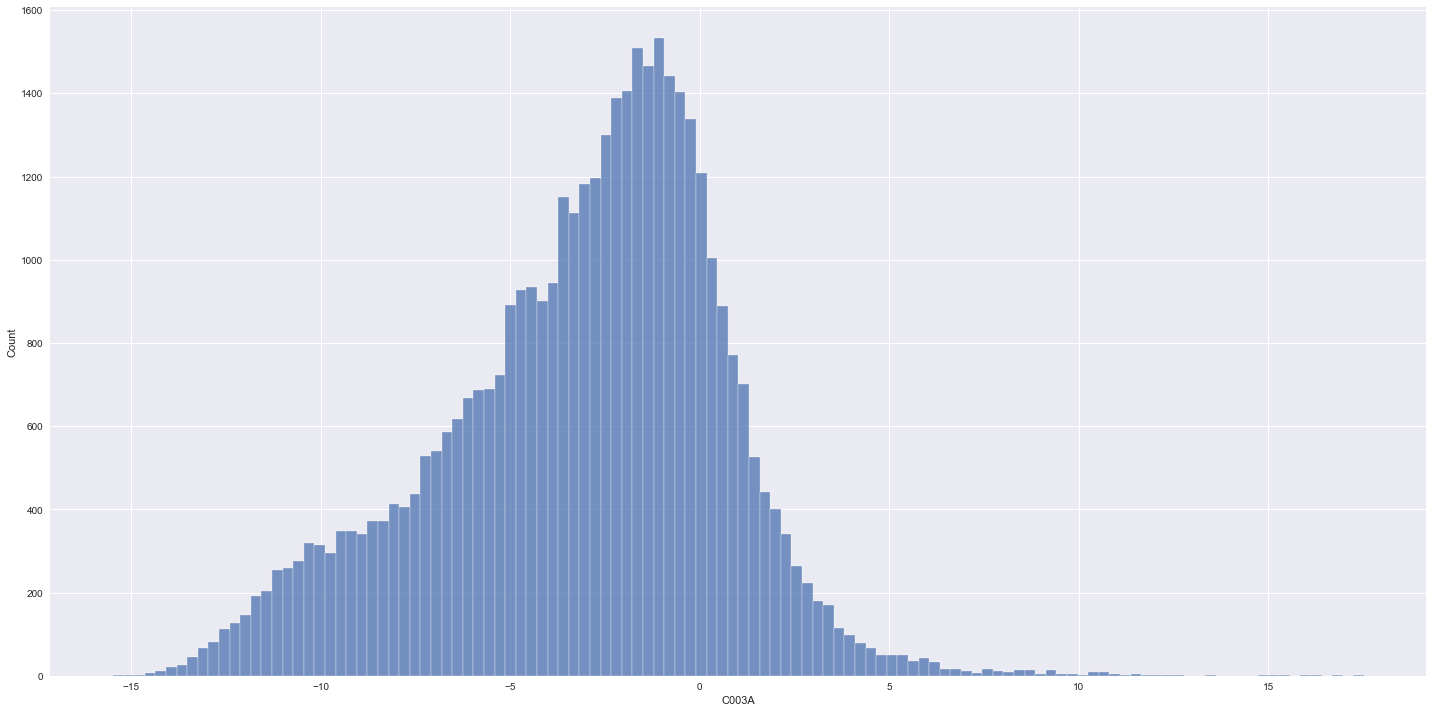

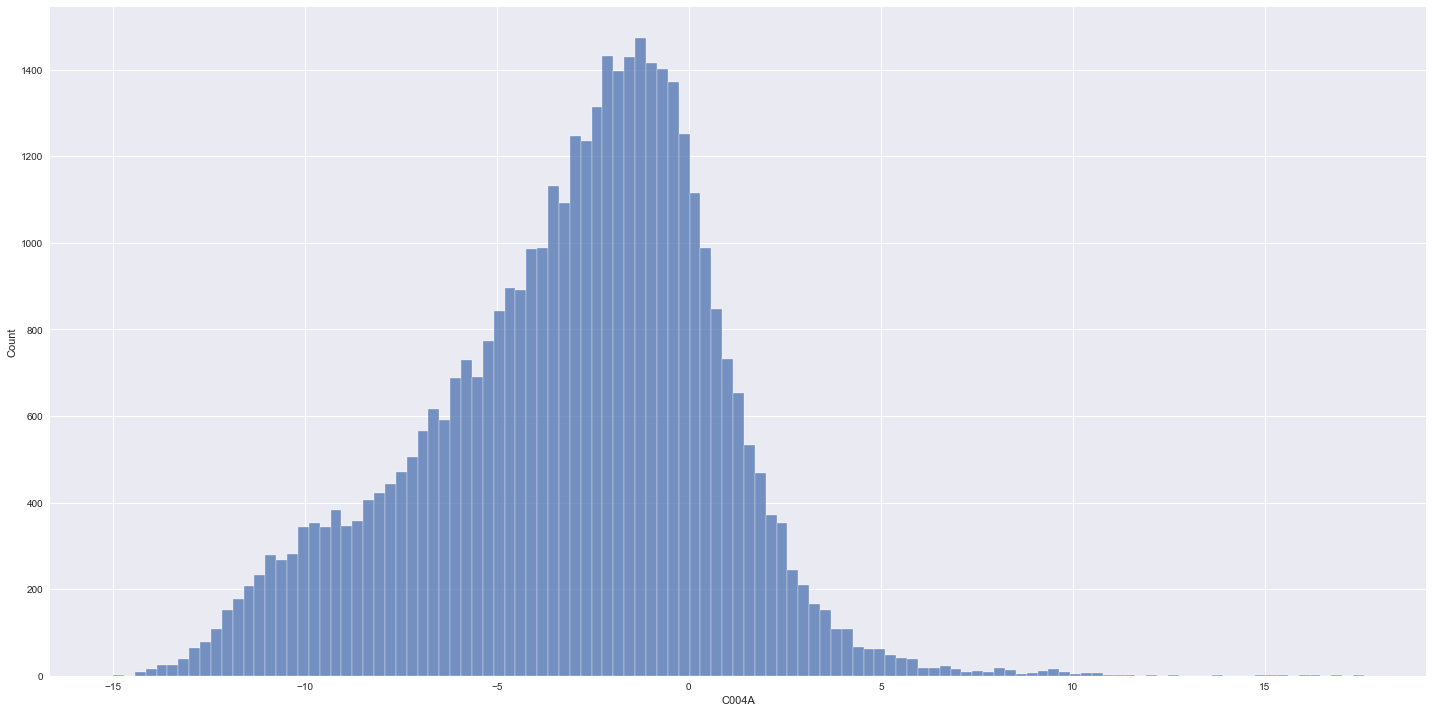

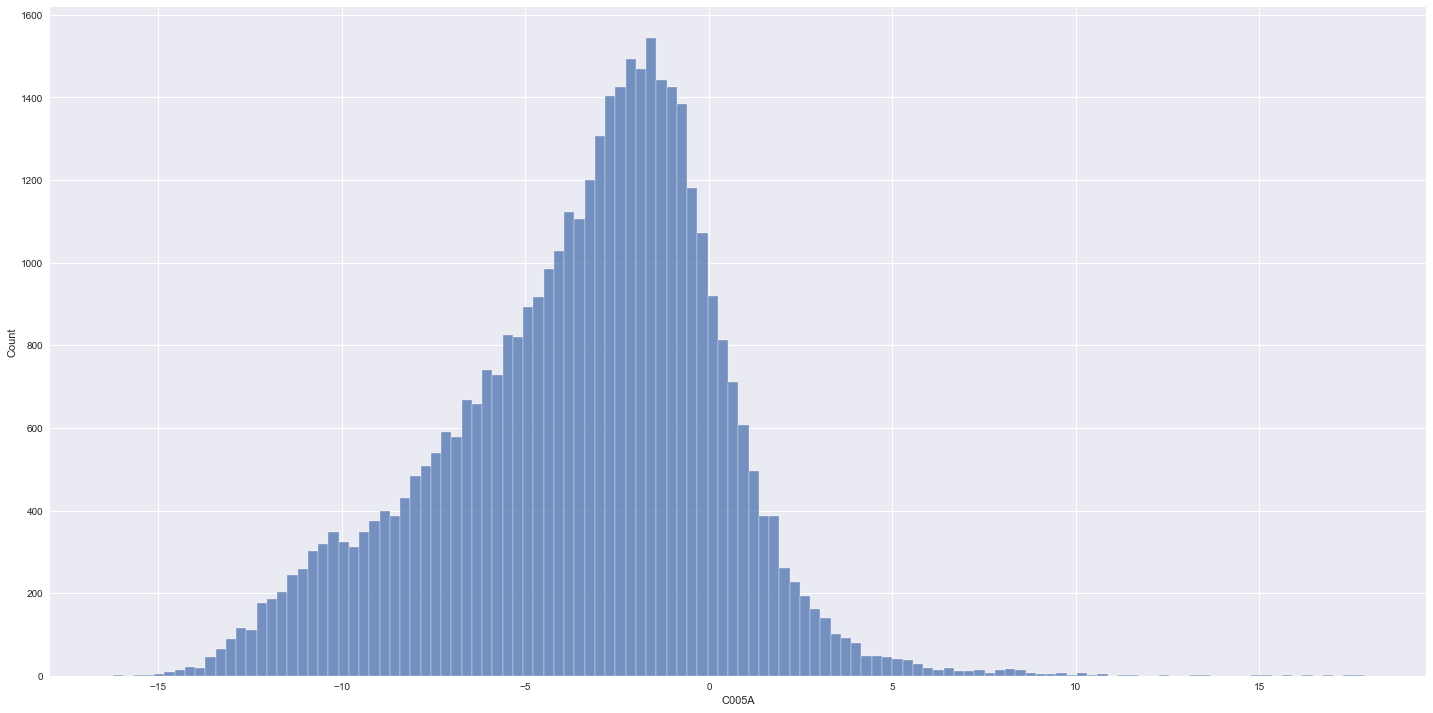

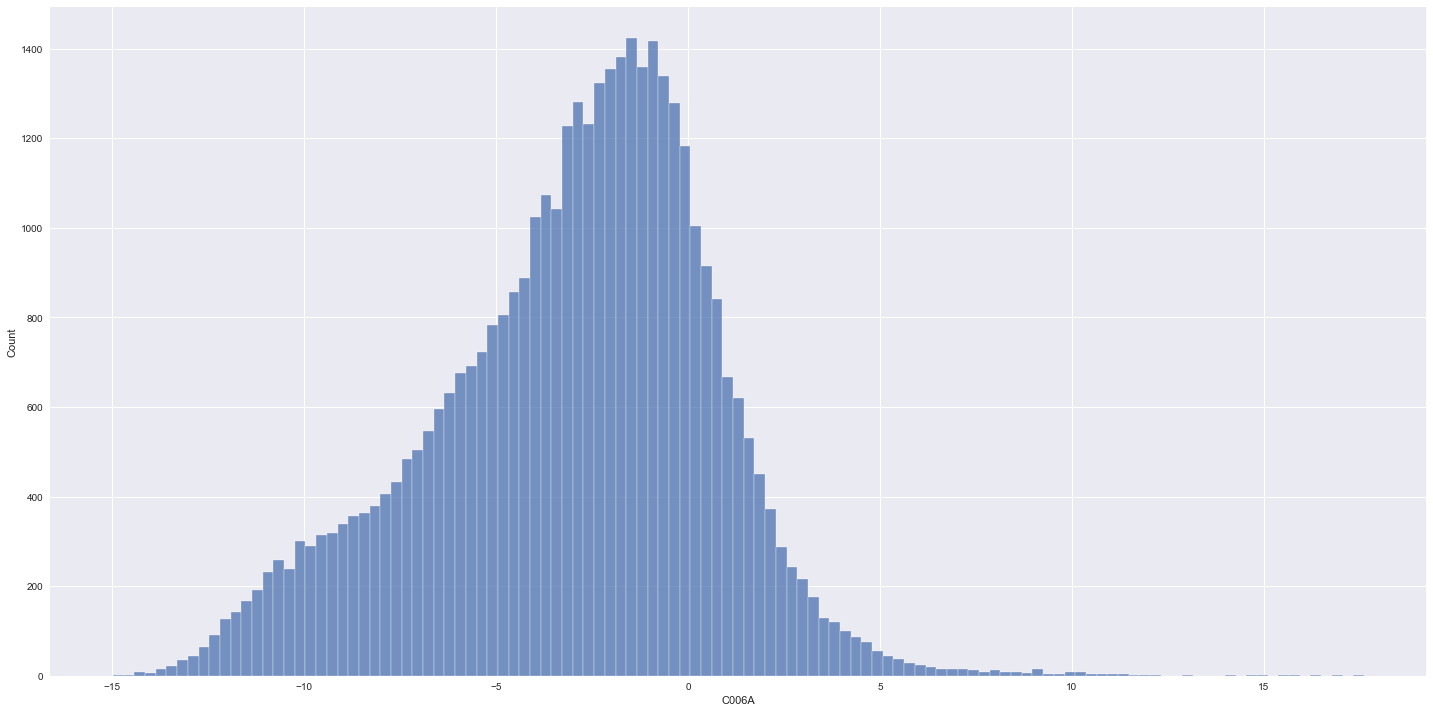

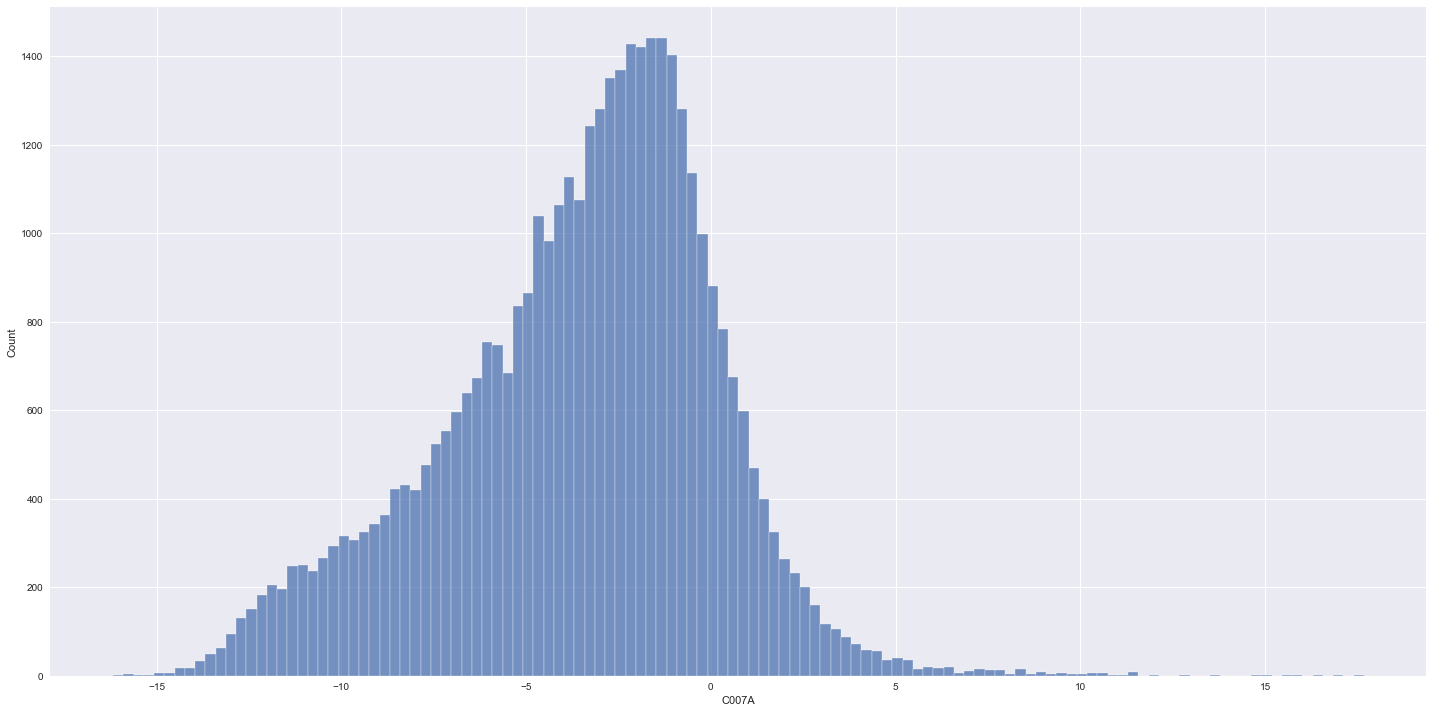

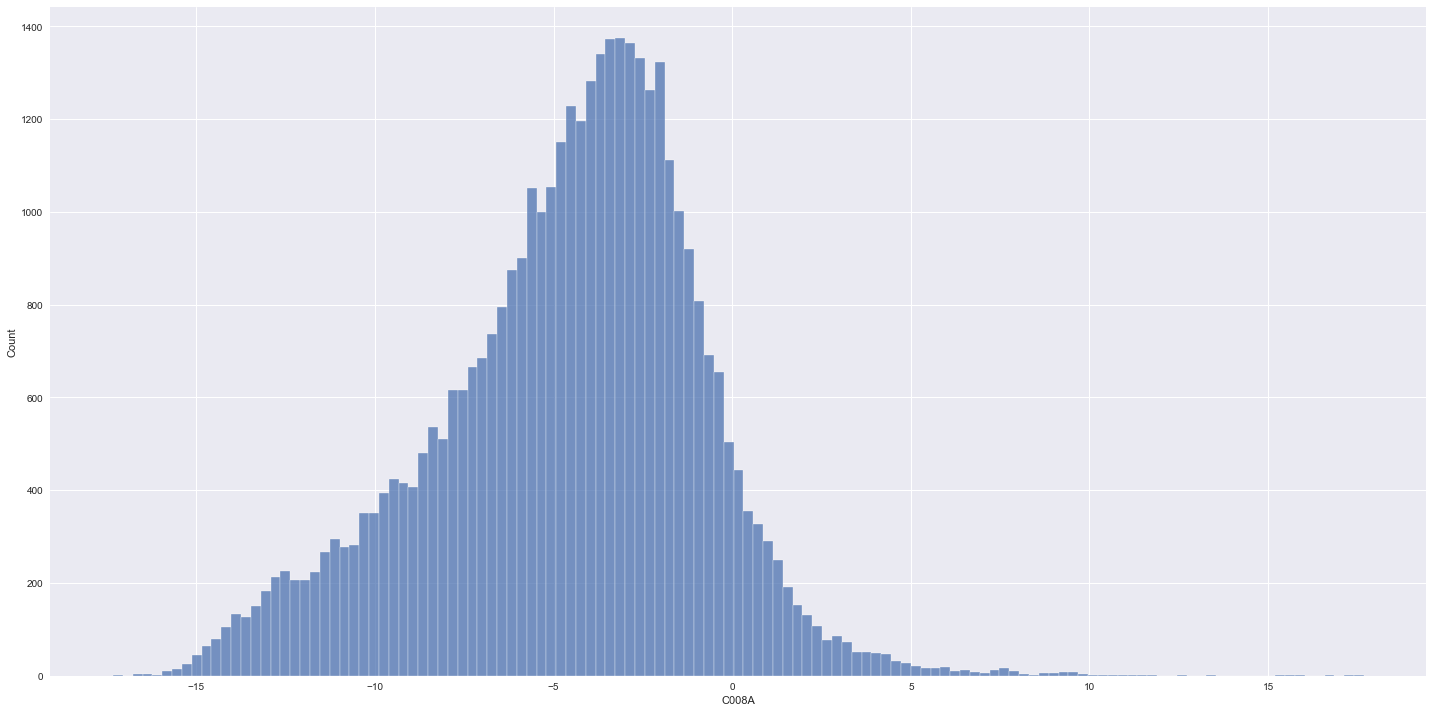

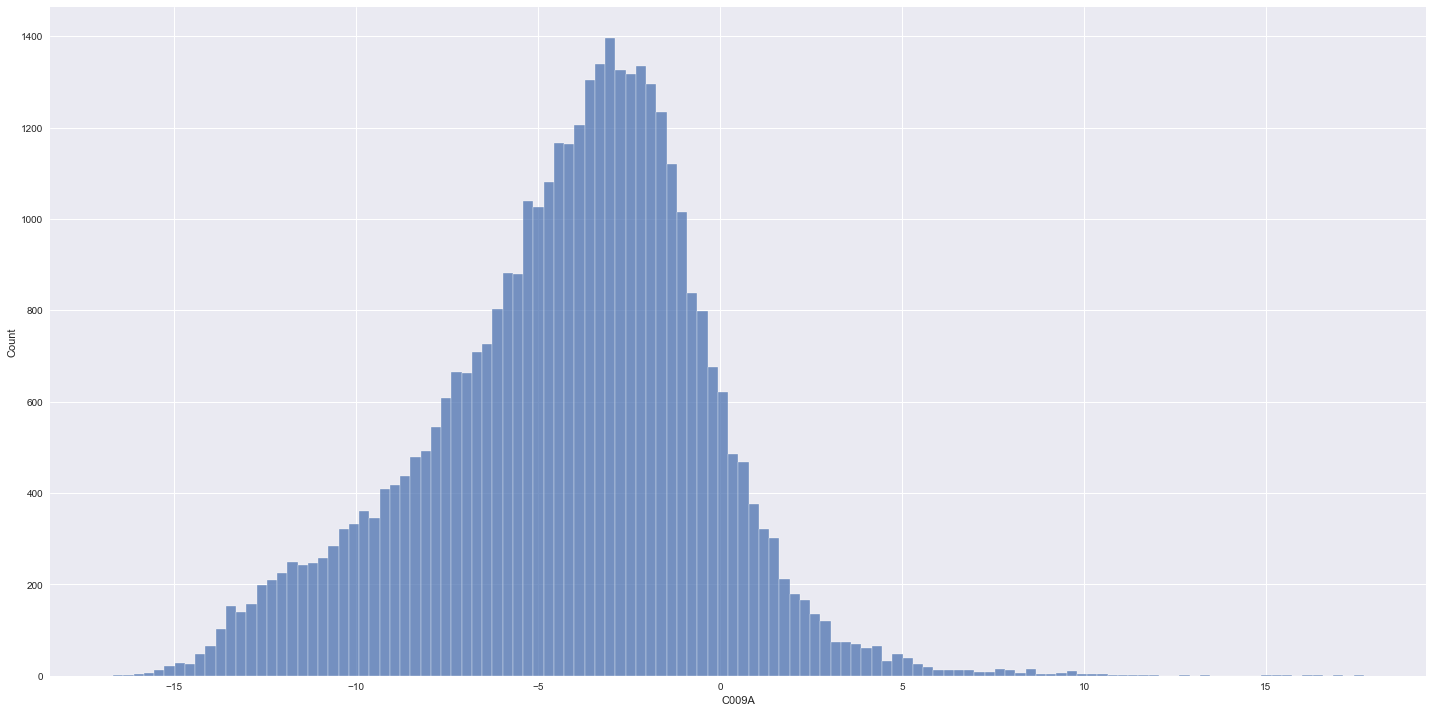

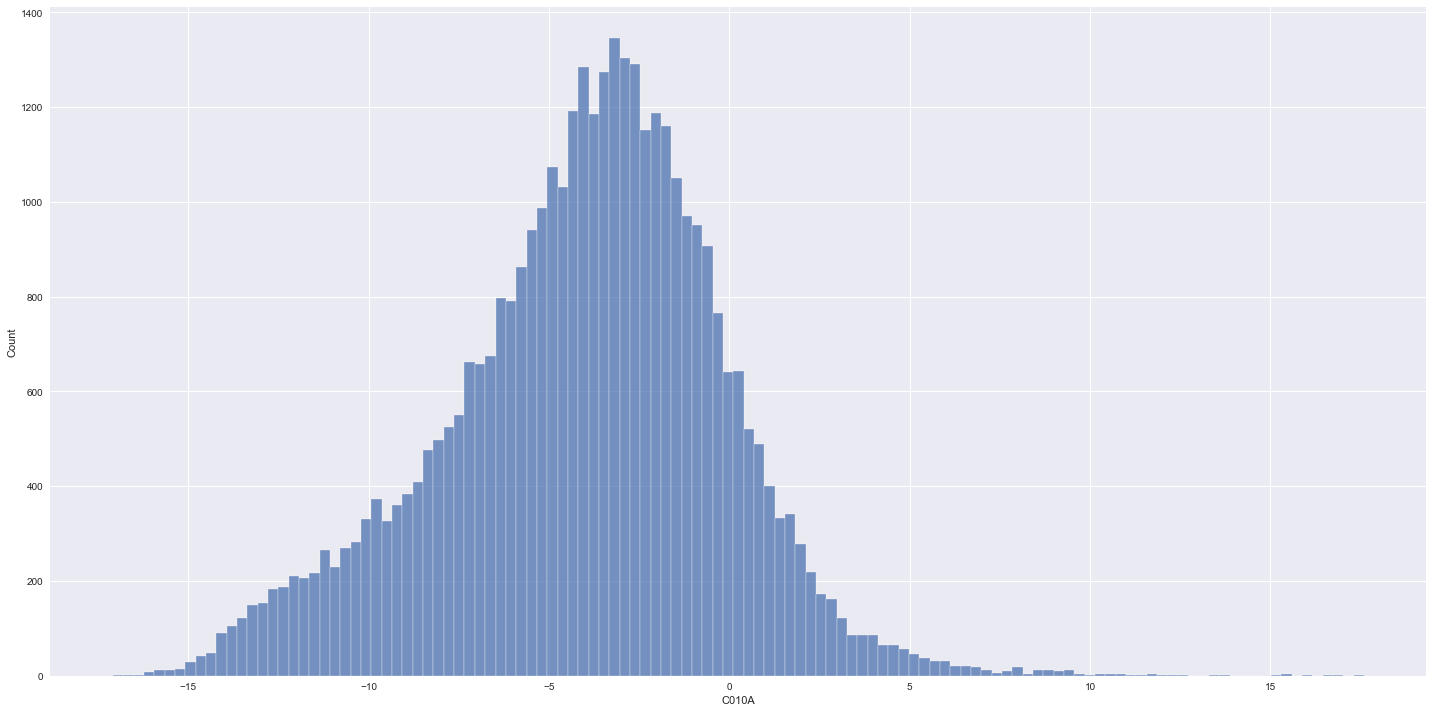

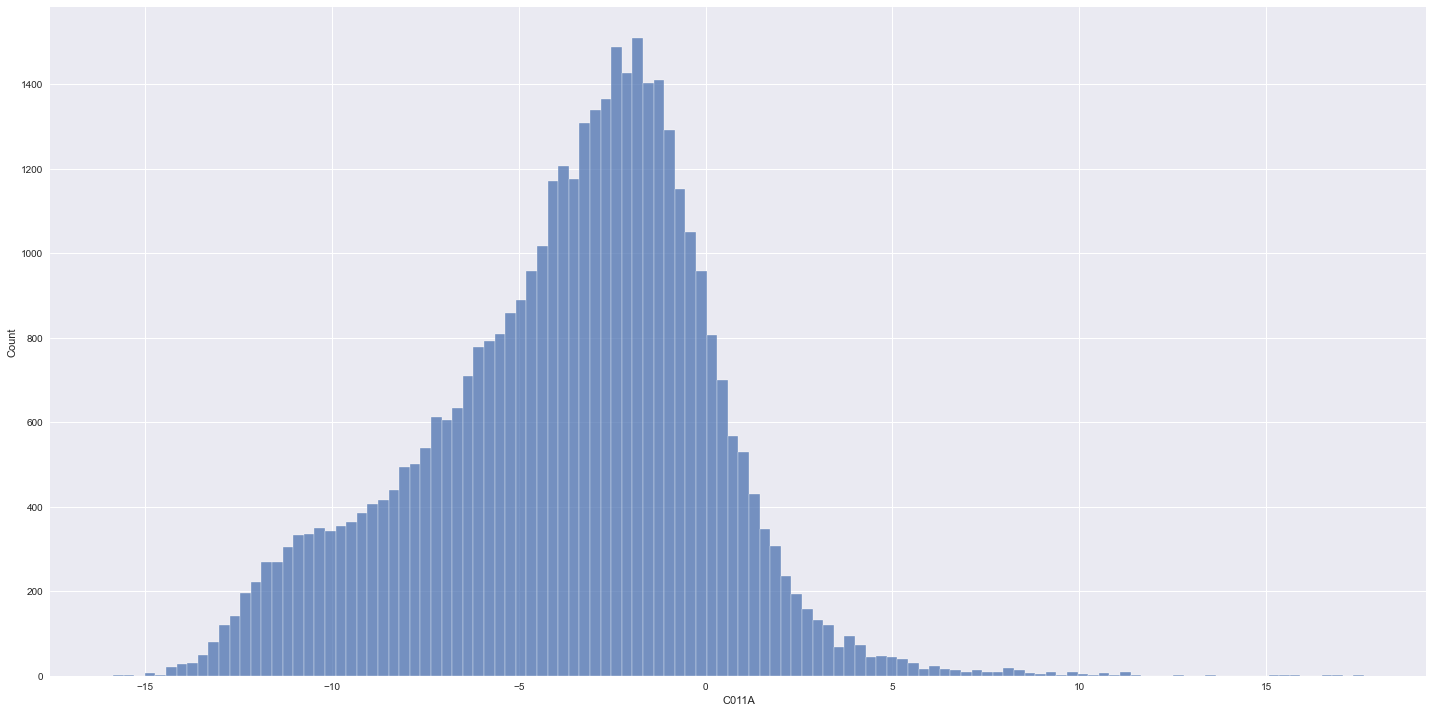

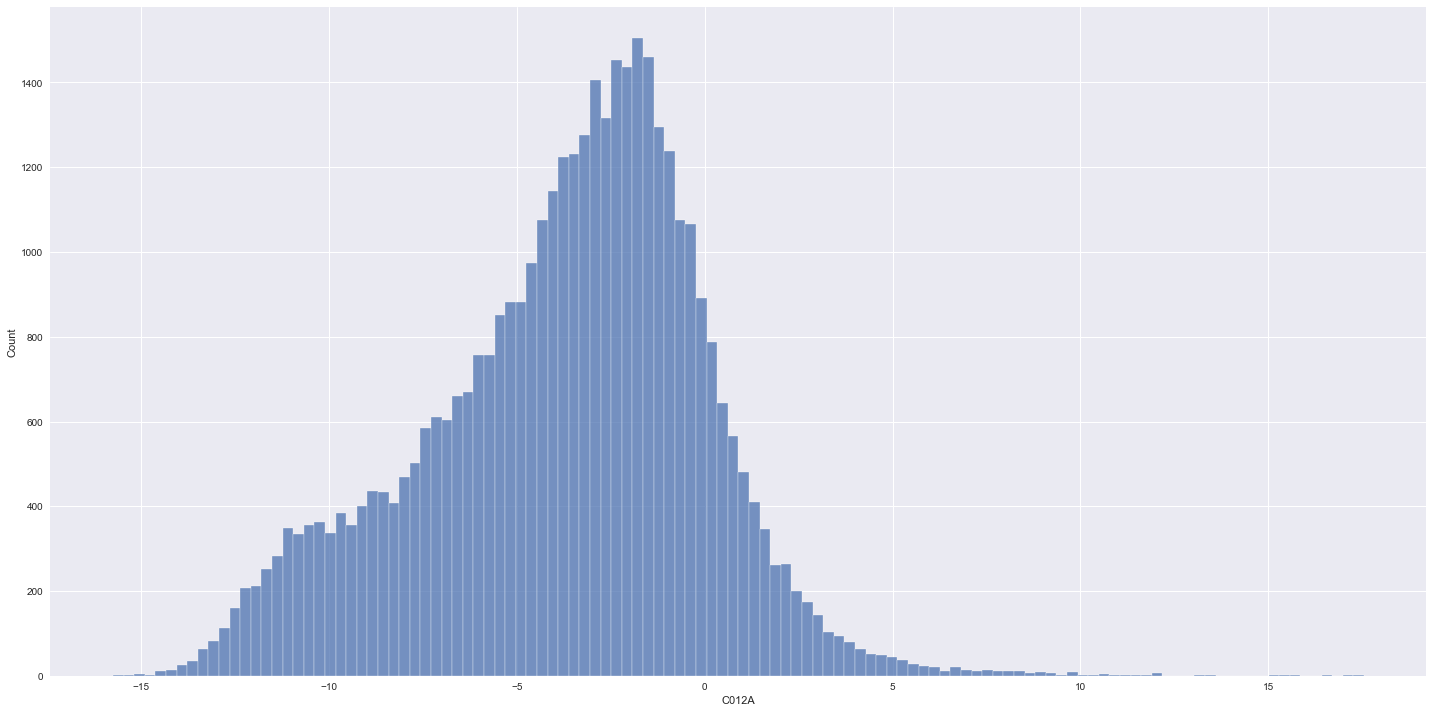

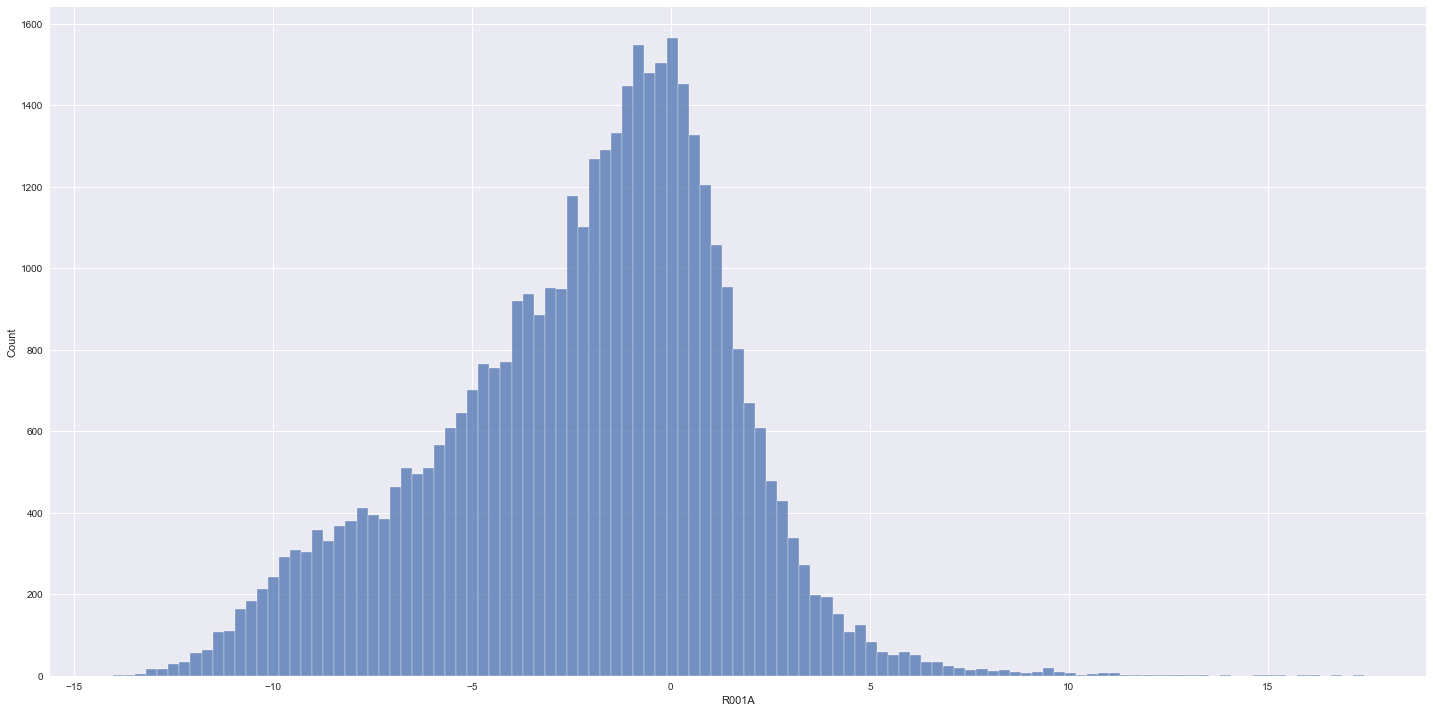

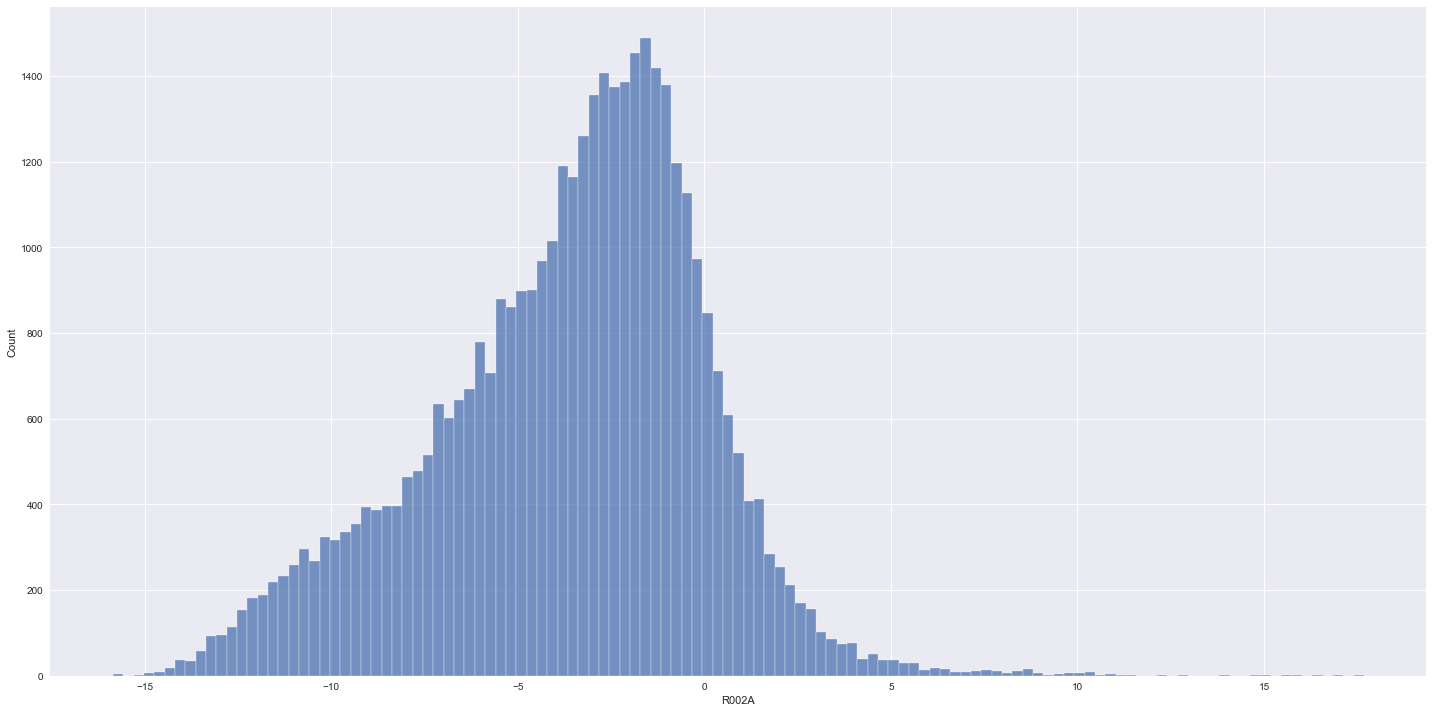

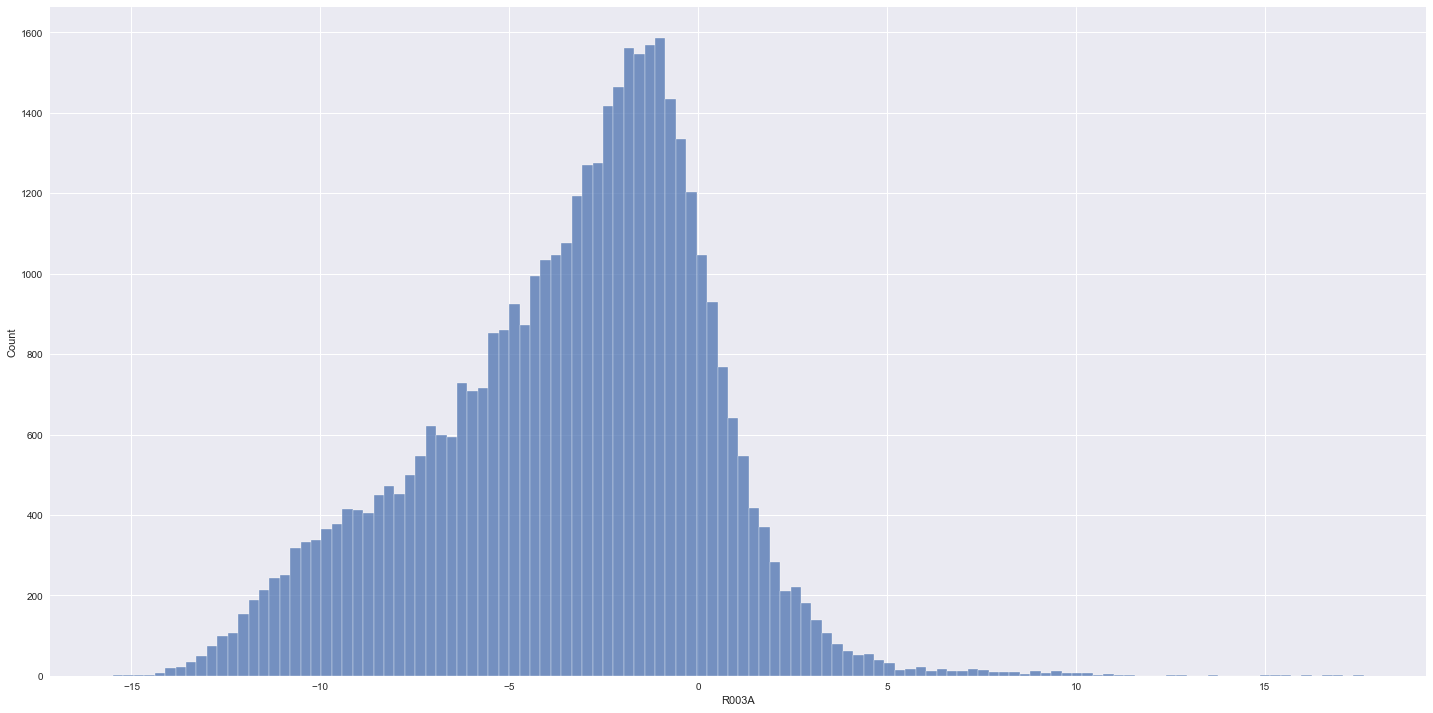

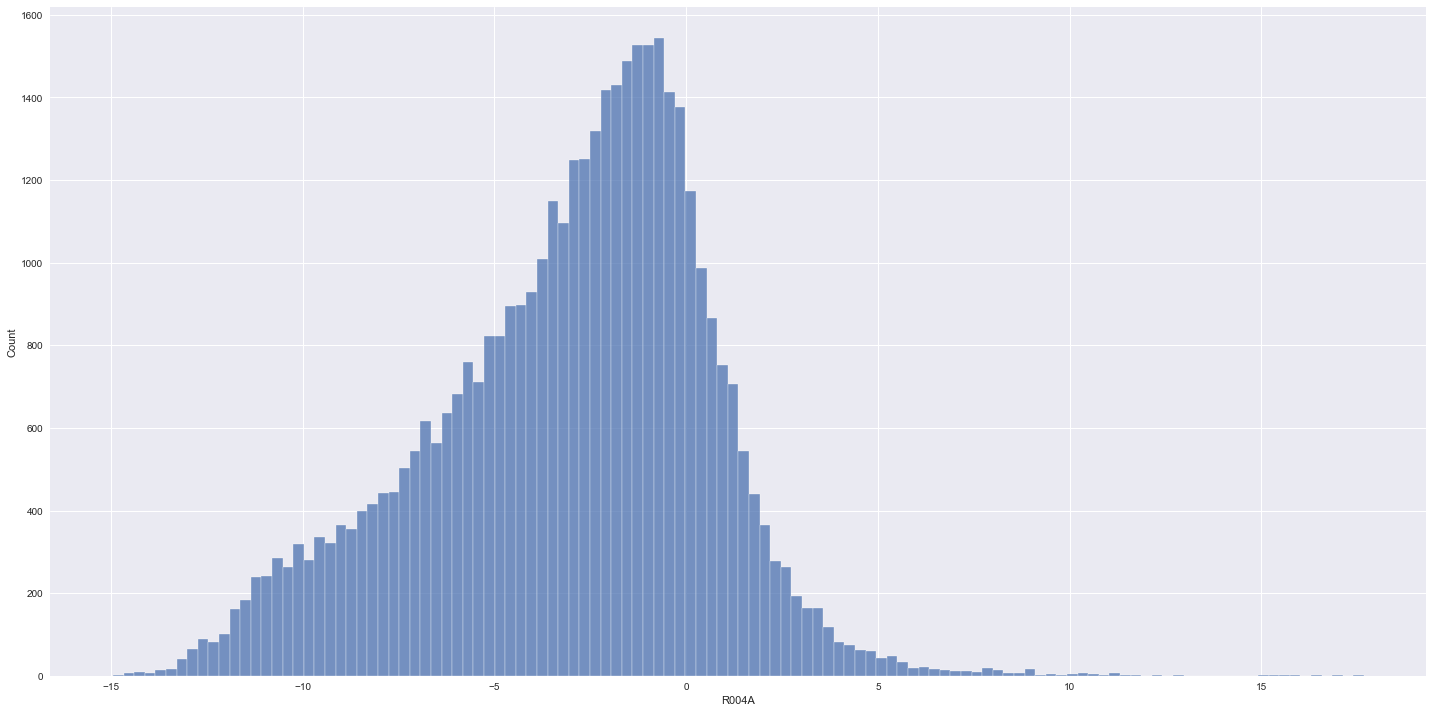

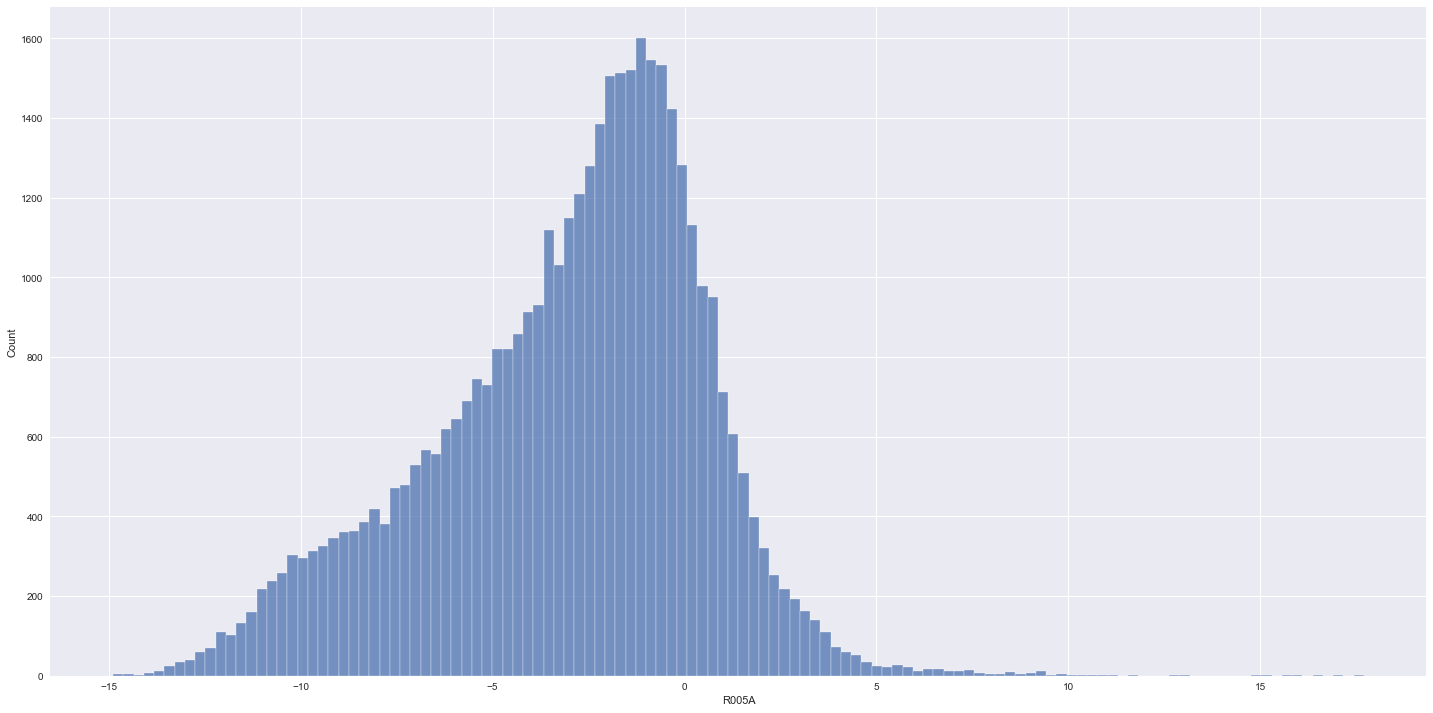

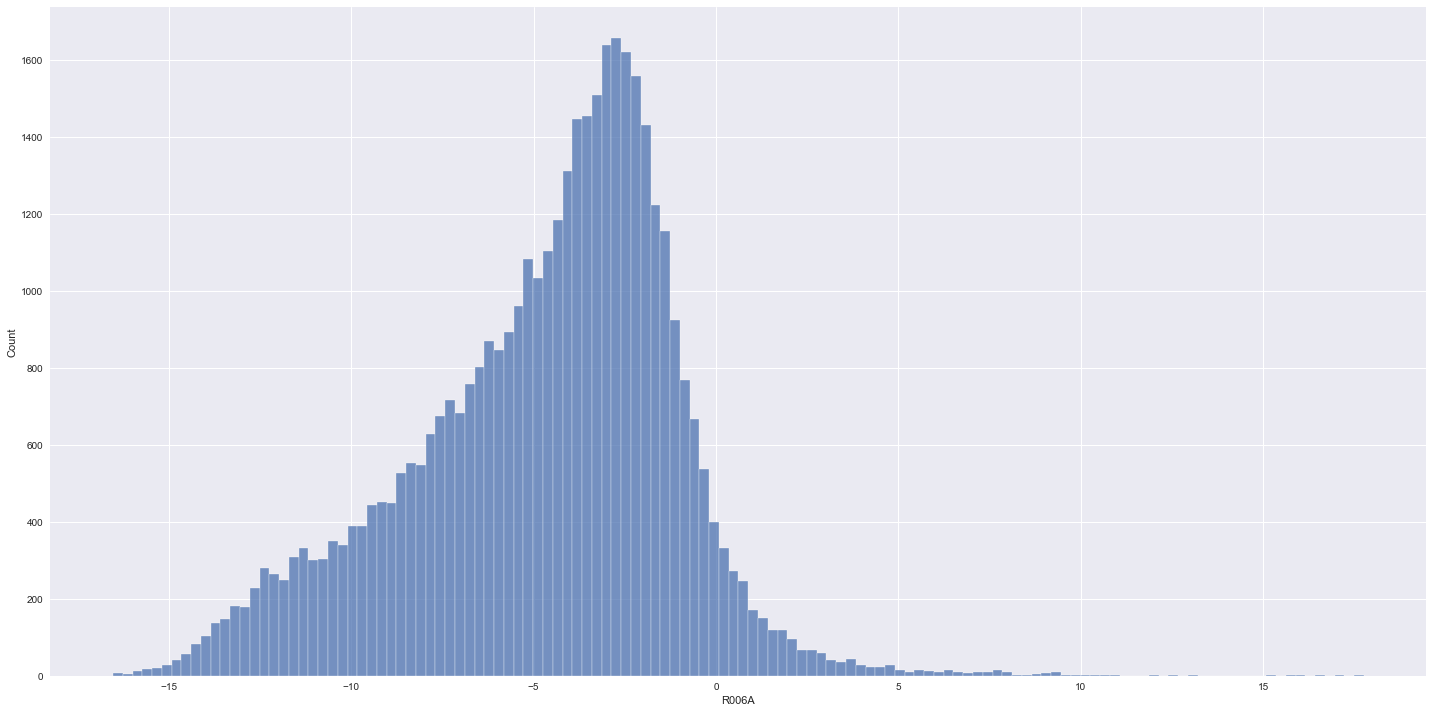

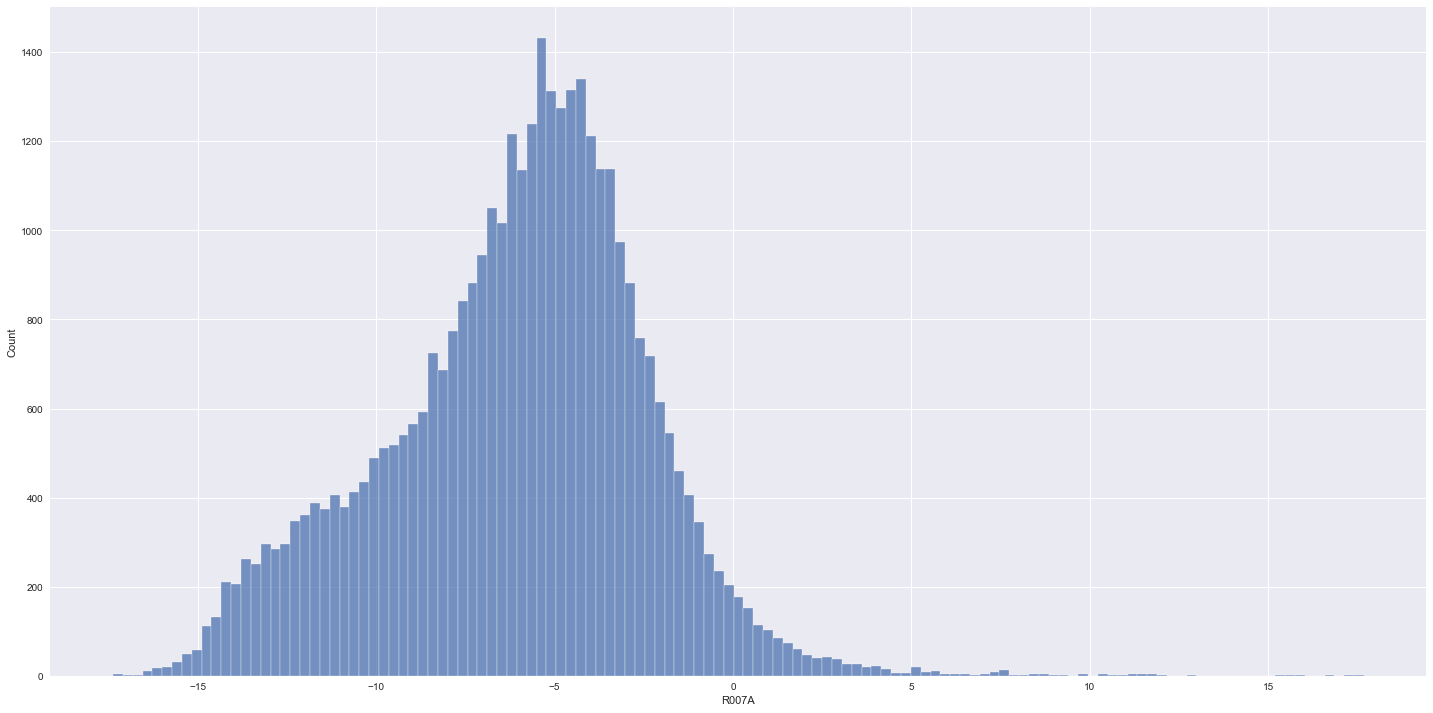

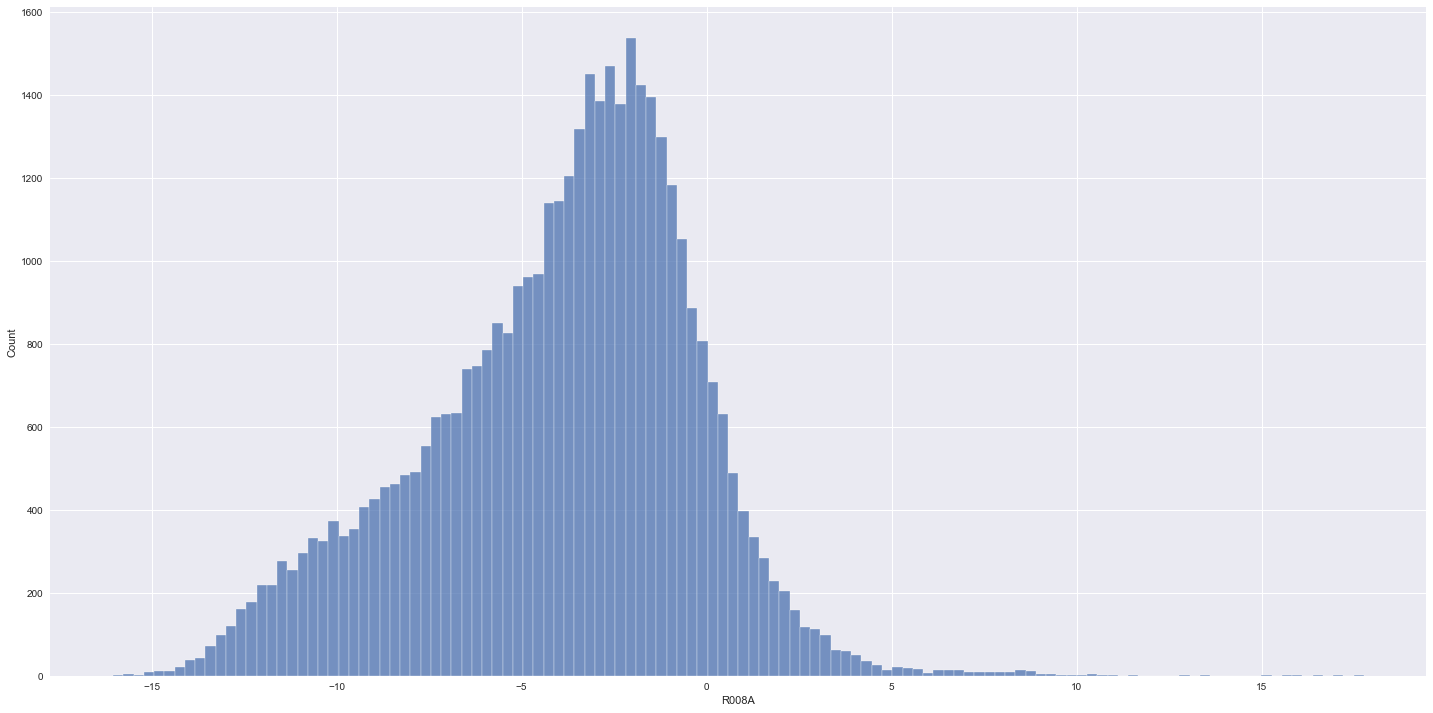

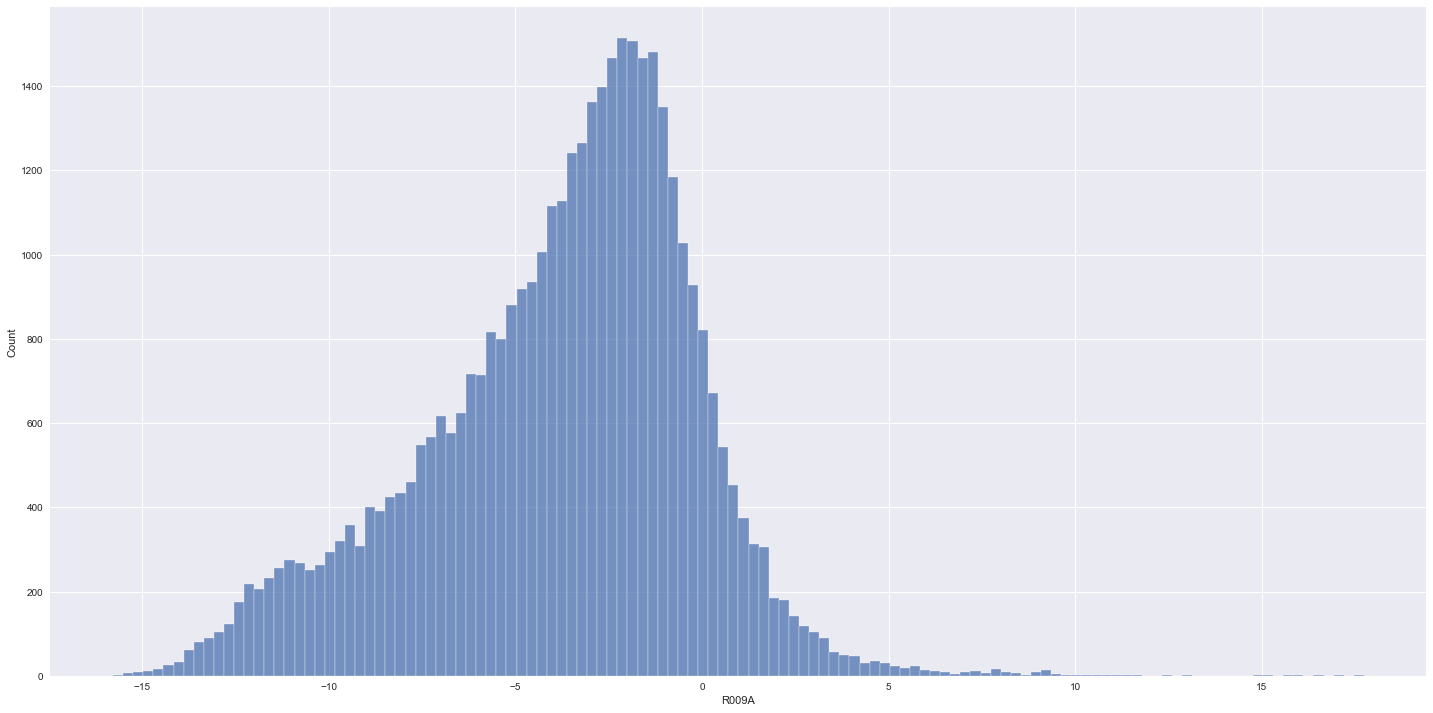

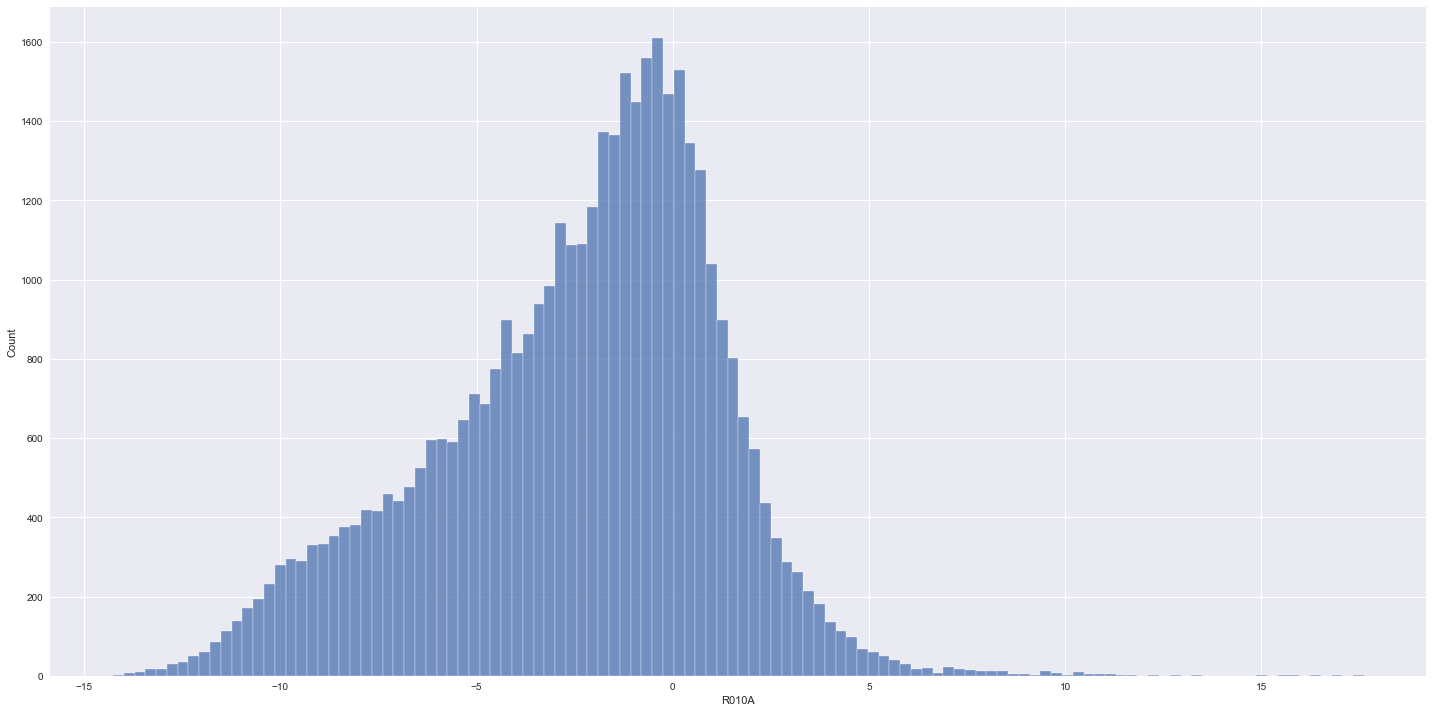

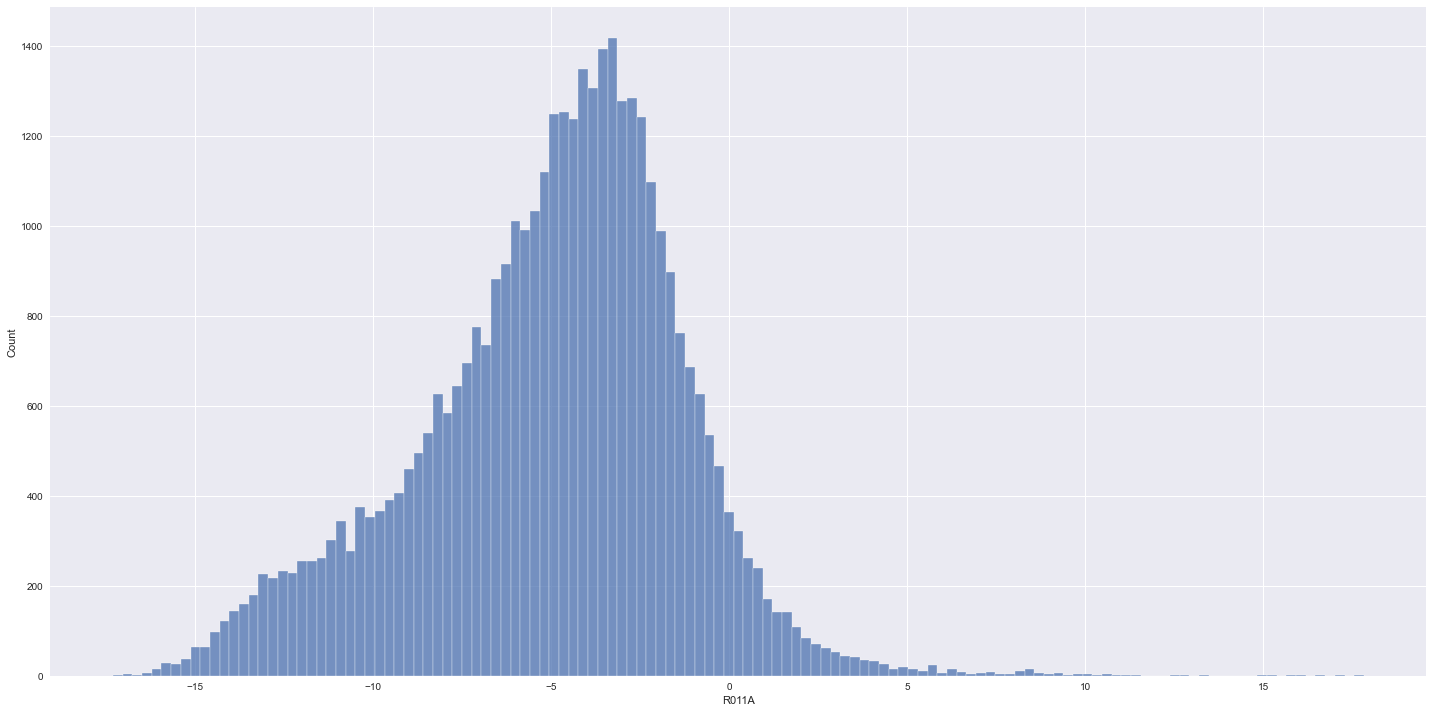

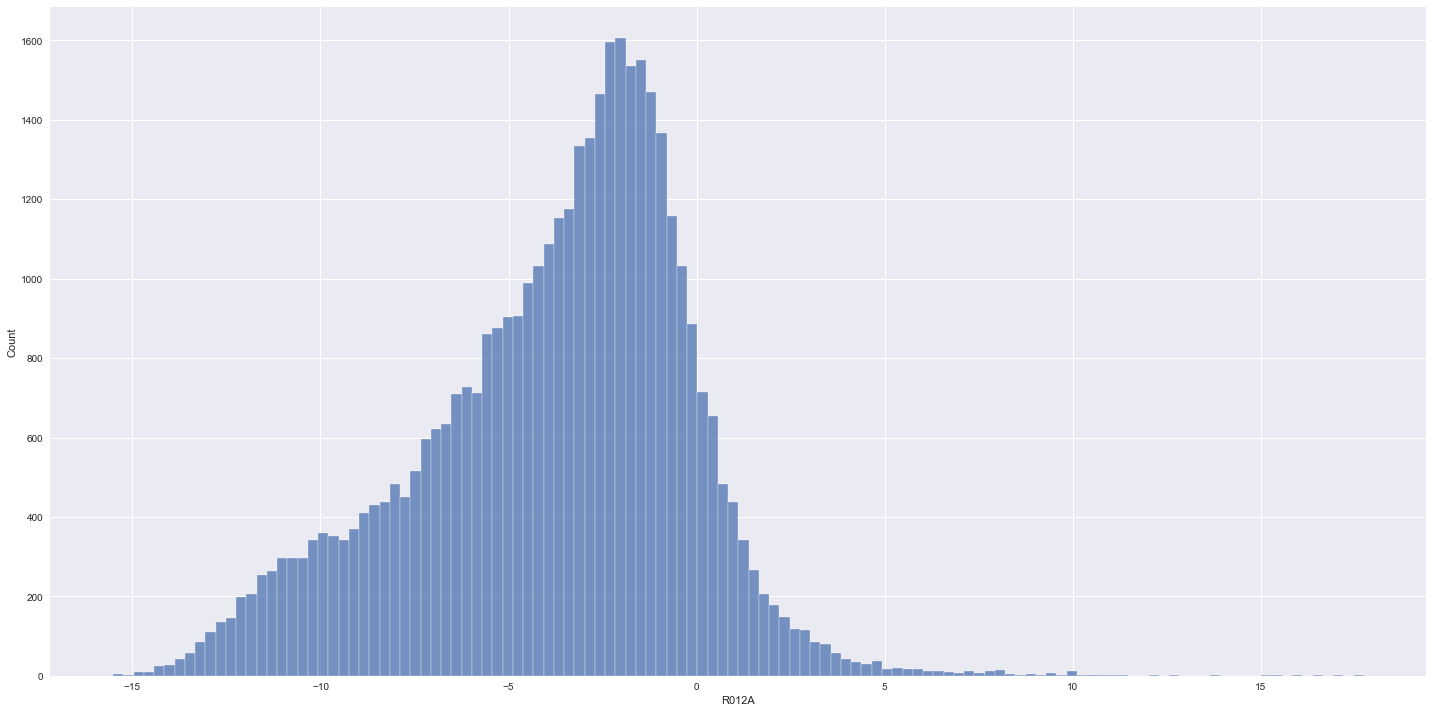

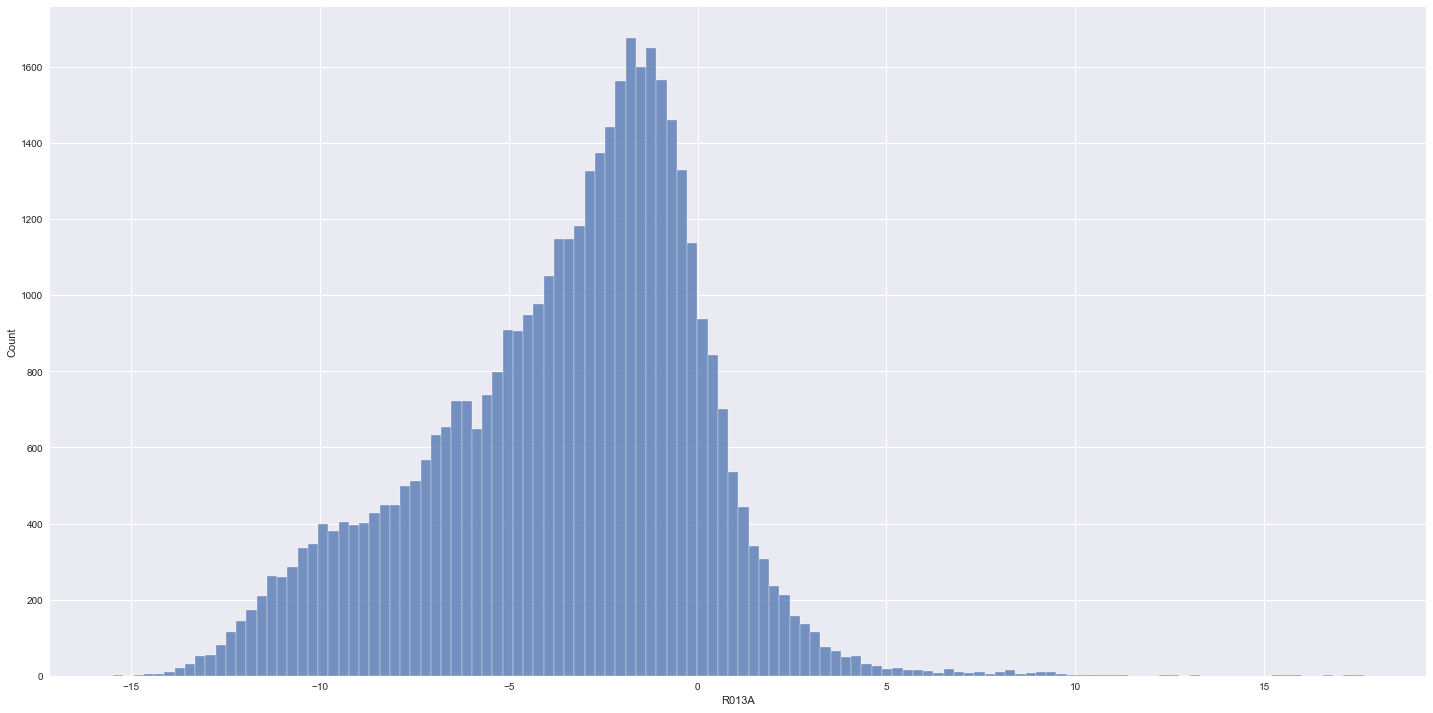

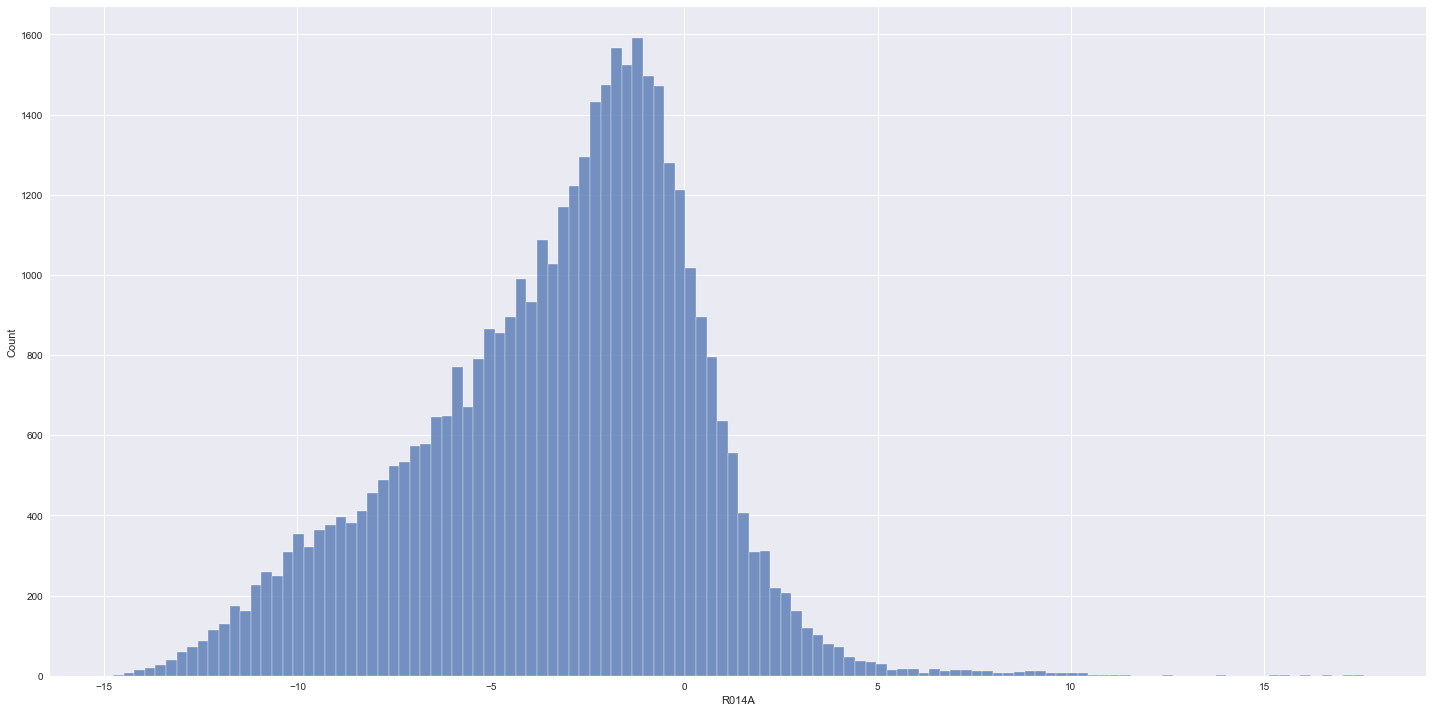

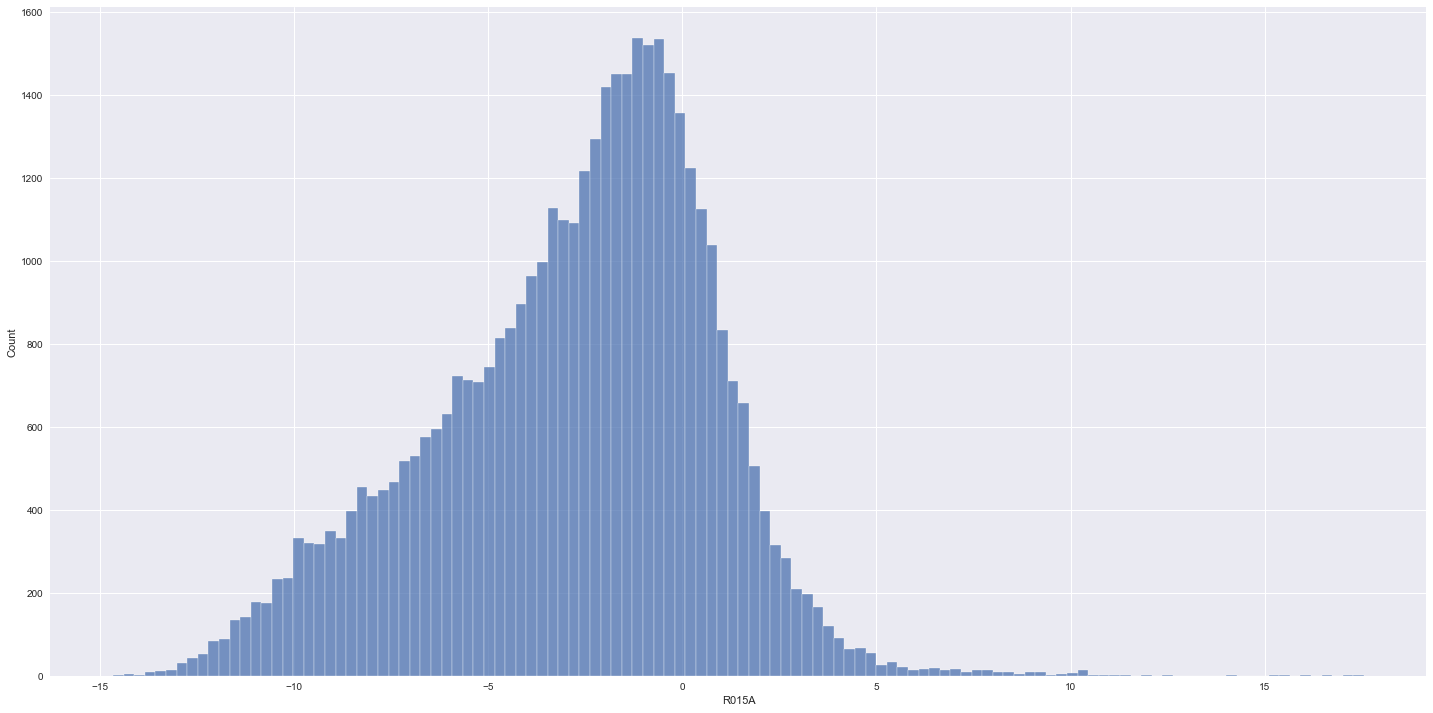

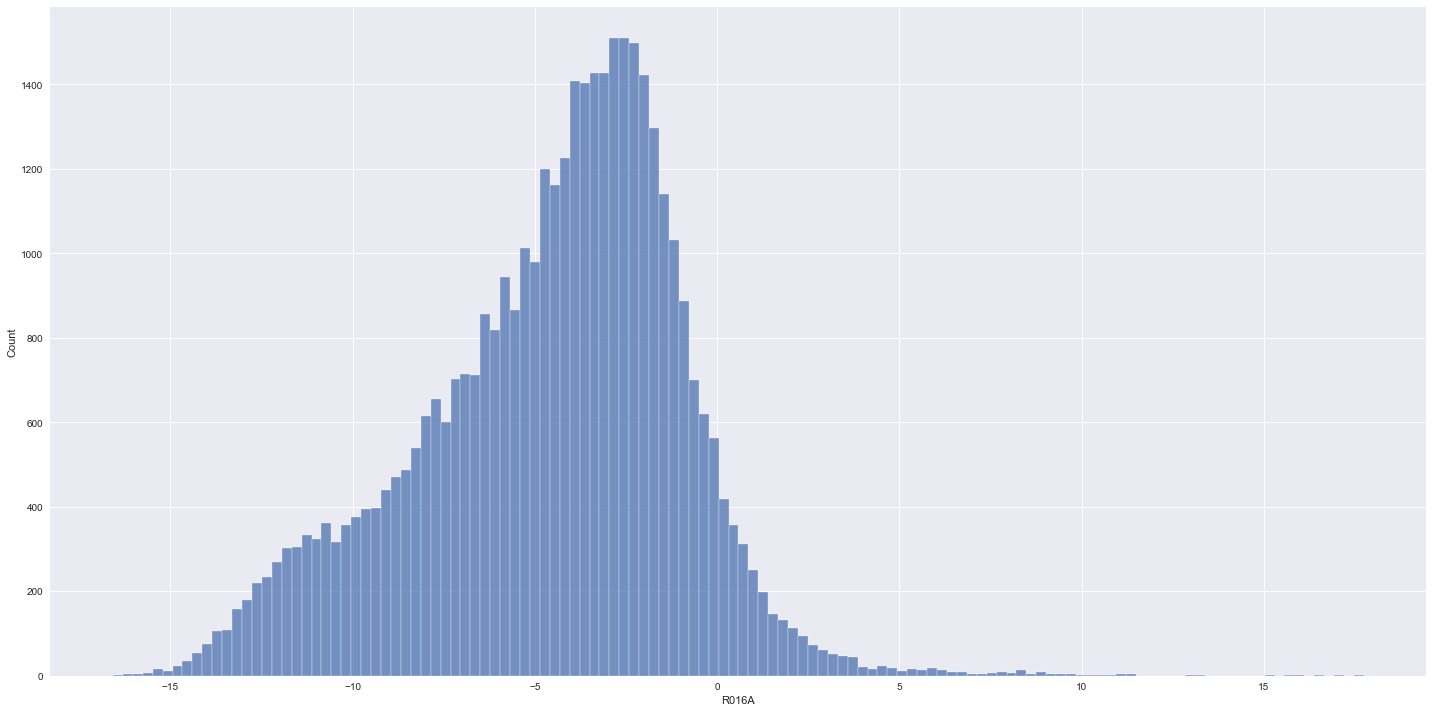

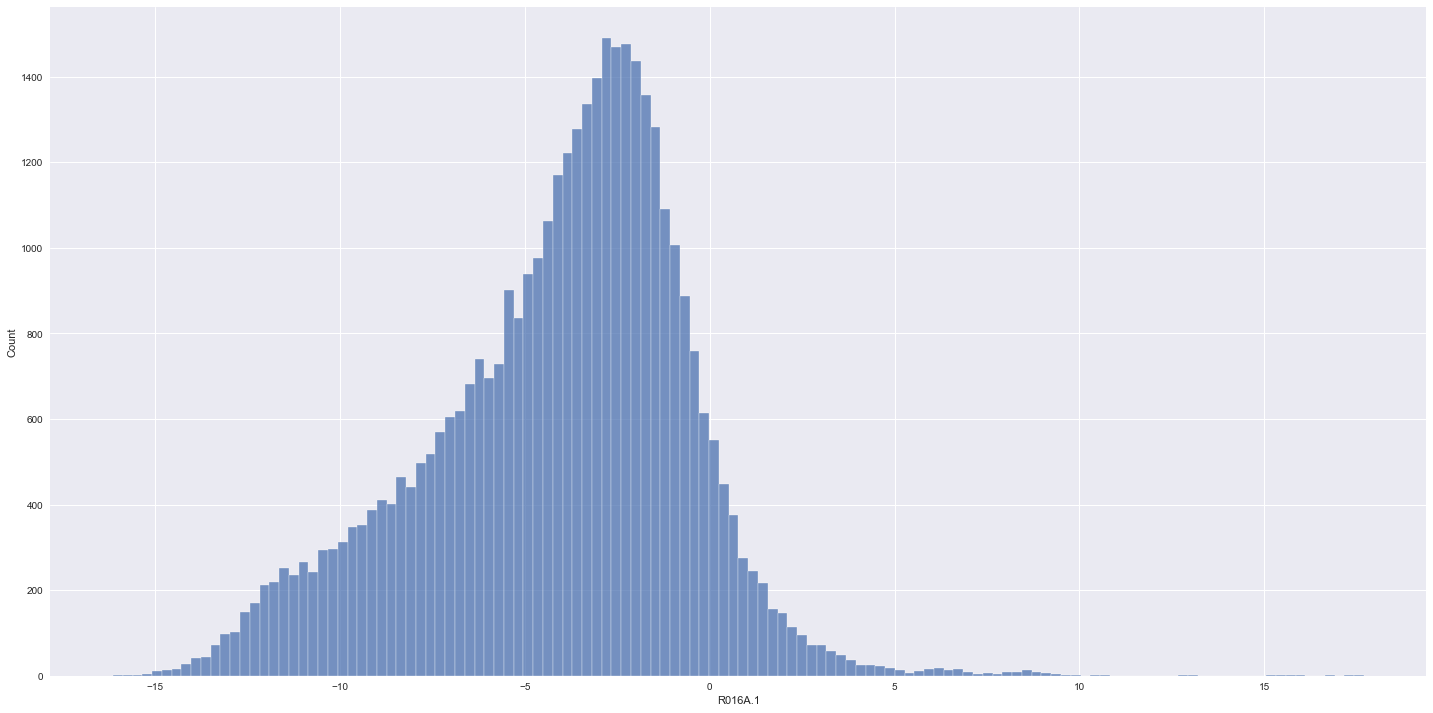

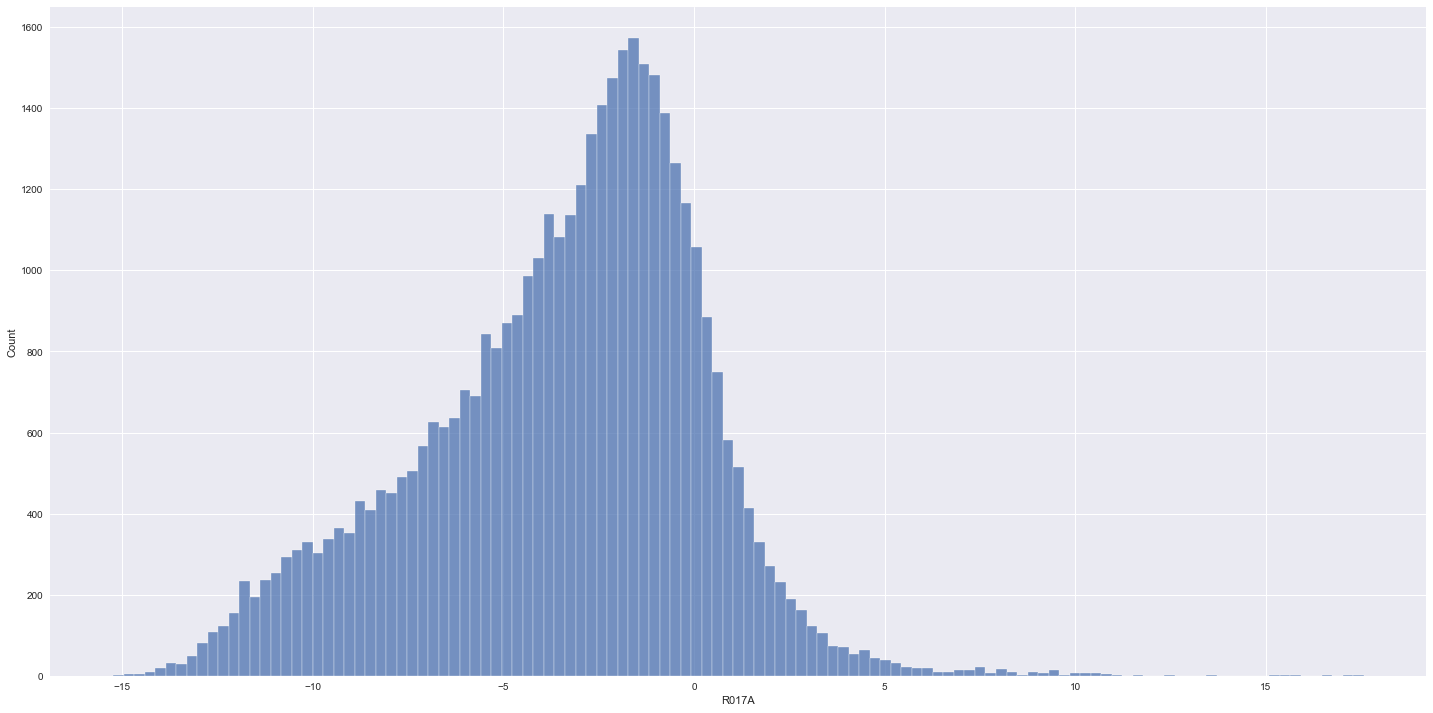

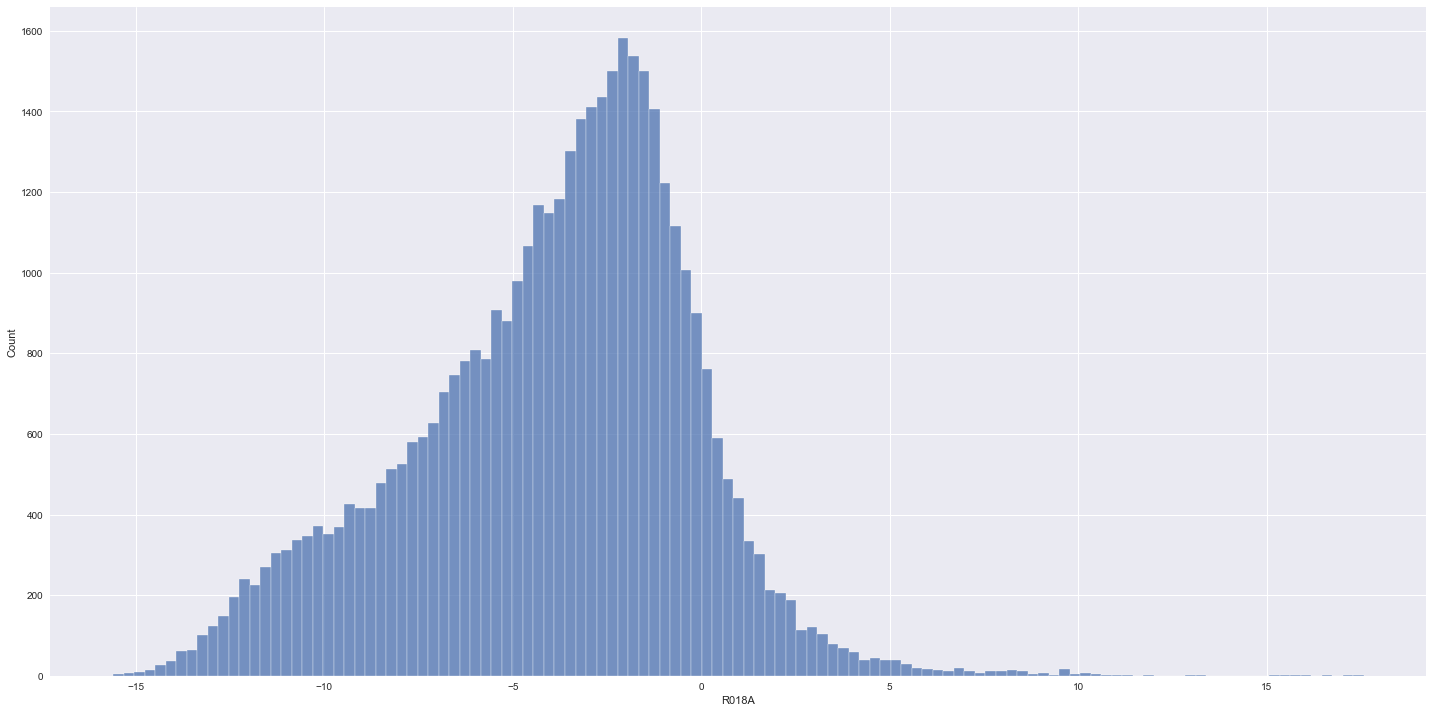

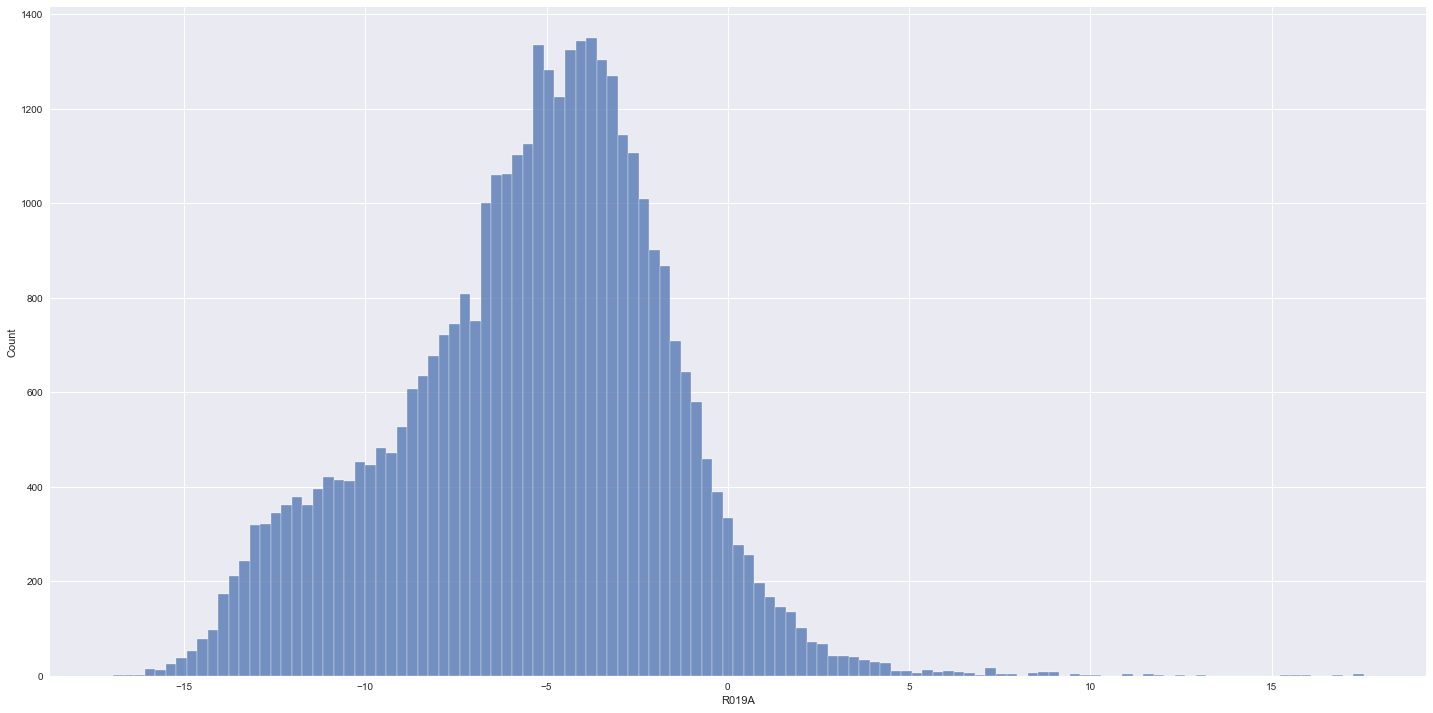

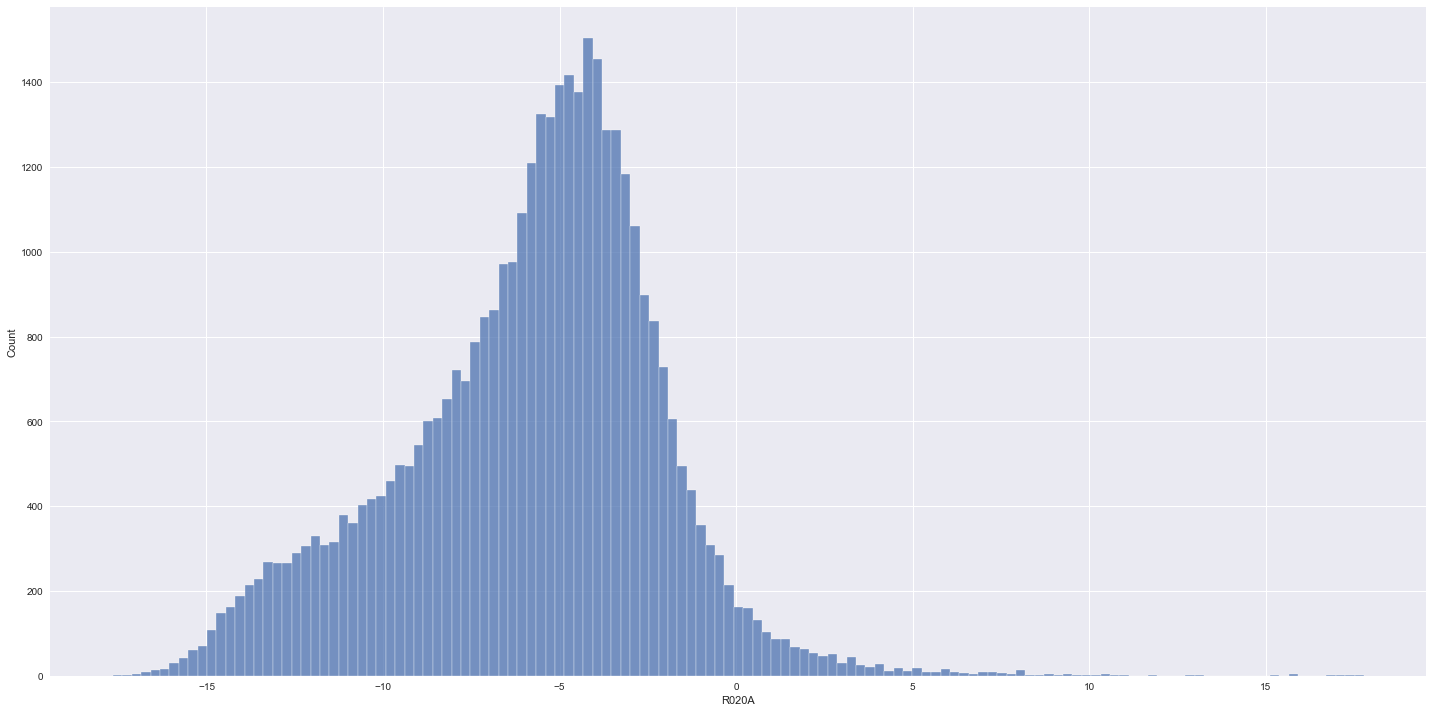

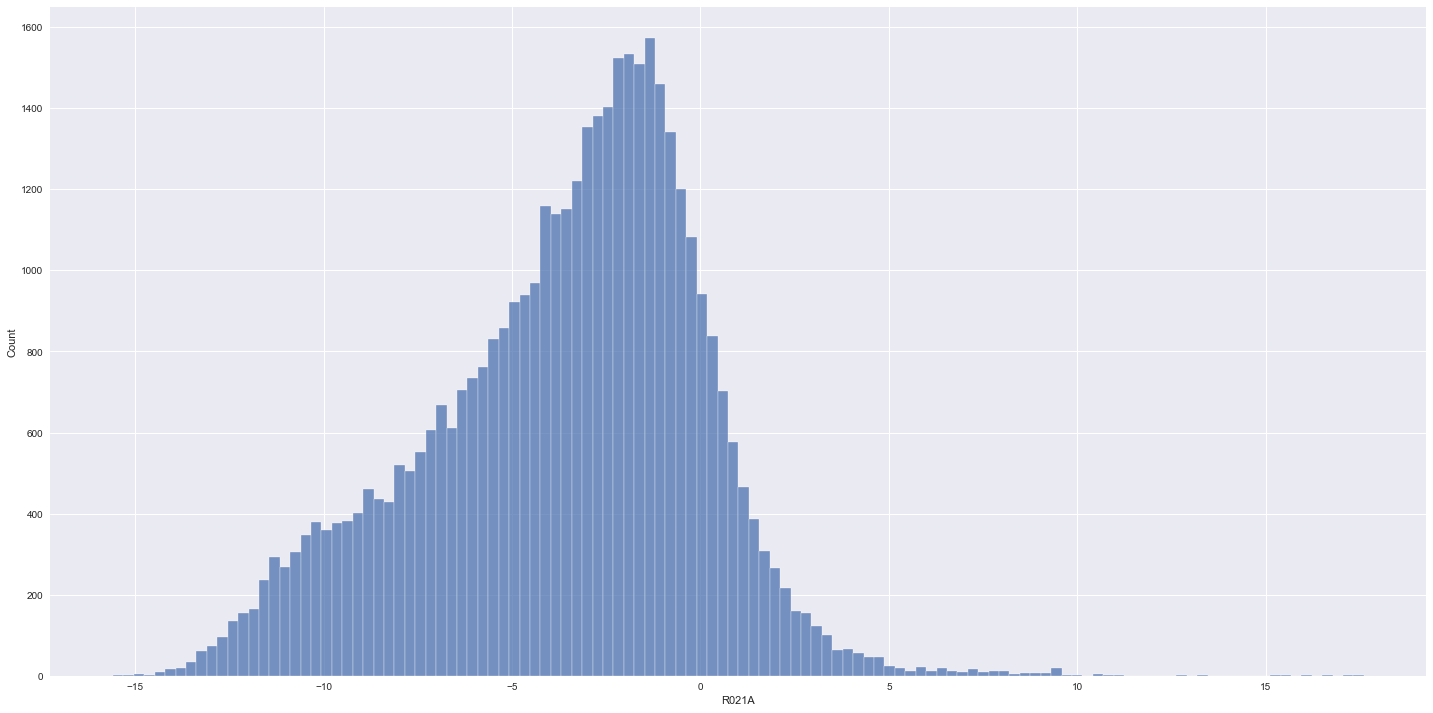

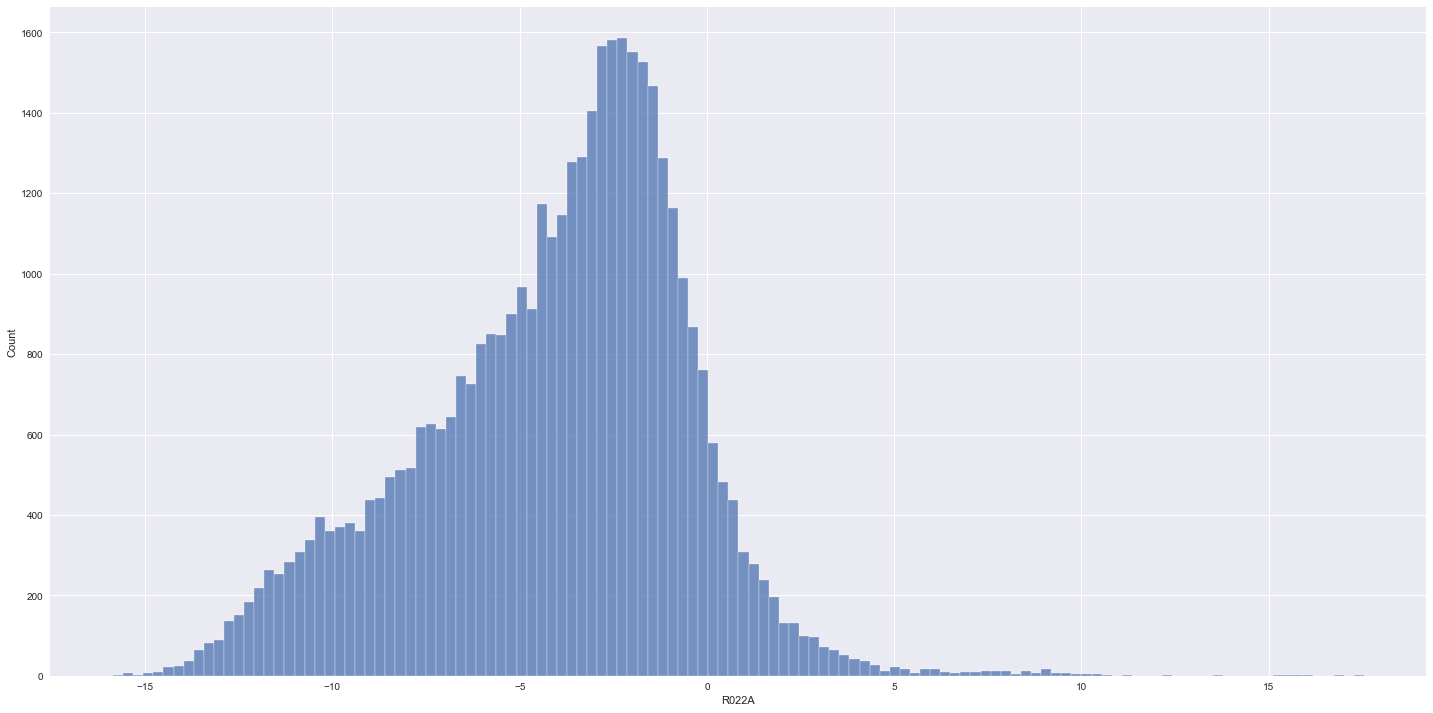

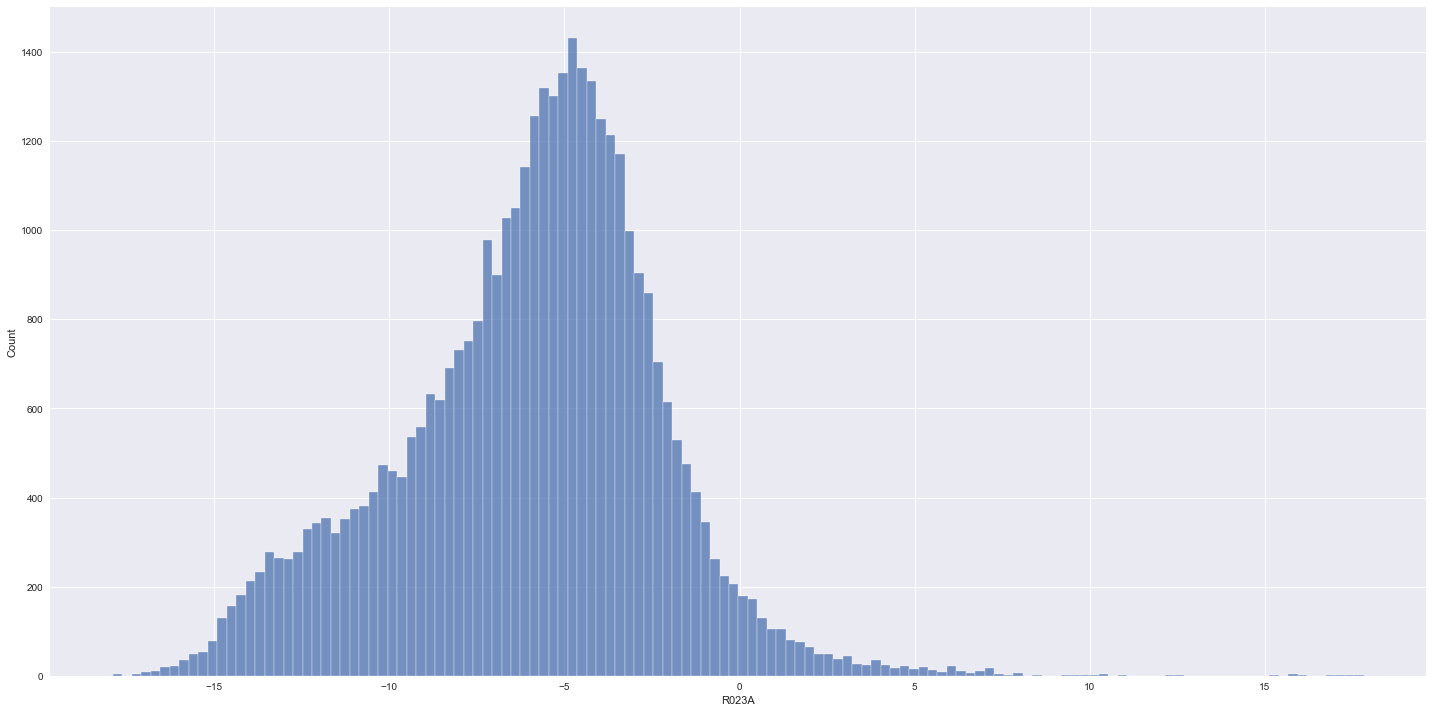

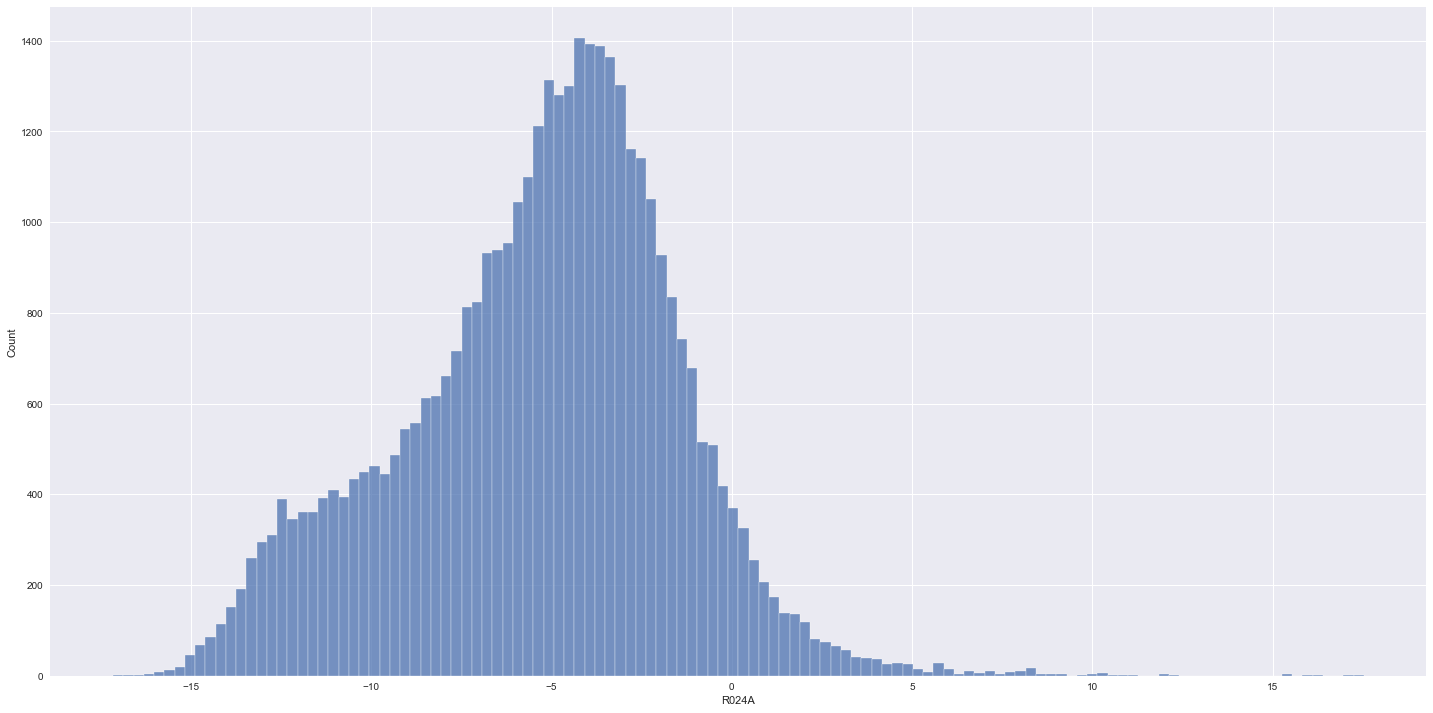

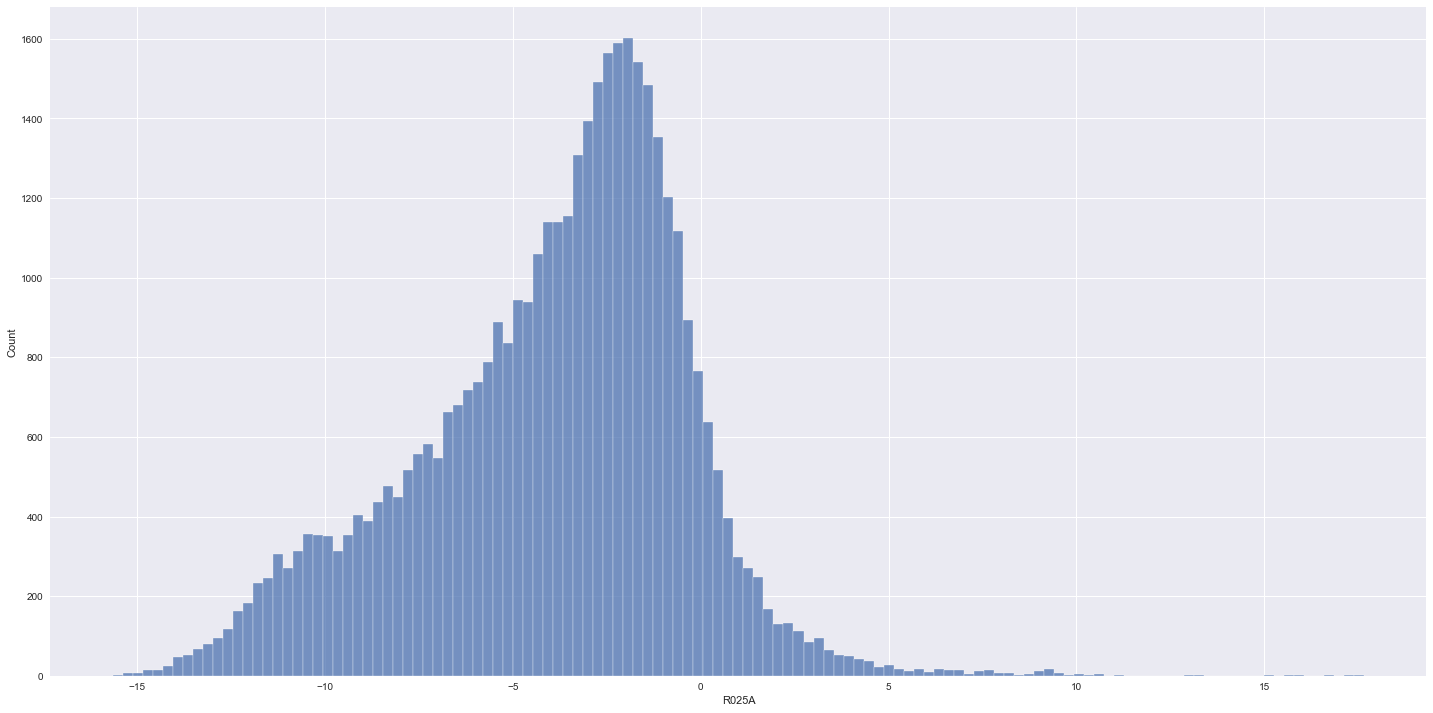

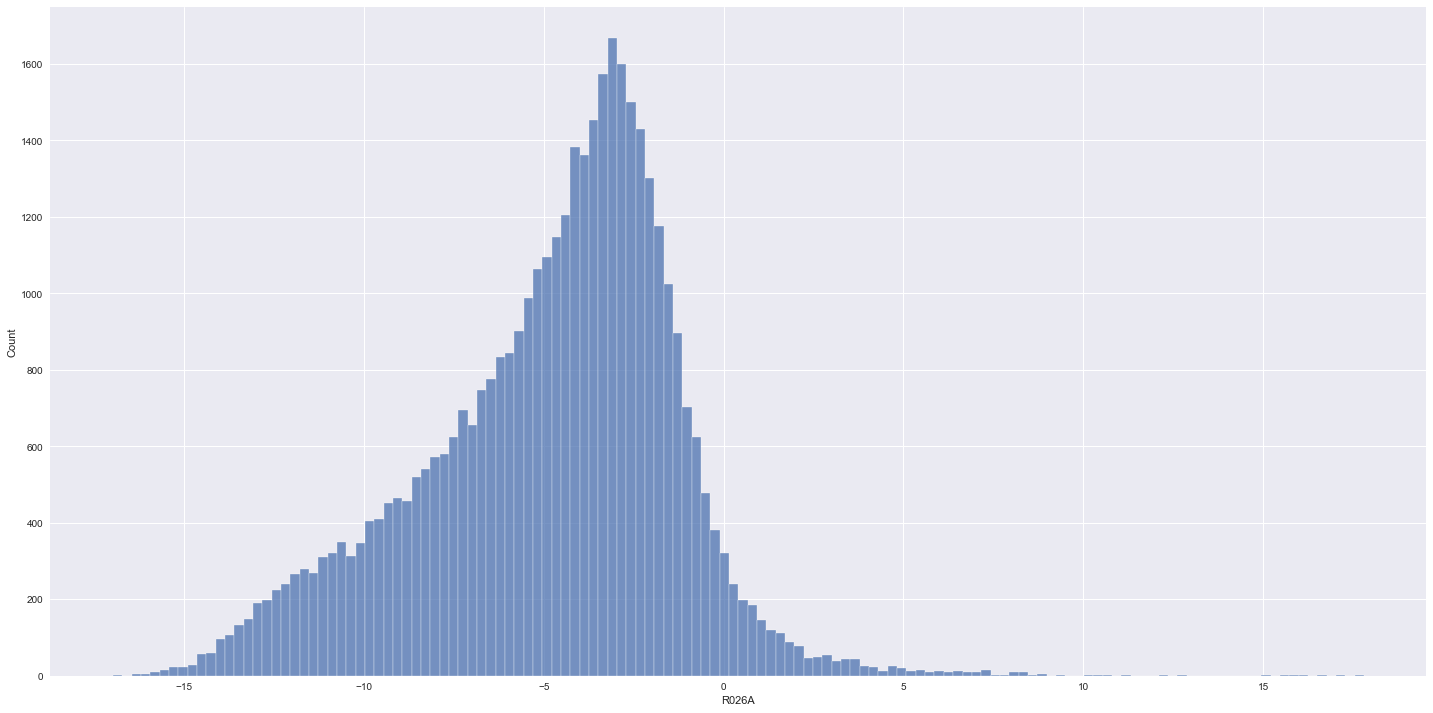

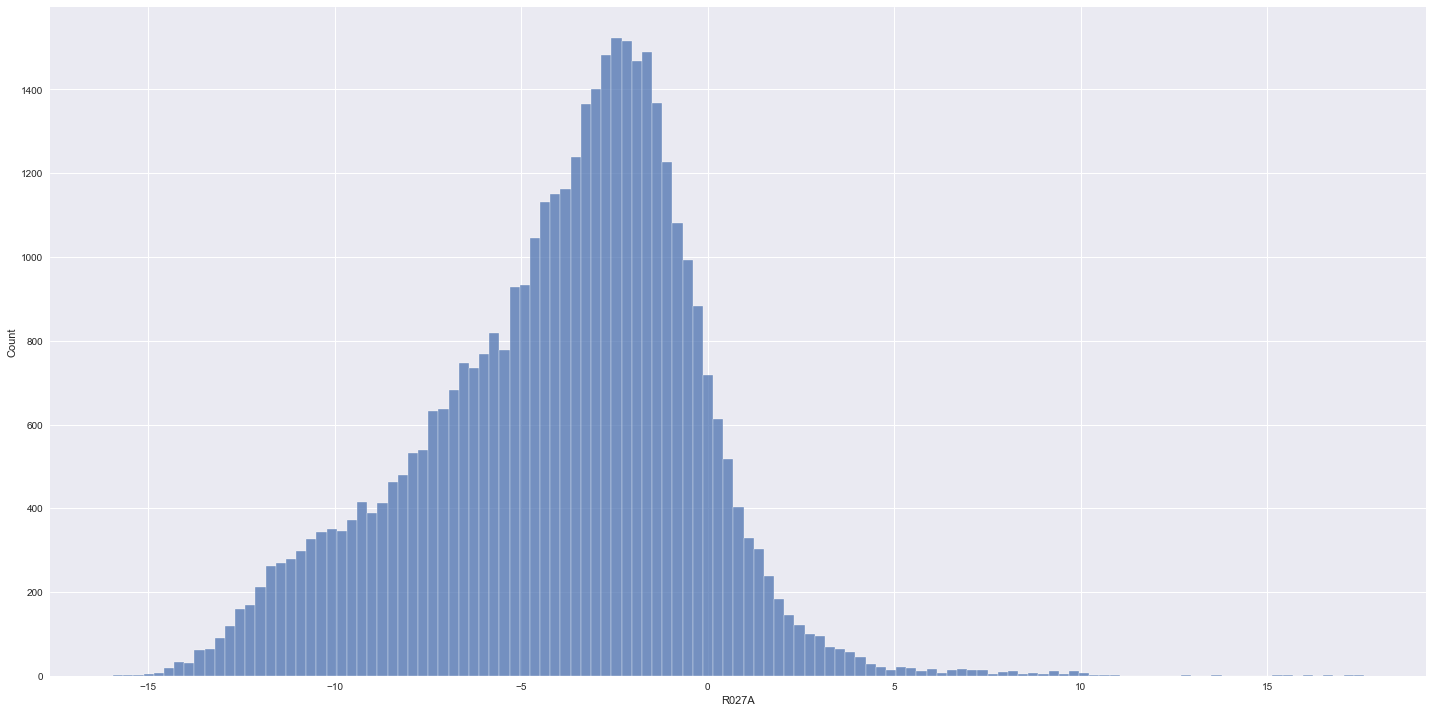

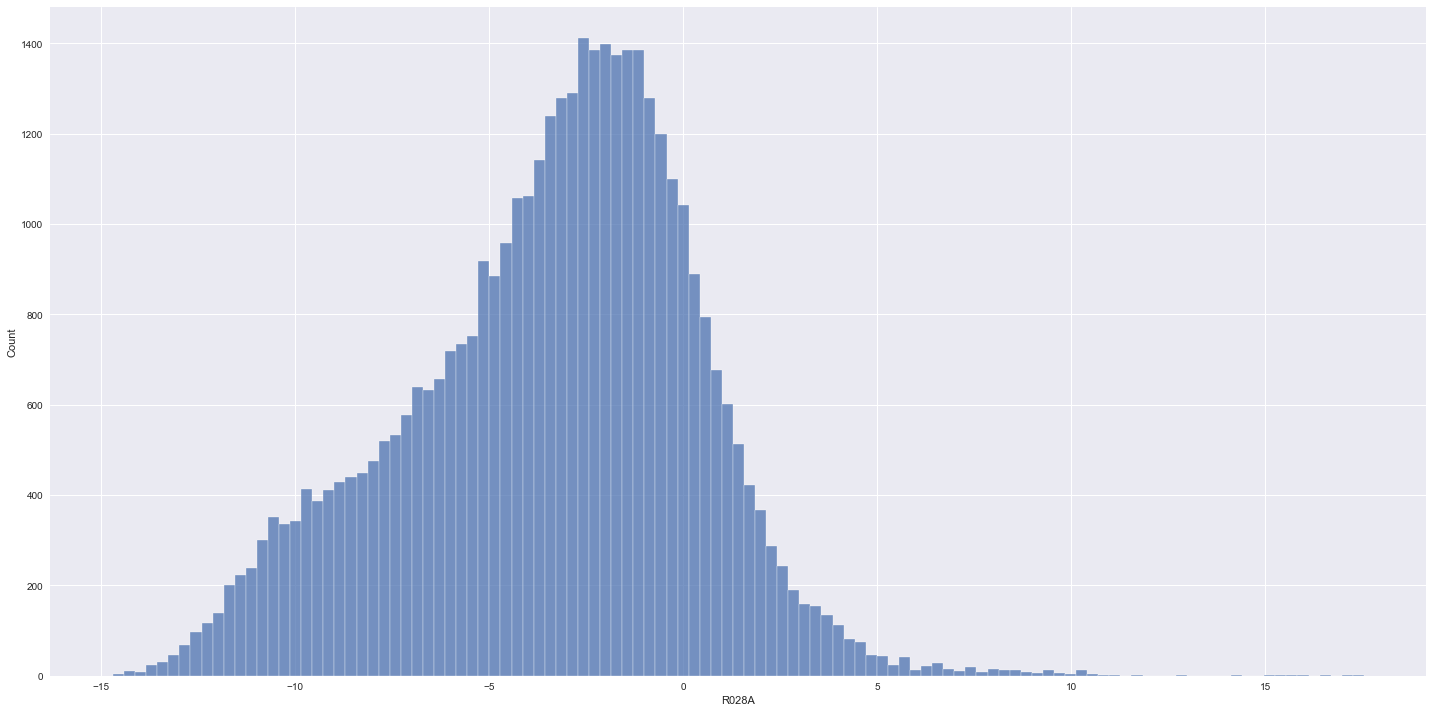

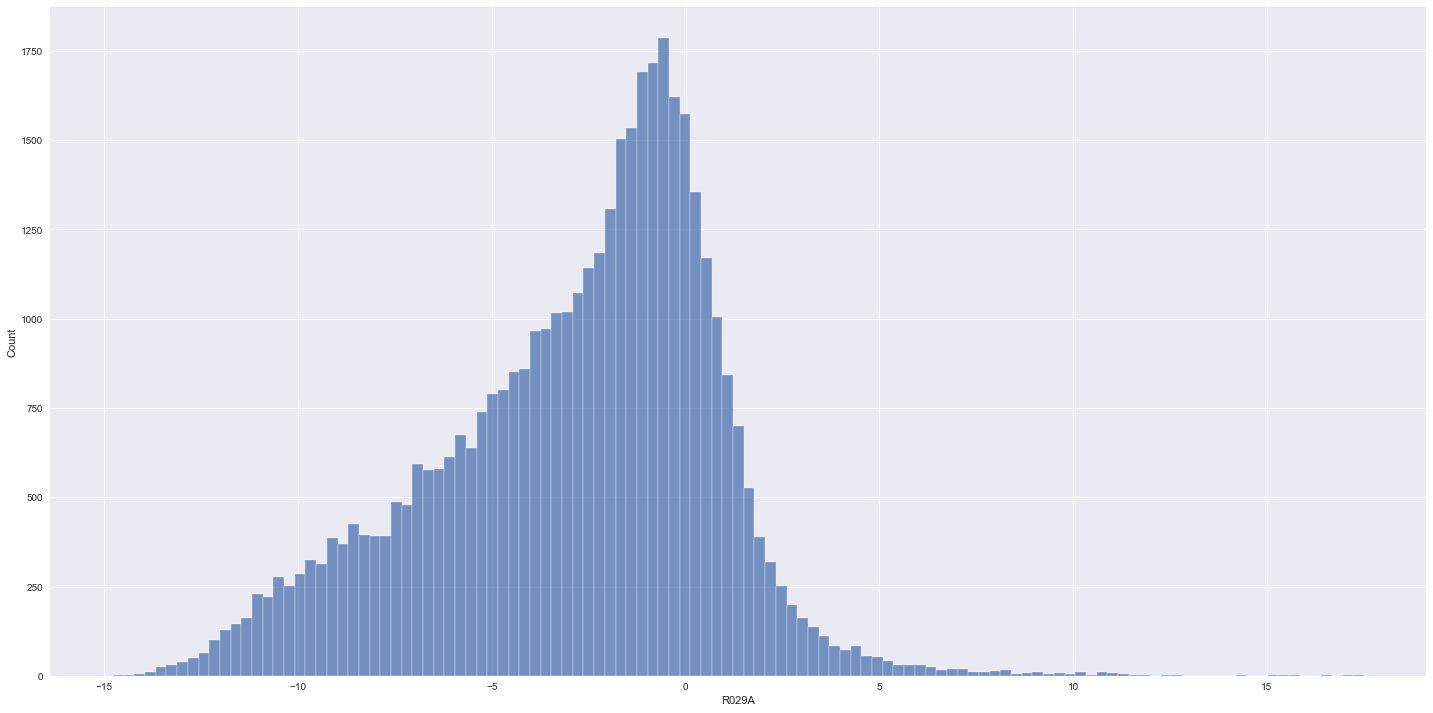

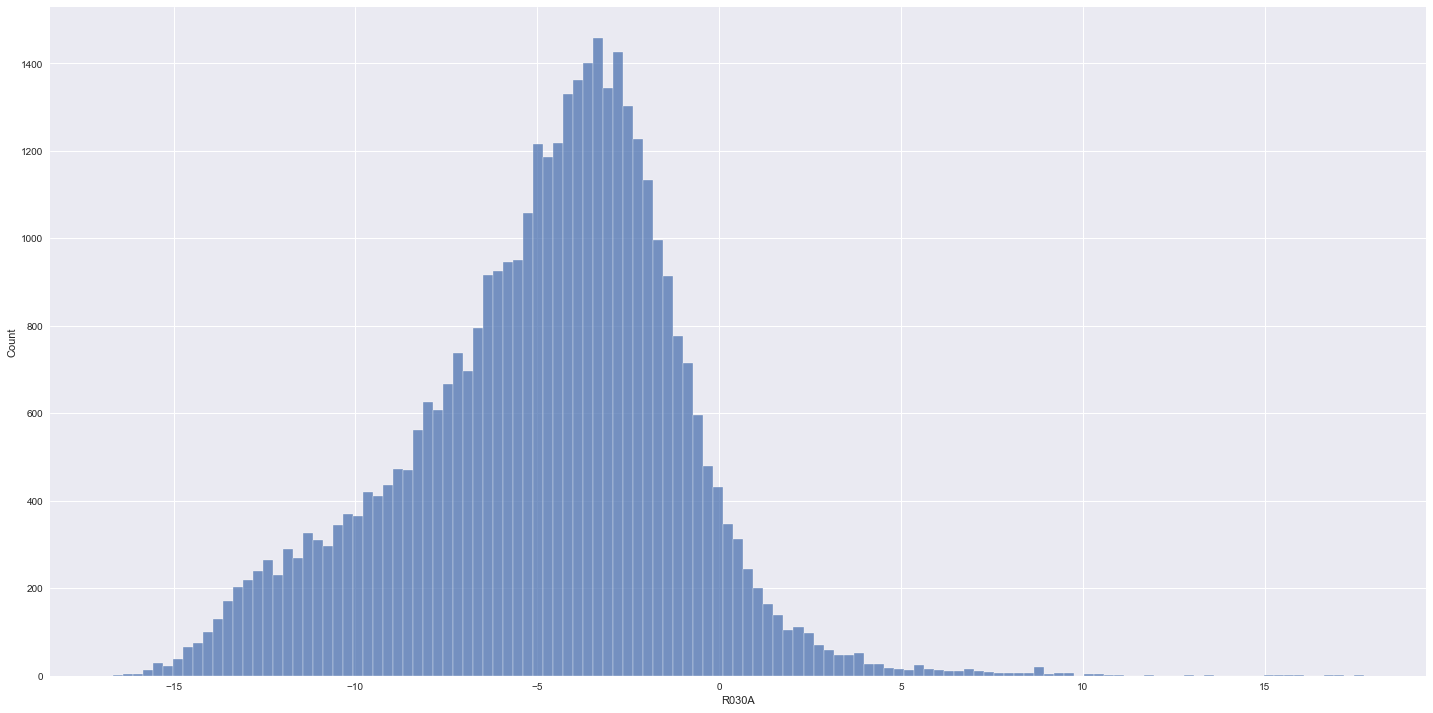

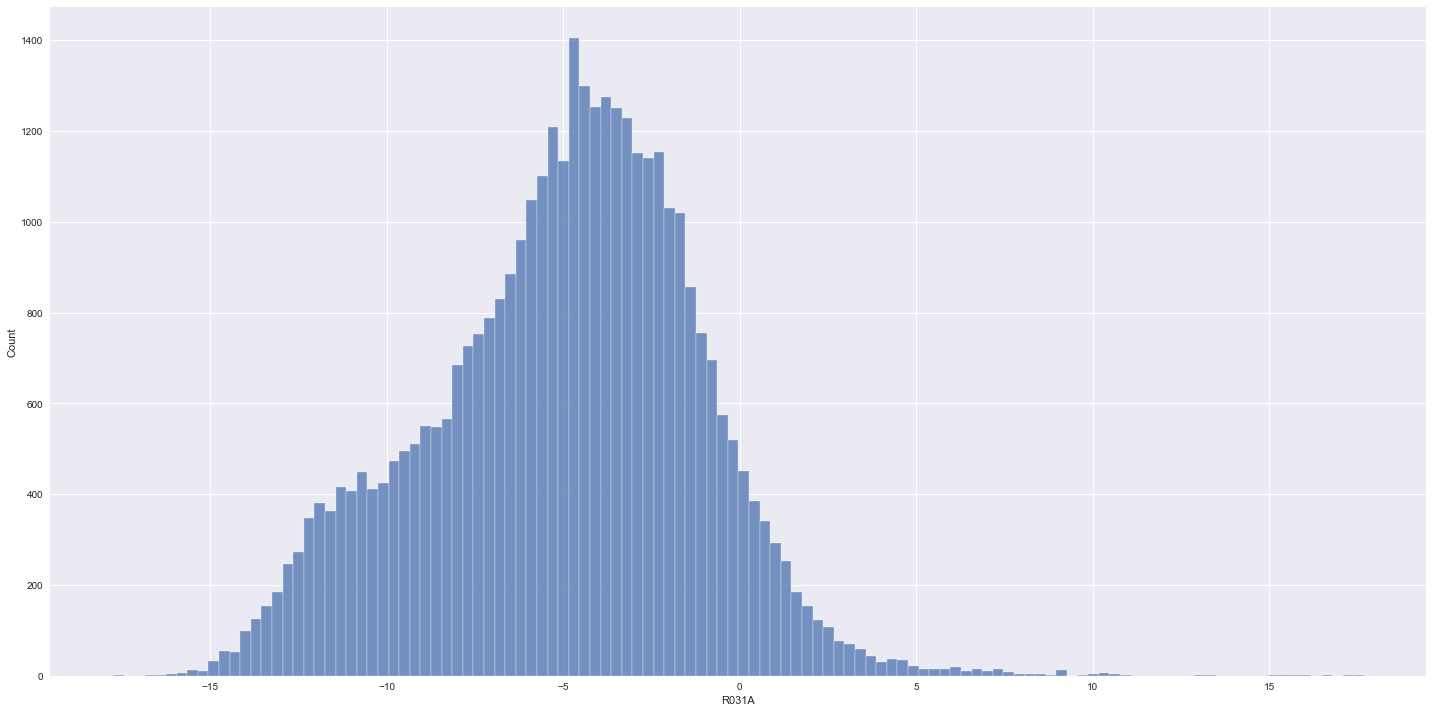

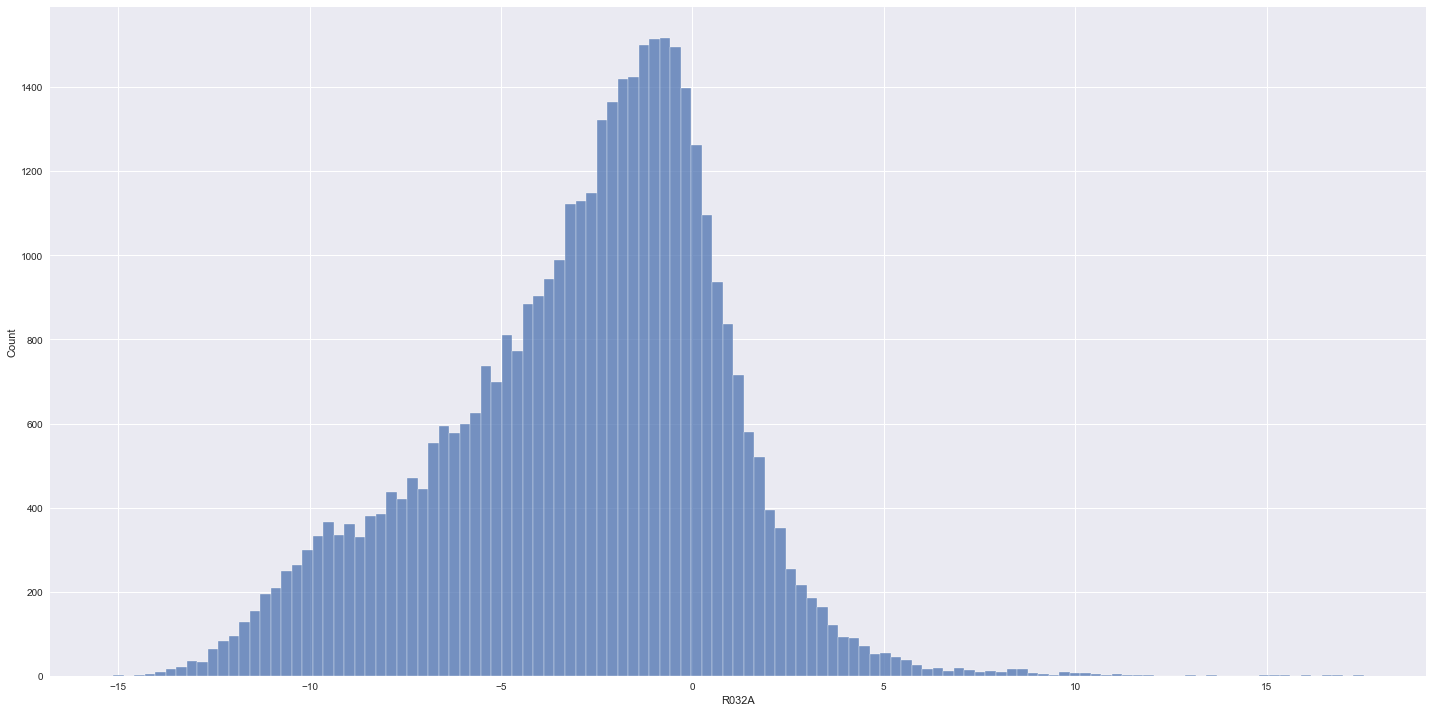

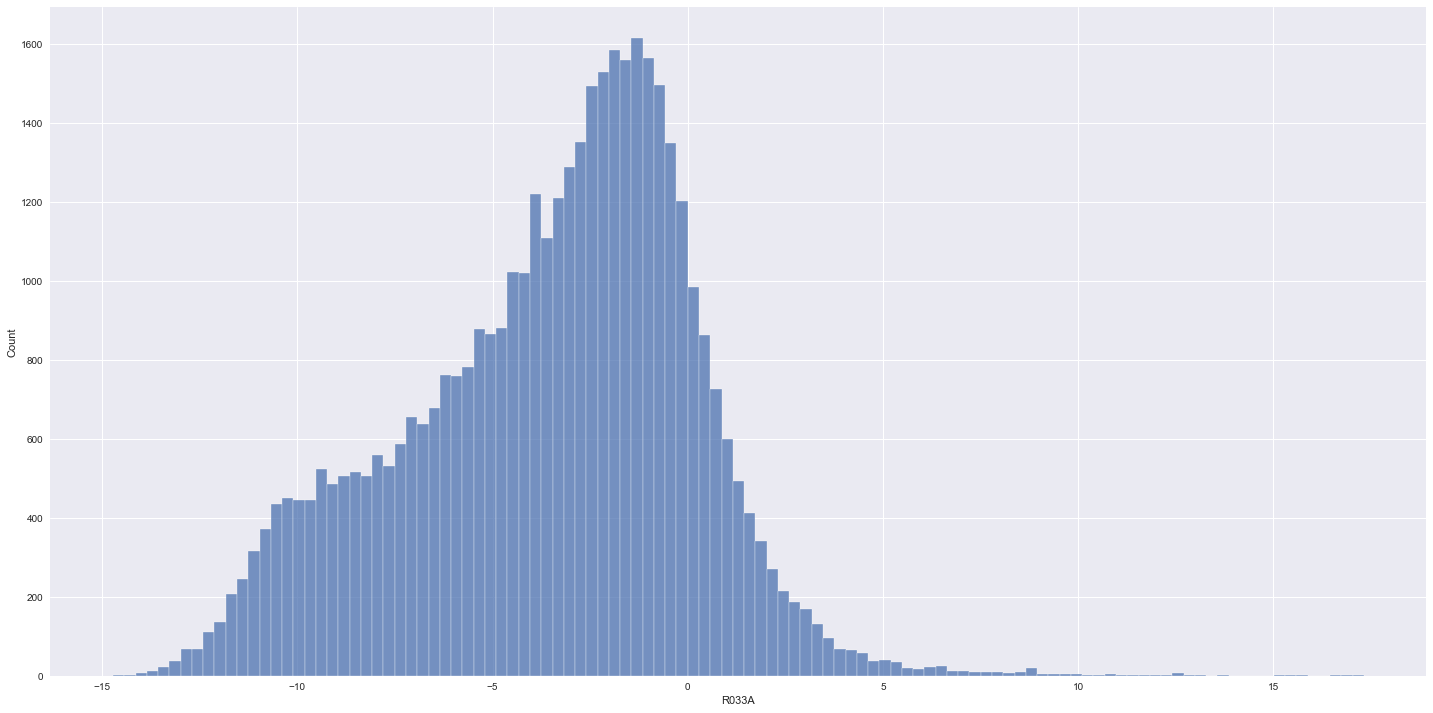

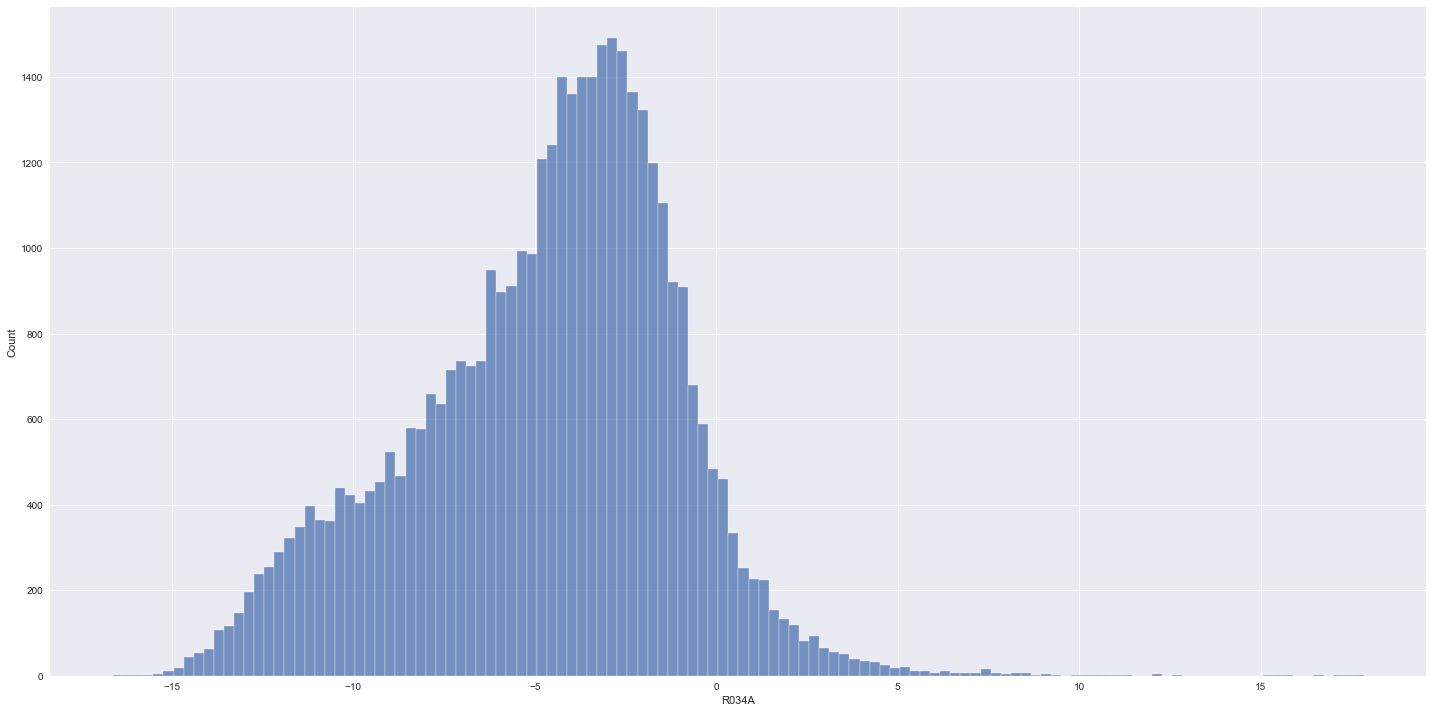

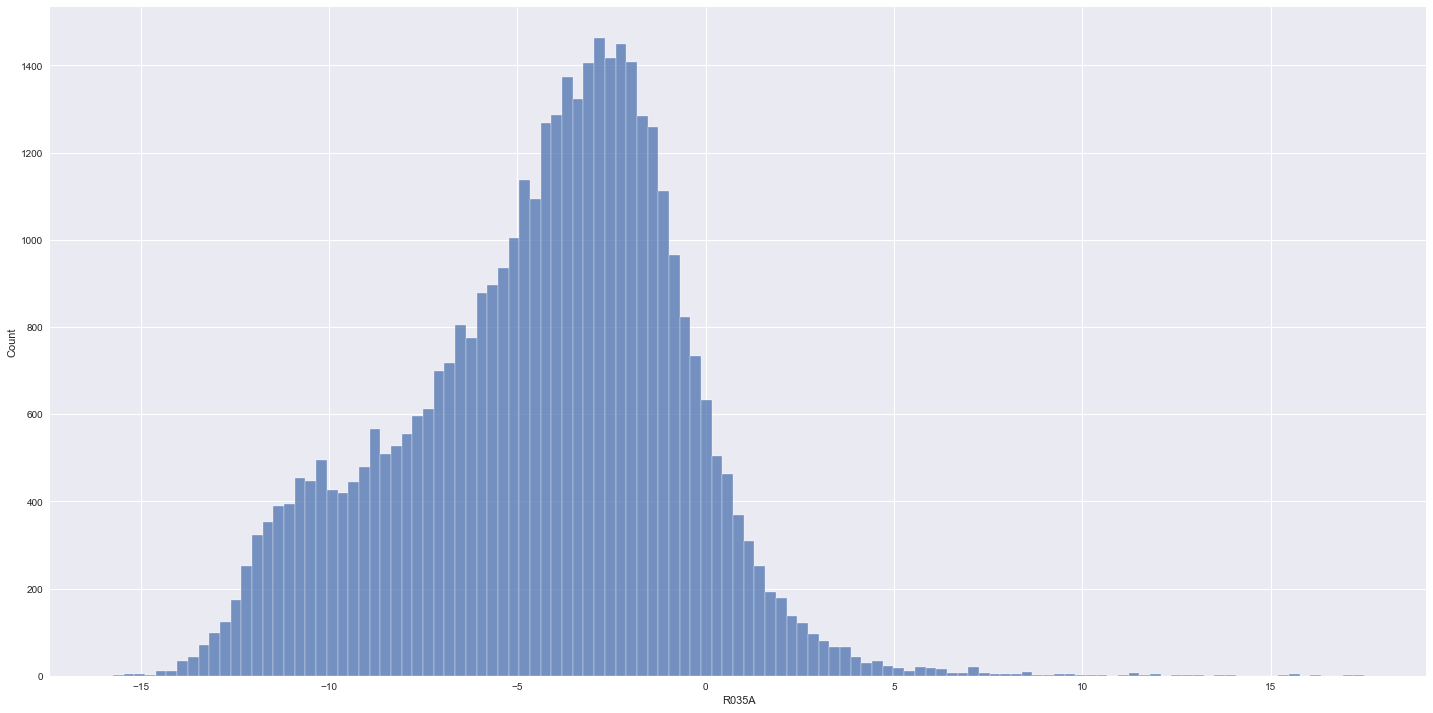

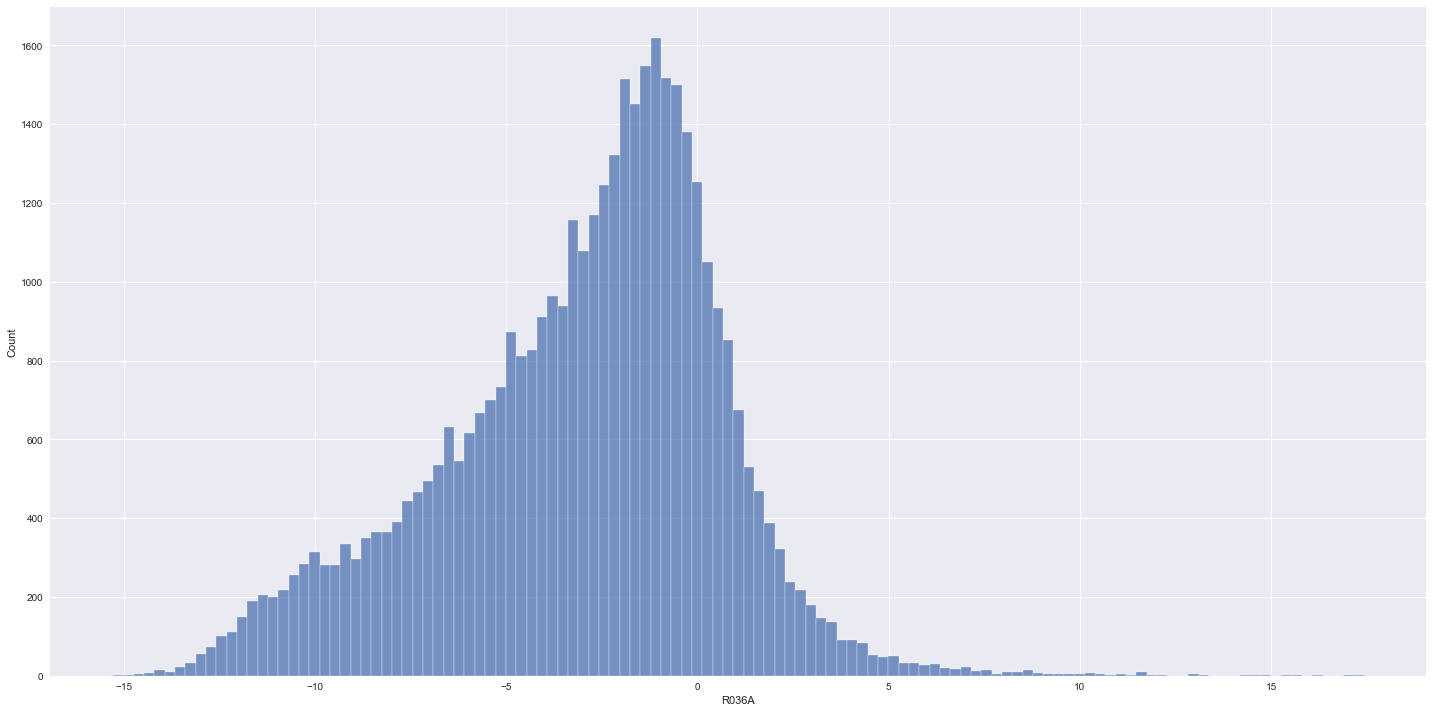

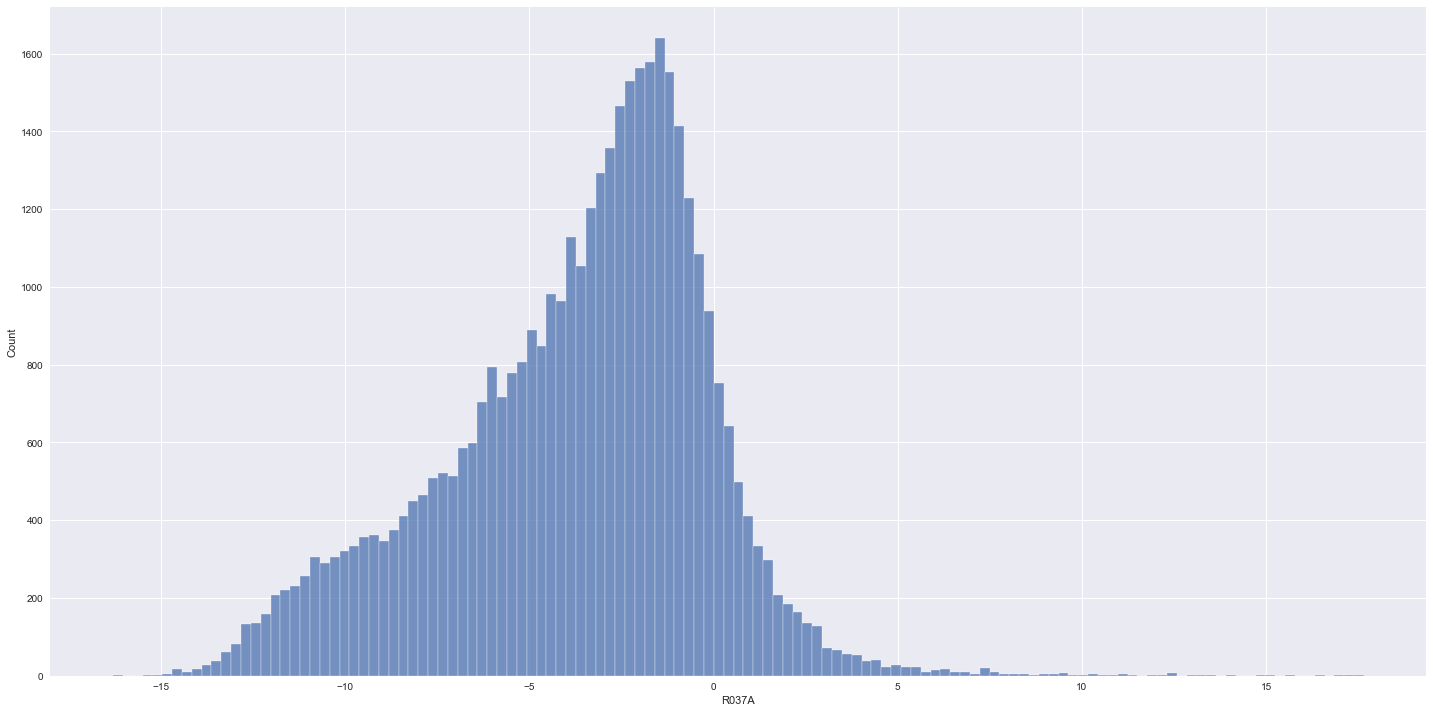

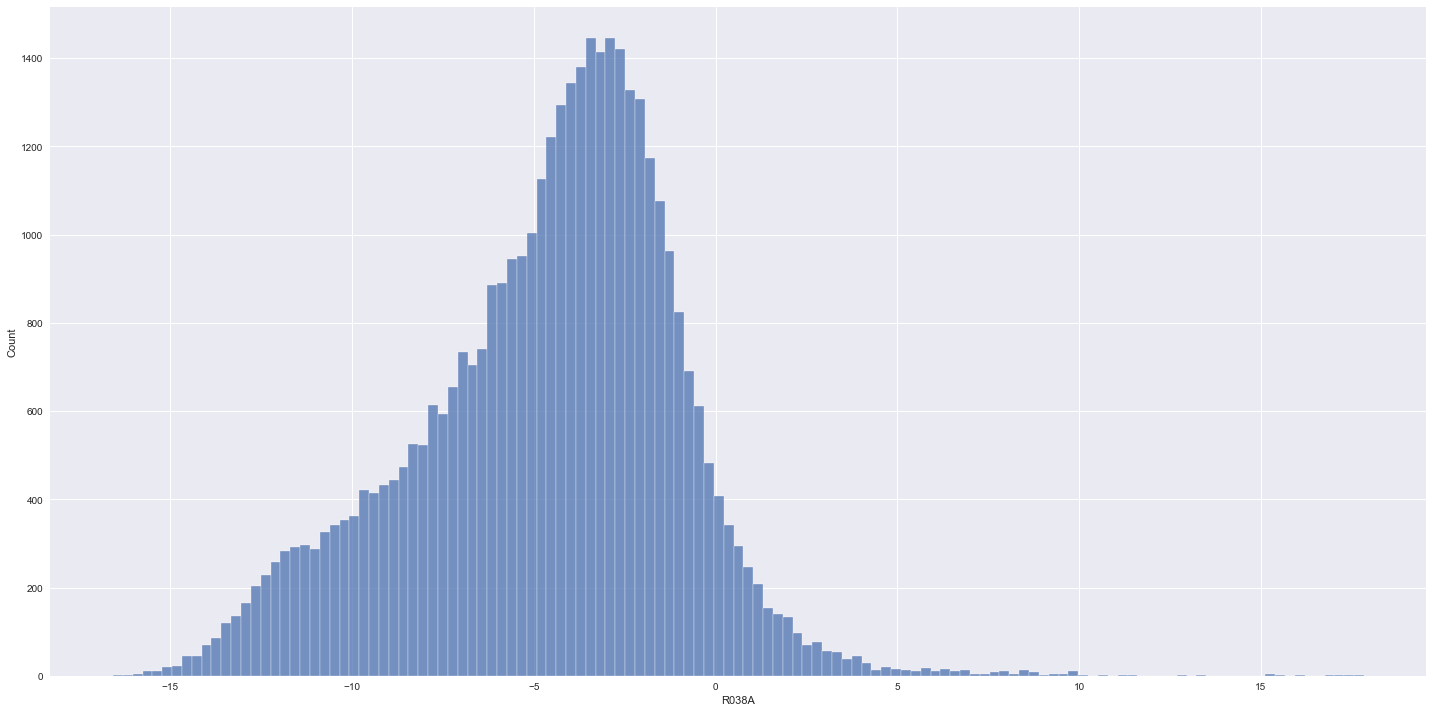

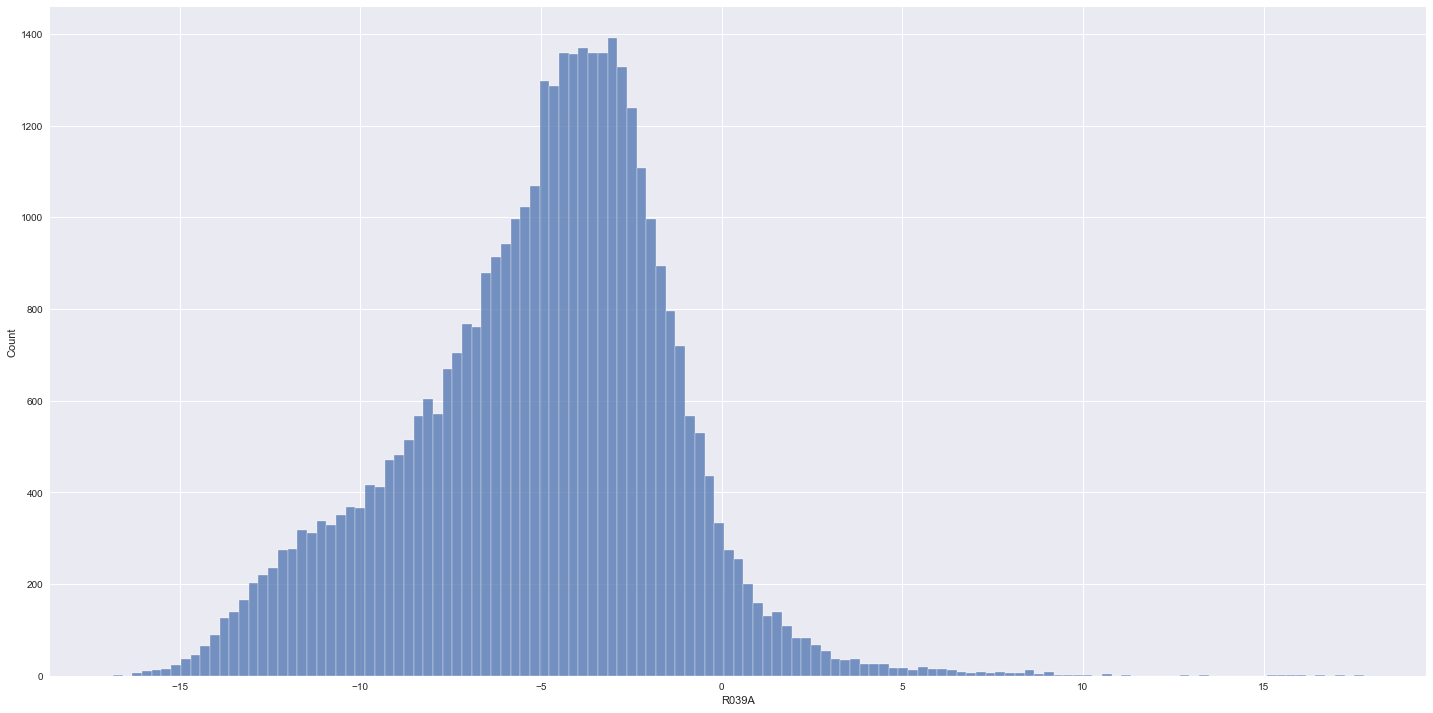

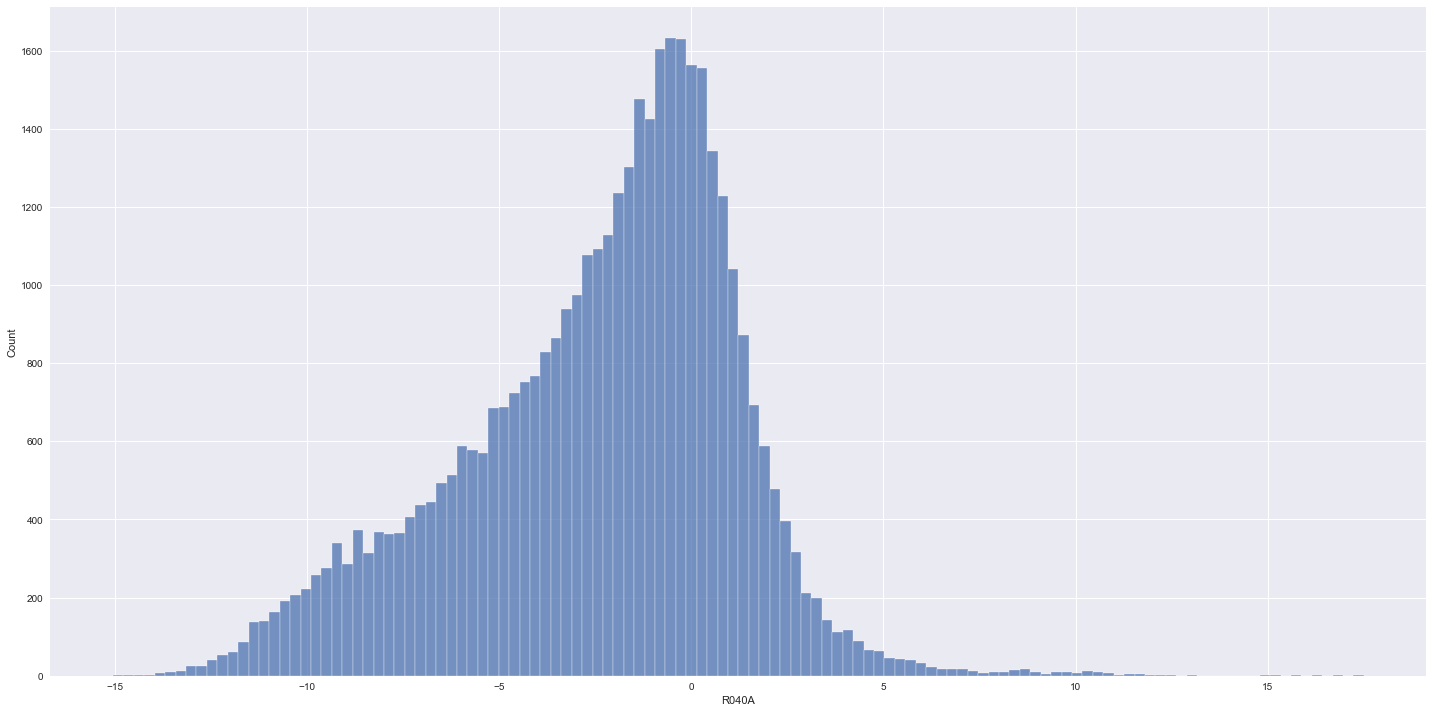

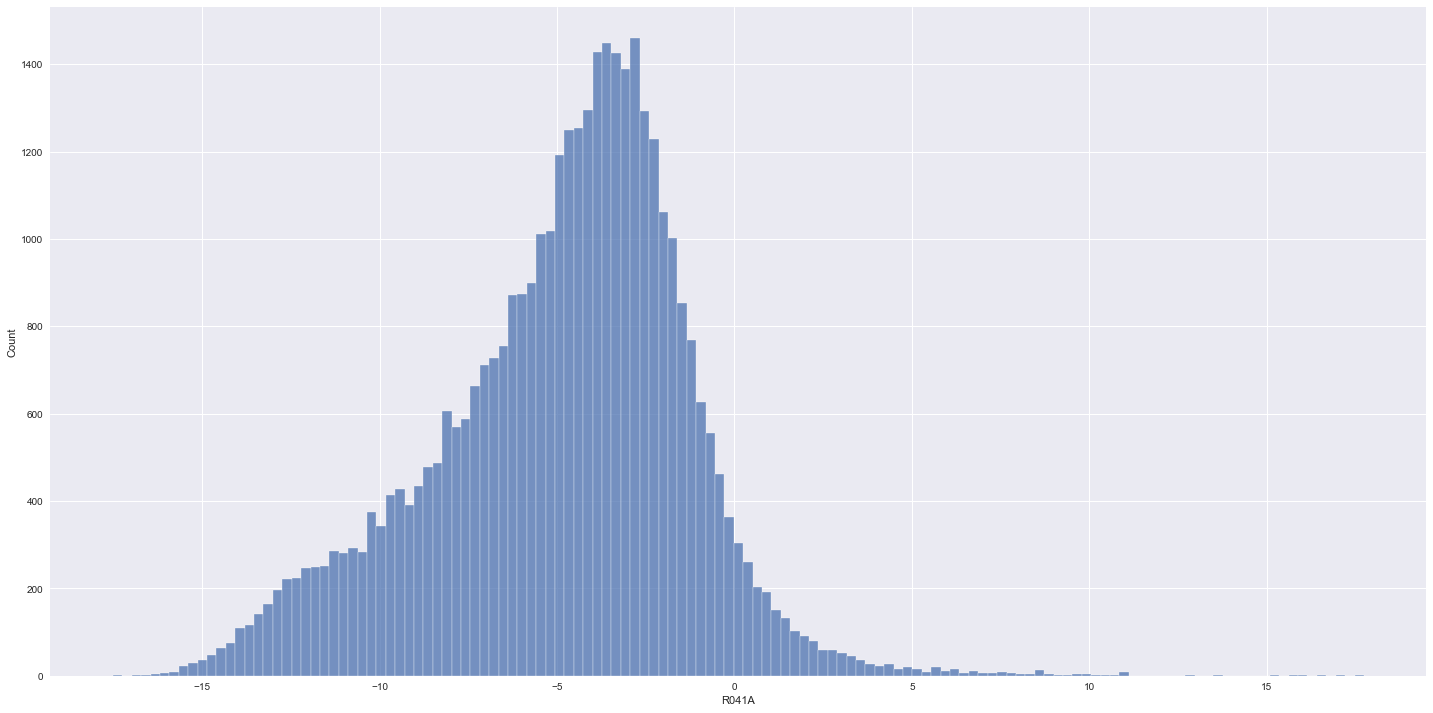

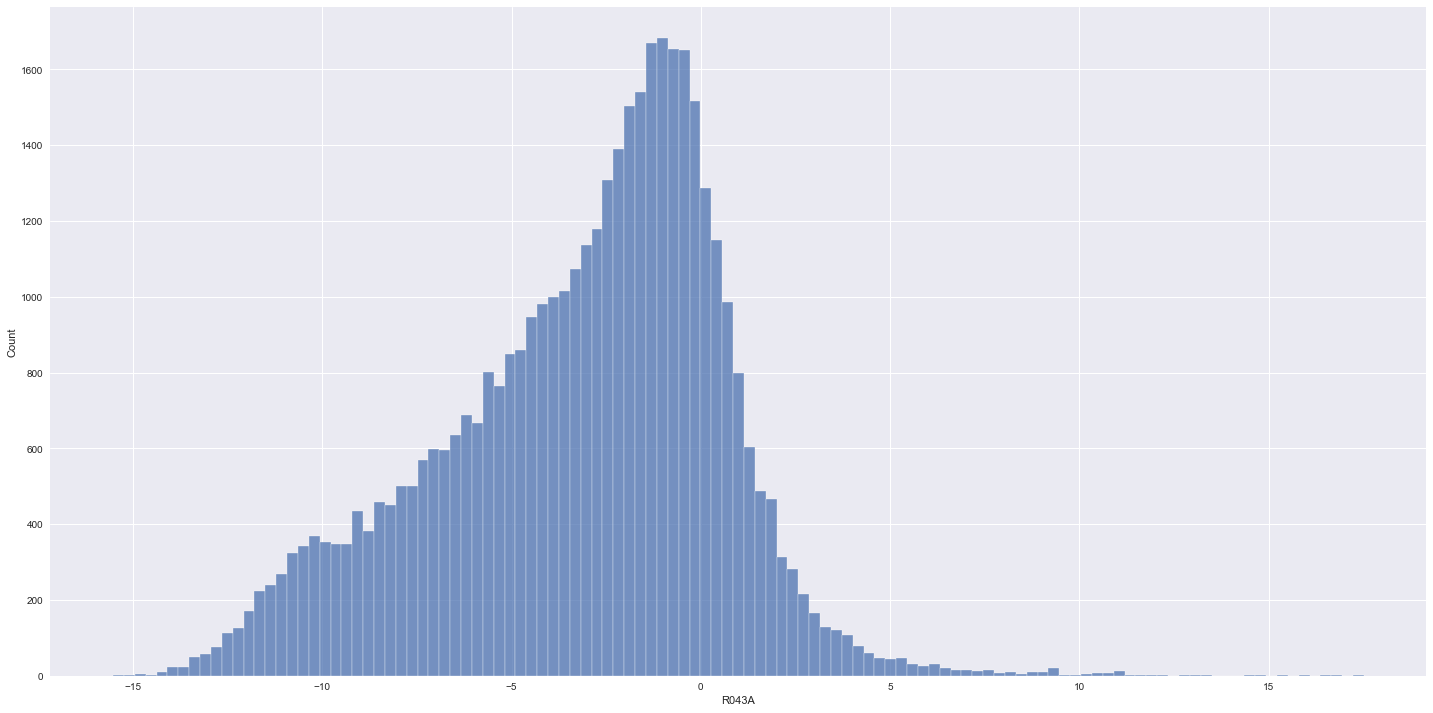

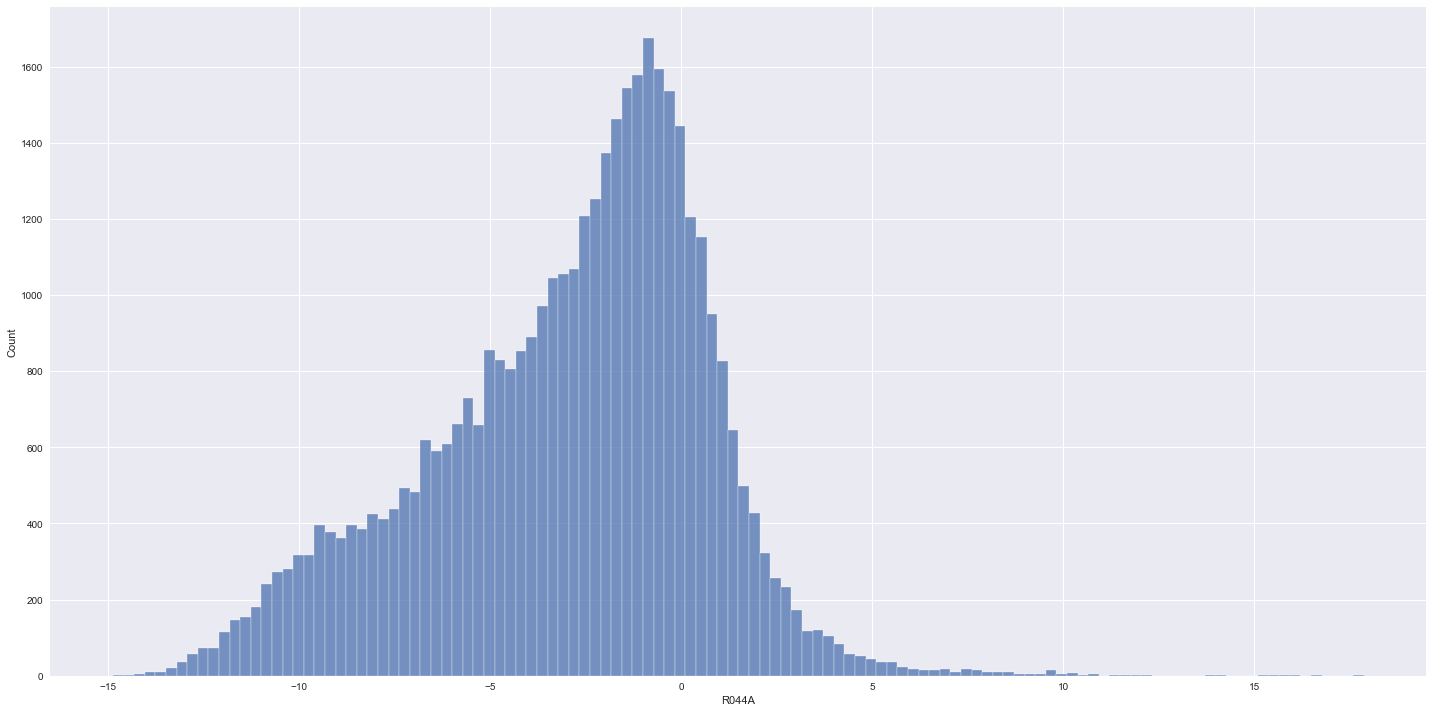

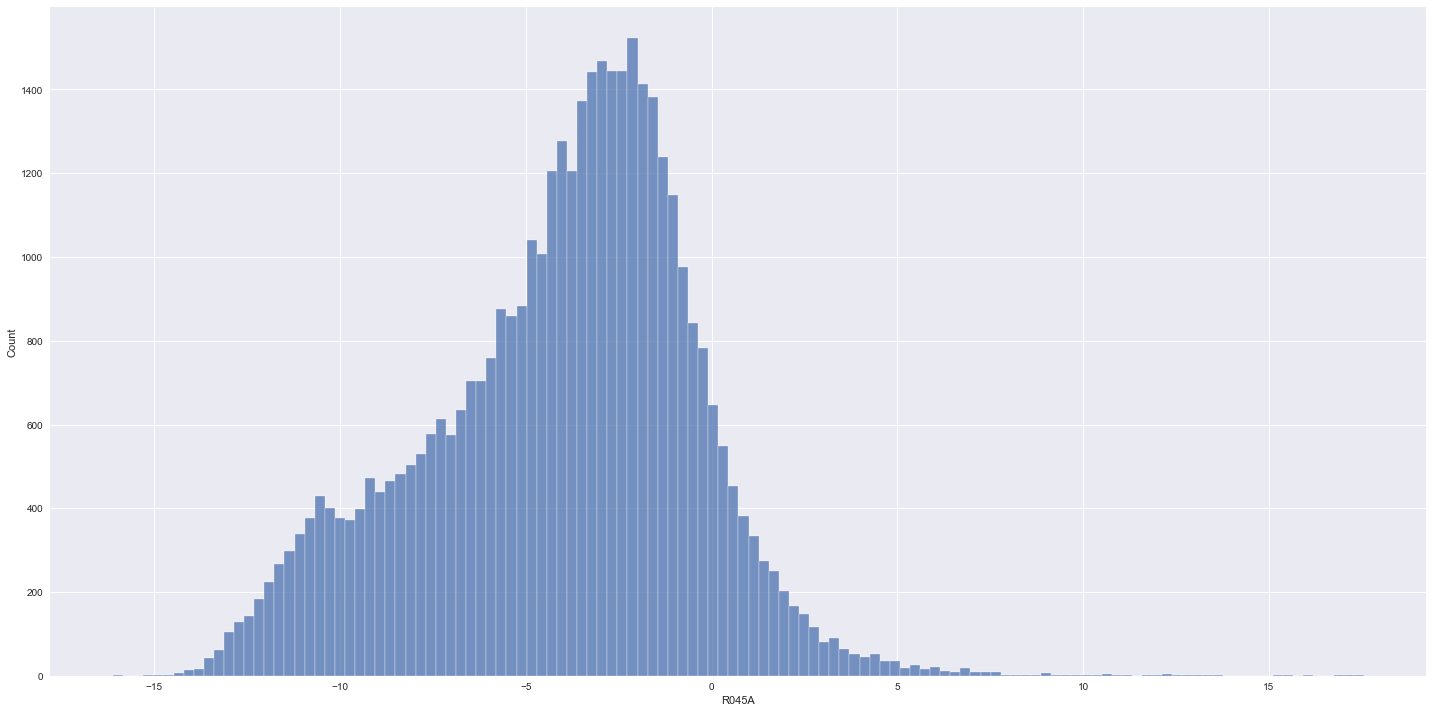

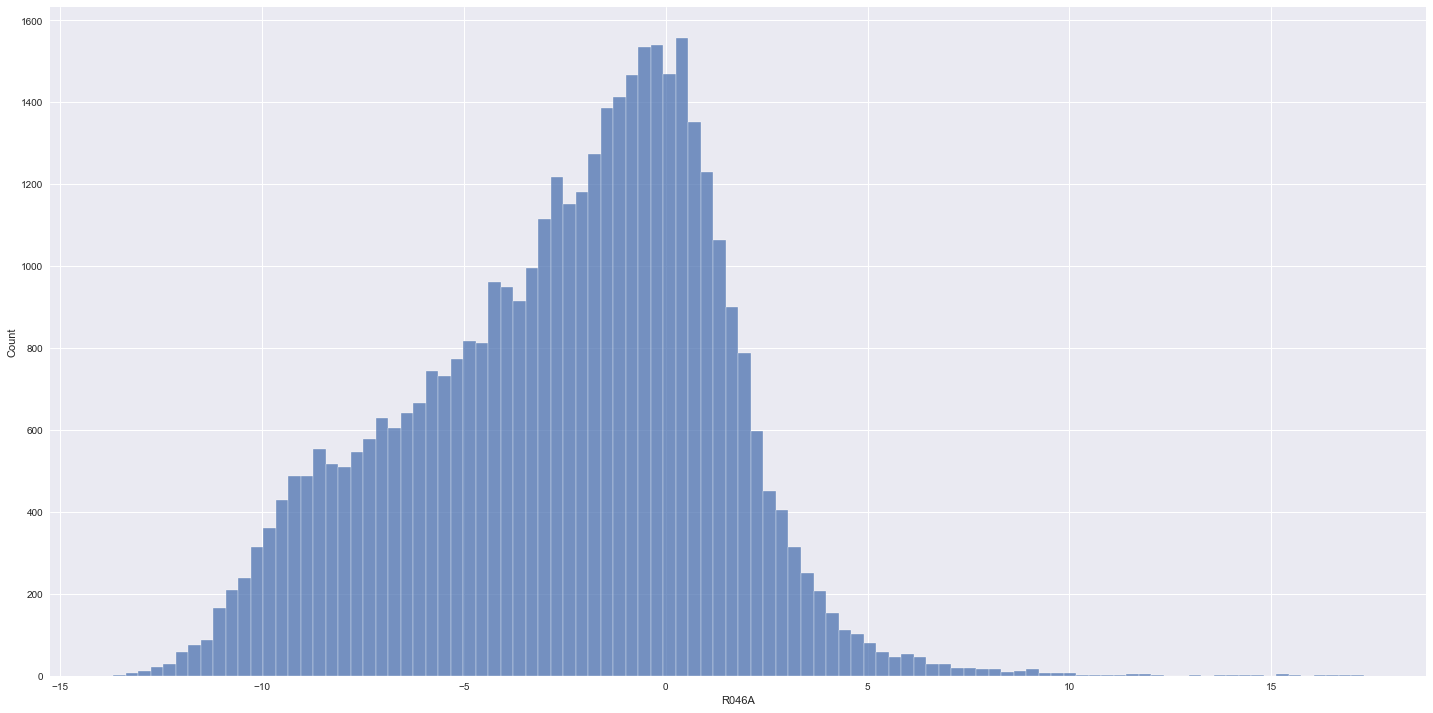

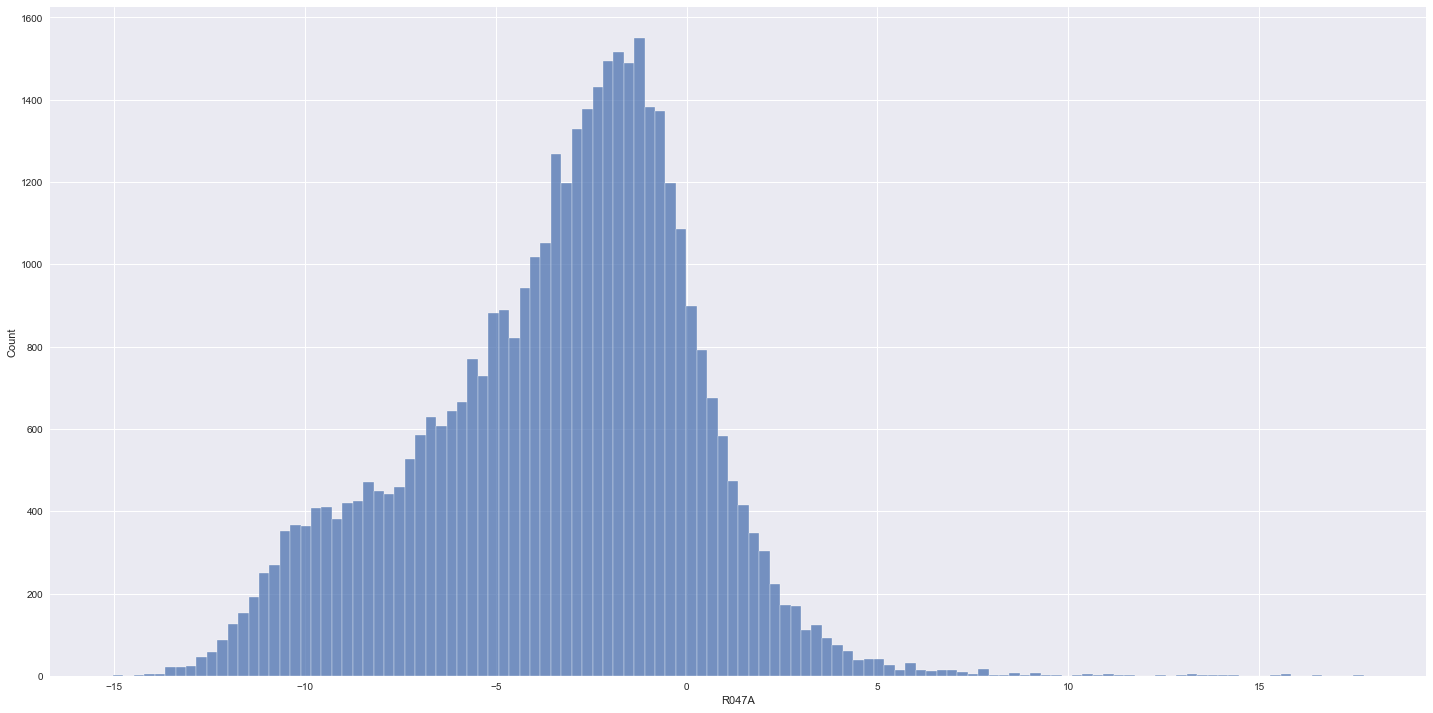

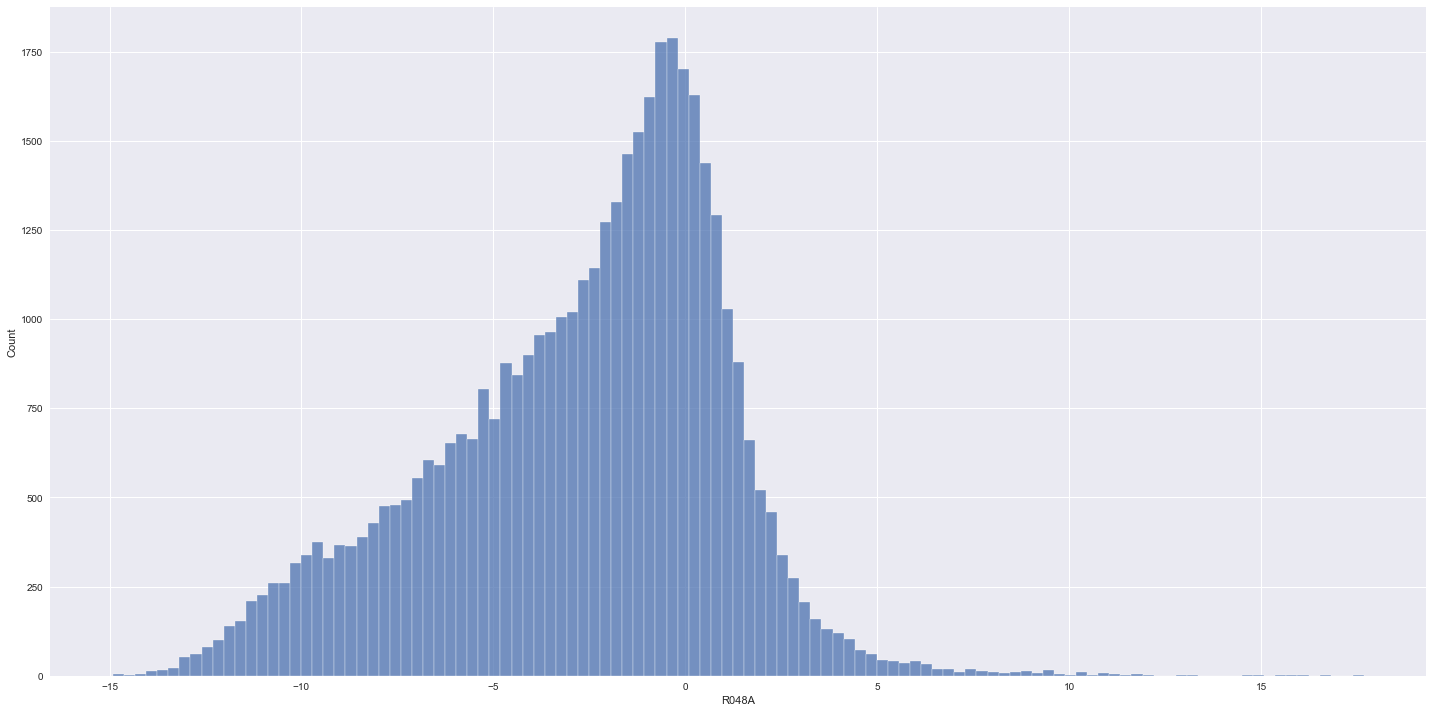

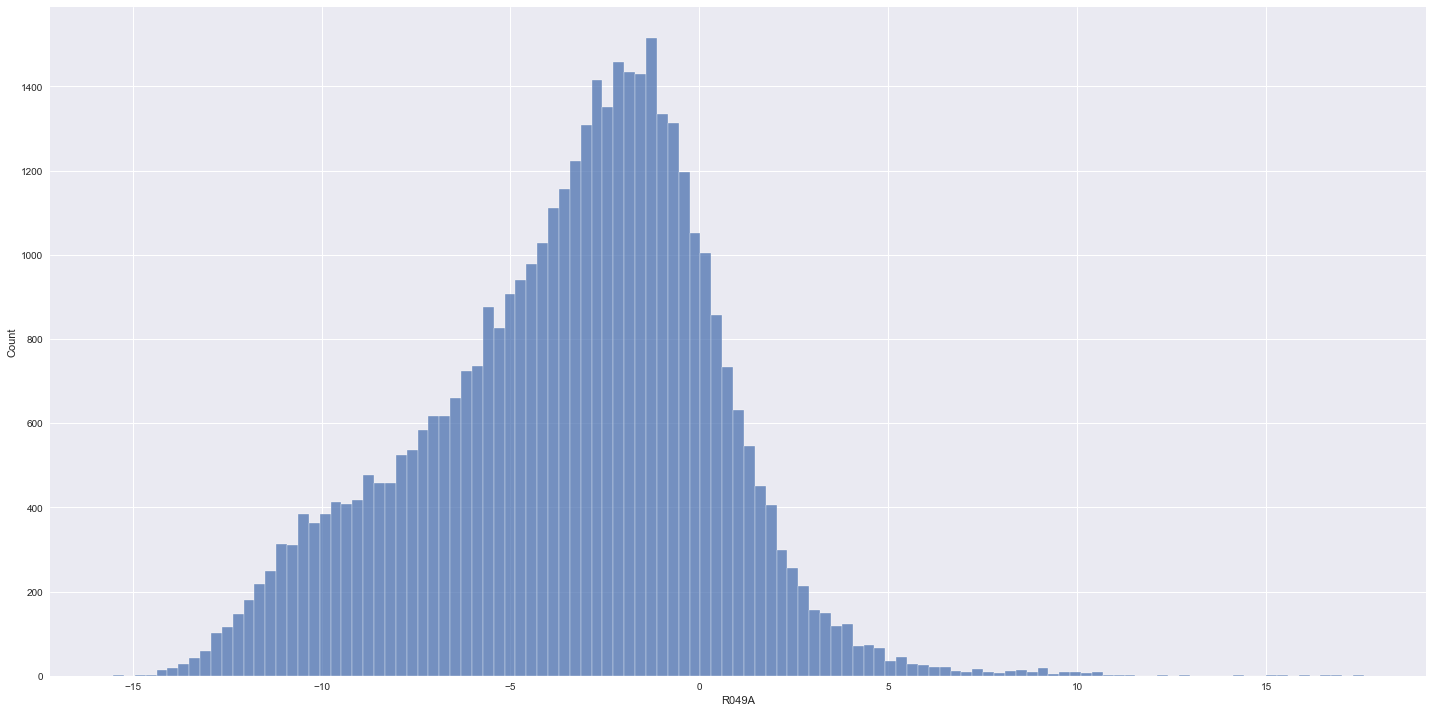

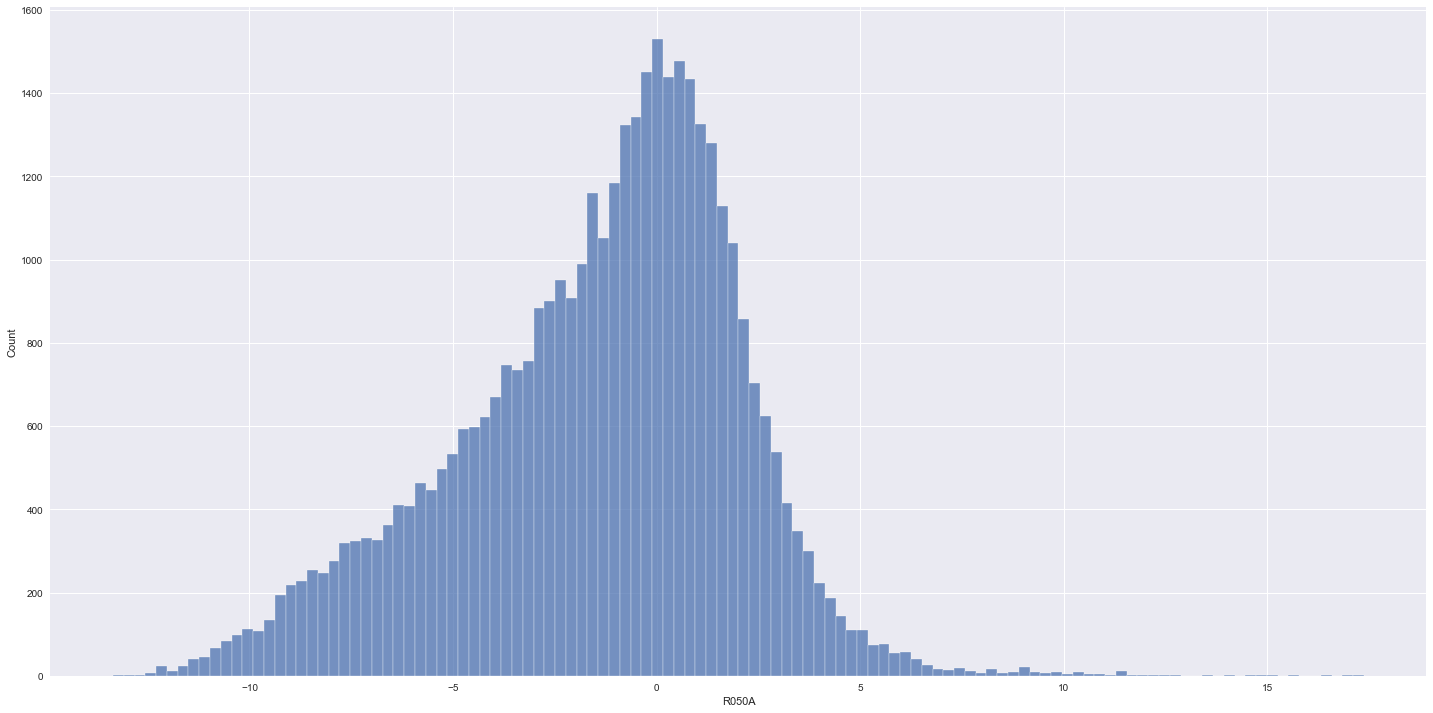

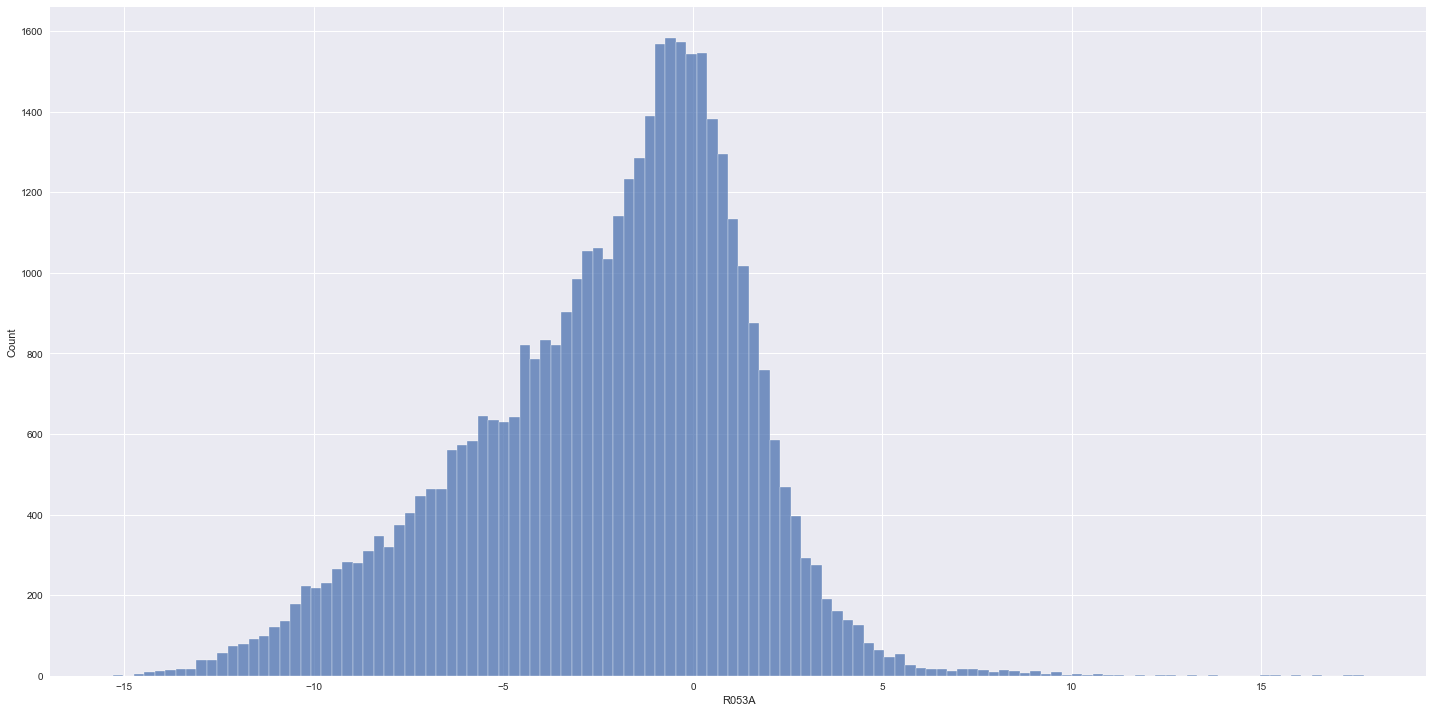

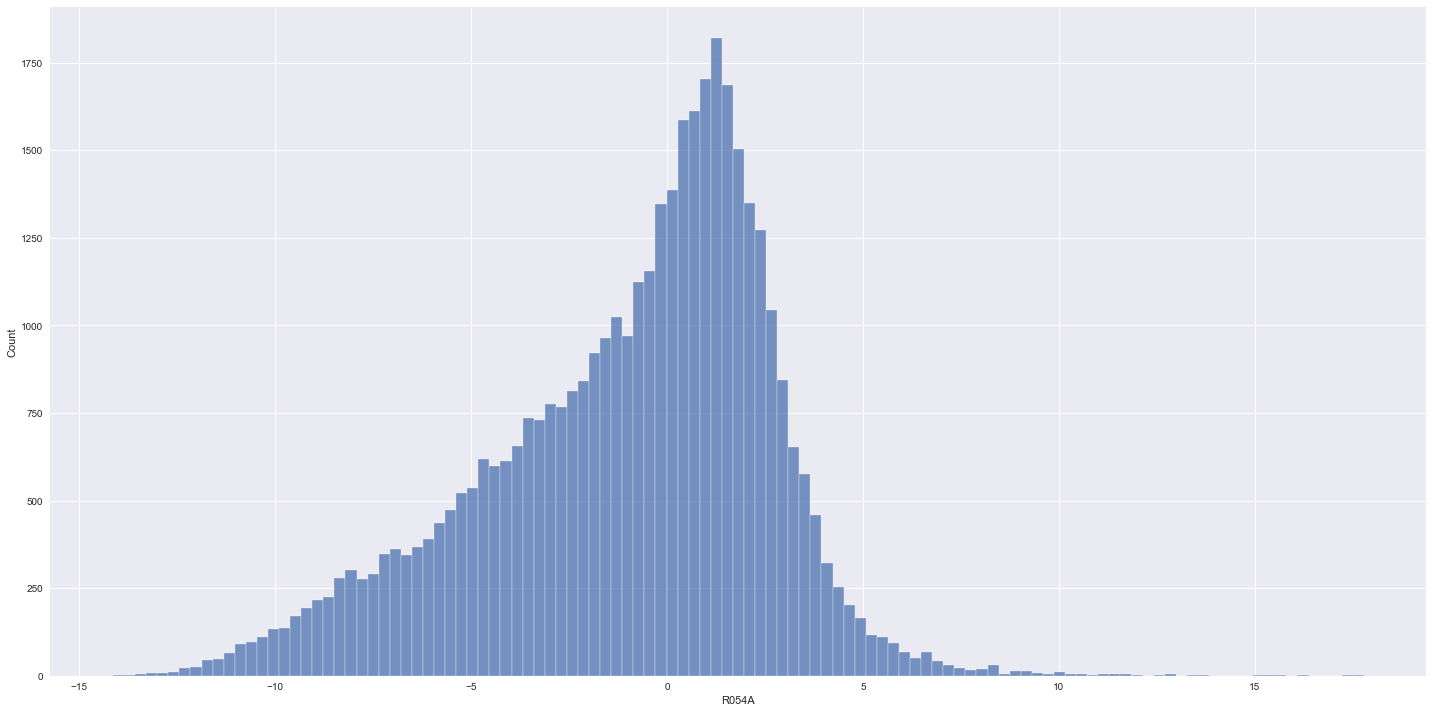

In [39]:
for c in df.columns:
    sns.displot(np.log2(df[df!=0]), x=c, height=10, aspect=2)
    plt.savefig(f"../results/EDA/dist/{c}.png")